# –ü—Ä–æ–µ–∫—Ç: –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif

## –ß–∞—Å—Ç—å 1. –ó–Ω–∞–∫–æ–º—Å—Ç–≤–æ —Å –¥–∞–Ω–Ω—ã–º–∏, –æ–±—Ä–∞–±–æ—Ç–∫–∞ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –∏ –≤—ã–±—Ä–æ—Å–æ–≤

### –ó–∞–¥–∞–Ω–∏–µ 1

In [3]:
df = pd.read_csv('data/bank_fin.csv', sep = ';')
df.head()

age         job  marital  education default       balance housing loan  \
0   59      admin.  married  secondary      no   2 343,00 $      yes   no   
1   56      admin.  married  secondary      no      45,00 $       no   no   
2   41  technician  married  secondary      no   1 270,00 $      yes   no   
3   55    services  married  secondary      no   2 476,00 $      yes   no   
4   54      admin.  married   tertiary      no     184,00 $       no   no   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  
0  unknown    5   may      1042         1     -1         0  unknown     yes  
1  unknown    5   may      1467         1     -1         0  unknown     yes  
2  unknown    5   may      1389         1     -1         0  unknown     yes  
3  unknown    5   may       579         1     -1         0  unknown     yes  
4  unknown    5   may       673         2     -1         0  unknown     yes

In [4]:
# –∏—Å—Å–ª–µ–¥—É–π—Ç–µ –¥–∞–Ω–Ω—ã–µ –Ω–∞ –ø—Ä–µ–¥–º–µ—Ç –ø—Ä–æ–ø—É—Å–∫–æ–≤. –ì–¥–µ –µ—Å—Ç—å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è? –°–∫–æ–ª—å–∫–æ –∏—Ö?
# –≤–∞—à –∫–æ–¥

# –û–±—â–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ DataFrame
print("–û–±—â–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –¥–∞–Ω–Ω—ã—Ö:")
print(f"–†–∞–∑–º–µ—Ä DataFrame: {df.shape}")
print(f"–°—Ç–æ–ª–±—Ü—ã: {list(df.columns)}")
print()

# –ü—Ä–æ–≤–µ—Ä–∫–∞ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –ø–æ —Å—Ç–æ–ª–±—Ü–∞–º
print("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –ø–æ —Å—Ç–æ–ª–±—Ü–∞–º:")
missing_values = df.isnull().sum()
print(missing_values)
print()

# –ü—Ä–æ—Ü–µ–Ω—Ç –ø—Ä–æ–ø—É—Å–∫–æ–≤ –ø–æ —Å—Ç–æ–ª–±—Ü–∞–º
print("–ü—Ä–æ—Ü–µ–Ω—Ç –ø—Ä–æ–ø—É—Å–∫–æ–≤ –ø–æ —Å—Ç–æ–ª–±—Ü–∞–º:")
missing_percent = (df.isnull().sum() / len(df)) * 100
for col, percent in missing_percent.items():
    if percent > 0:
        print(f"{col}: {percent:.2f}%")
print()

# –û–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤
total_missing = df.isnull().sum().sum()
print(f"–û–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤: {total_missing}")

# –°—Ç–æ–ª–±—Ü—ã —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏
columns_with_missing = df.columns[df.isnull().any()].tolist()
print(f"–°—Ç–æ–ª–±—Ü—ã —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏: {columns_with_missing}")

–û–±—â–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –¥–∞–Ω–Ω—ã—Ö:
–†–∞–∑–º–µ—Ä DataFrame: (11162, 17)
–°—Ç–æ–ª–±—Ü—ã: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit']

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –ø–æ —Å—Ç–æ–ª–±—Ü–∞–º:
age           0
job           0
marital       0
education     0
default       0
balance      25
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

–ü—Ä–æ—Ü–µ–Ω—Ç –ø—Ä–æ–ø—É—Å–∫–æ–≤ –ø–æ —Å—Ç–æ–ª–±—Ü–∞–º:
balance: 0.22%

–û–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤: 25
–°—Ç–æ–ª–±—Ü—ã —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏: ['balance']


### –ó–∞–¥–∞–Ω–∏–µ 2

In [5]:
# –µ—Å—Ç—å –ª–∏ –≤ –ø—Ä–∏–∑–Ω–∞–∫–µ job –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è? –í–æ–∑–º–æ–∂–Ω–æ, –æ–Ω–∏ –æ–±–æ–∑–Ω–∞—á–µ–Ω—ã –∫–∞–∫–∏–º-—Ç–æ —Å–ø–µ—Ü–∏–∞–ª—å–Ω—ã–º —Å–ª–æ–≤–æ–º?
# –≤–∞—à –∫–æ–¥

# –ü—Ä–æ–≤–µ—Ä—è–µ–º —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–µ –ø—Ä–æ–ø—É—Å–∫–∏ –≤ —Å—Ç–æ–ª–±—Ü–µ job
print("–°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–µ –ø—Ä–æ–ø—É—Å–∫–∏ (NaN) –≤ —Å—Ç–æ–ª–±—Ü–µ 'job':")
print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ NaN: {df['job'].isnull().sum()}")
print()

# –°–º–æ—Ç—Ä–∏–º –Ω–∞ —É–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–µ job
print("–£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–µ 'job':")
unique_values = df['job'].unique()
print(f"–í—Å–µ–≥–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π: {len(unique_values)}")
print("–°–ø–∏—Å–æ–∫ –∑–Ω–∞—á–µ–Ω–∏–π:")
for value in sorted(unique_values):
    print(f"  '{value}'")
print()

# –ü–æ–¥—Å—á–∏—Ç—ã–≤–∞–µ–º —á–∞—Å—Ç–æ—Ç—É –∫–∞–∂–¥–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è
print("–ß–∞—Å—Ç–æ—Ç–∞ –∑–Ω–∞—á–µ–Ω–∏–π –≤ —Å—Ç–æ–ª–±—Ü–µ 'job':")
value_counts = df['job'].value_counts()
print(value_counts)
print()

# –ò—â–µ–º –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω—ã–µ —Å–∫—Ä—ã—Ç—ã–µ –ø—Ä–æ–ø—É—Å–∫–∏
potential_missing = ['unknown', 'missing', 'na', 'n/a', 'none', 'null', '', ' ', 'undefined', 'other']
print("–ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω—ã–µ —Å–∫—Ä—ã—Ç—ã–µ –ø—Ä–æ–ø—É—Å–∫–∏:")
for missing_val in potential_missing:
    count = (df['job'] == missing_val).sum()
    if count > 0:
        print(f"  '{missing_val}': {count} –∑–∞–ø–∏—Å–µ–π")

# –ü—Ä–æ–≤–µ—Ä—è–µ–º –Ω–∞ –ø—É—Å—Ç—ã–µ —Å—Ç—Ä–æ–∫–∏ –∏–ª–∏ —Å—Ç—Ä–æ–∫–∏ –∏–∑ –ø—Ä–æ–±–µ–ª–æ–≤
empty_strings = (df['job'] == '').sum()
whitespace_strings = (df['job'].str.strip() == '').sum()
print(f"\n–ü—É—Å—Ç—ã–µ —Å—Ç—Ä–æ–∫–∏: {empty_strings}")
print(f"–°—Ç—Ä–æ–∫–∏ –∏–∑ –ø—Ä–æ–±–µ–ª–æ–≤: {whitespace_strings}")

–°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–µ –ø—Ä–æ–ø—É—Å–∫–∏ (NaN) –≤ —Å—Ç–æ–ª–±—Ü–µ 'job':
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ NaN: 0

–£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–µ 'job':
–í—Å–µ–≥–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π: 12
–°–ø–∏—Å–æ–∫ –∑–Ω–∞—á–µ–Ω–∏–π:
  'admin.'
  'blue-collar'
  'entrepreneur'
  'housemaid'
  'management'
  'retired'
  'self-employed'
  'services'
  'student'
  'technician'
  'unemployed'
  'unknown'

–ß–∞—Å—Ç–æ—Ç–∞ –∑–Ω–∞—á–µ–Ω–∏–π –≤ —Å—Ç–æ–ª–±—Ü–µ 'job':
job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

–ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω—ã–µ —Å–∫—Ä—ã—Ç—ã–µ –ø—Ä–æ–ø—É—Å–∫–∏:
  'unknown': 70 –∑–∞–ø–∏—Å–µ–π

–ü—É—Å—Ç—ã–µ —Å—Ç—Ä–æ–∫–∏: 0
–°—Ç—Ä–æ–∫–∏ –∏–∑ –ø—Ä–æ–±–µ–ª–æ–≤: 0


### –ó–∞–¥–∞–Ω–∏–µ 3

In [6]:
# –ø—Ä–µ–æ–±—Ä–∞–∑—É–π—Ç–µ –ø—Ä–∏–∑–Ω–∞–∫ balance —Ç–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, —á—Ç–æ–±—ã –æ–Ω –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ —Å—á–∏—Ç—ã–≤–∞–ª—Å—è, –∫–∞–∫ –≤–µ—â–µ—Å—Ç–≤–µ–Ω–Ω–æ–µ —á–∏—Å–ª–æ (float)

import re

# –°–æ–∑–¥–∞–µ–º –∫–æ–ø–∏—é –¥–ª—è –æ–±—Ä–∞–±–æ—Ç–∫–∏
df['balance_clean'] = df['balance'].astype(str)

# –ü—Ä–∏–º–µ–Ω—è–µ–º —Ä–µ–≥—É–ª—è—Ä–Ω—ã–µ –≤—ã—Ä–∞–∂–µ–Ω–∏—è –¥–ª—è –æ—á–∏—Å—Ç–∫–∏ –¥–∞–Ω–Ω—ã—Ö
# 1. –£–¥–∞–ª—è–µ–º –ª–∏—à–Ω–∏–µ –ø—Ä–æ–±–µ–ª—ã –≤ –Ω–∞—á–∞–ª–µ –∏ –∫–æ–Ω—Ü–µ
df['balance_clean'] = df['balance_clean'].str.strip()

# 2. –ó–∞–º–µ–Ω—è–µ–º –∑–∞–ø—è—Ç—ã–µ –Ω–∞ —Ç–æ—á–∫–∏ (–¥–ª—è –µ–≤—Ä–æ–ø–µ–π—Å–∫–æ–≥–æ —Ñ–æ—Ä–º–∞—Ç–∞ —á–∏—Å–µ–ª)
df['balance_clean'] = df['balance_clean'].str.replace(',', '.', regex=False)

# 3. –£–¥–∞–ª—è–µ–º –≤—Å–µ —Å–∏–º–≤–æ–ª—ã –∫—Ä–æ–º–µ —Ü–∏—Ñ—Ä, —Ç–æ—á–µ–∫
df['balance_clean'] = df['balance_clean'].apply(lambda x: re.sub(r'[^\d.-]', '', str(x)))

# 4. –ò—Å–ø—Ä–∞–≤–ª—è–µ–º —Å–ª—É—á–∞–∏ —Å –Ω–µ—Å–∫–æ–ª—å–∫–∏–º–∏ —Ç–æ—á–∫–∞–º–∏ - –æ—Å—Ç–∞–≤–ª—è–µ–º —Ç–æ–ª—å–∫–æ –ø–µ—Ä–≤—É—é
df['balance_clean'] = df['balance_clean'].apply(lambda x: re.sub(r'\.(?=.*\.)', '', str(x)))

# 5. –£–±–∏—Ä–∞–µ–º –∑–Ω–∞–∫–∏ –º–∏–Ω—É—Å –Ω–µ –≤ –Ω–∞—á–∞–ª–µ —á–∏—Å–ª–∞
df['balance_clean'] = df['balance_clean'].apply(lambda x: re.sub(r'(?<!^)-', '', str(x)))

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤ —á–∏—Å–ª–æ–≤–æ–π —Ñ–æ—Ä–º–∞—Ç
df['balance'] = pd.to_numeric(df['balance_clean'], errors='coerce')

# –£–¥–∞–ª—è–µ–º –≤—Ä–µ–º–µ–Ω–Ω—ã–π —Å—Ç–æ–ª–±–µ—Ü
df.drop('balance_clean', axis=1, inplace=True)

# –ü—Ä–æ–≤–µ—Ä—è–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç
df['balance'].describe()

count    11137.000000
mean      1529.129029
std       3228.114892
min      -6847.000000
25%        123.000000
50%        550.000000
75%       1708.000000
max      81204.000000
Name: balance, dtype: float64

### –ó–∞–¥–∞–Ω–∏–µ 4

In [7]:
# –æ–±—Ä–∞–±–æ—Ç–∞–π—Ç–µ –ø—Ä–æ–ø—É—Å–∫–∏ –≤ –ø—Ä–∏–∑–Ω–∞–∫–∏ balance , –∑–∞–º–µ–Ω–∏–≤ –∏—Ö –Ω–∞ –º–µ–¥–∏–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ –¥–∞–Ω–Ω–æ–º—É –ø—Ä–∏–∑–Ω–∞–∫—É
# –≤–∞—à –∫–æ–¥

# –ü—Ä–æ–≤–µ—Ä–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –¥–æ –æ–±—Ä–∞–±–æ—Ç–∫–∏
print("–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –ø—Ä–æ–ø—É—Å–∫–∞—Ö –≤ —Å—Ç–æ–ª–±—Ü–µ 'balance' –¥–æ –æ–±—Ä–∞–±–æ—Ç–∫–∏:")
print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤: {df['balance'].isnull().sum()}")
print()

# –í—ã—á–∏—Å–ª–∏–º –º–µ–¥–∏–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ (—Ç–æ–ª—å–∫–æ –¥–ª—è –Ω–µ–ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π)
median_balance = df['balance'].median()
print(f"–ú–µ–¥–∏–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —Å—Ç–æ–ª–±—Ü–∞ 'balance': {median_balance}")
print()

# –ó–∞–º–µ–Ω—è–µ–º –ø—Ä–æ–ø—É—Å–∫–∏ –Ω–∞ –º–µ–¥–∏–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ
df['balance'].fillna(median_balance, inplace=True)

# –ü—Ä–æ–≤–µ—Ä–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç –ø–æ—Å–ª–µ –æ–±—Ä–∞–±–æ—Ç–∫–∏
print("–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –ø–æ—Å–ª–µ –æ–±—Ä–∞–±–æ—Ç–∫–∏ –ø—Ä–æ–ø—É—Å–∫–æ–≤:")
print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤: {df['balance'].isnull().sum()}")
print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤–∞–ª–∏–¥–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π: {df['balance'].notnull().sum()}")
print()

# –ü–æ–∫–∞–∂–µ–º –æ–ø–∏—Å–∞—Ç–µ–ª—å–Ω—É—é —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É –ø–æ—Å–ª–µ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è
print("–û–ø–∏—Å–∞—Ç–µ–ª—å–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ—Å–ª–µ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è –ø—Ä–æ–ø—É—Å–∫–æ–≤:")
print(df['balance'].describe())

–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –ø—Ä–æ–ø—É—Å–∫–∞—Ö –≤ —Å—Ç–æ–ª–±—Ü–µ 'balance' –¥–æ –æ–±—Ä–∞–±–æ—Ç–∫–∏:
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤: 25

–ú–µ–¥–∏–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —Å—Ç–æ–ª–±—Ü–∞ 'balance': 550.0

–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –ø–æ—Å–ª–µ –æ–±—Ä–∞–±–æ—Ç–∫–∏ –ø—Ä–æ–ø—É—Å–∫–æ–≤:
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤: 0
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤–∞–ª–∏–¥–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π: 11162

–û–ø–∏—Å–∞—Ç–µ–ª—å–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ—Å–ª–µ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è –ø—Ä–æ–ø—É—Å–∫–æ–≤:
count    11162.000000
mean      1526.936033
std       3224.829691
min      -6847.000000
25%        123.000000
50%        550.000000
75%       1699.000000
max      81204.000000
Name: balance, dtype: float64


### –ó–∞–¥–∞–Ω–∏–µ 5

In [8]:
# –æ–±—Ä–∞–±–æ—Ç–∞–π—Ç–µ –ø—Ä–æ–ø—É—Å–∫–∏ –≤ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö: job –∏ education, –∑–∞–º–µ–Ω–∏–≤ –∏—Ö –Ω–∞ –º–æ–¥–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
# –≤–∞—à –∫–æ–¥

# —Å–∫—Ä—ã—Ç—ã–µ –ø—Ä–æ–ø—É—Å–∫–∏ –≤ –≤–∏–¥–µ 'unknown', –∑–∞–º–µ–Ω–∏–º –∏—Ö –Ω–∞ NaN
# –°–Ω–∞—á–∞–ª–∞ –¥–ª—è —Å—Ç–æ–ª–±—Ü–∞ 'job'
if 'unknown' in df['job'].values:
    df['job'] = df['job'].replace('unknown', np.nan)
    print(f"–ü—Ä–æ–ø—É—Å–∫–∏ –≤ 'job' –ø–æ—Å–ª–µ –∑–∞–º–µ–Ω—ã 'unknown' –Ω–∞ NaN: {df['job'].isnull().sum()}")

# –î–ª—è —Å—Ç–æ–ª–±—Ü–∞ 'education' 
if 'unknown' in df['education'].values:
    df['education'] = df['education'].replace('unknown', np.nan)
    print(f"–ü—Ä–æ–ø—É—Å–∫–∏ –≤ 'education' –ø–æ—Å–ª–µ –∑–∞–º–µ–Ω—ã 'unknown' –Ω–∞ NaN: {df['education'].isnull().sum()}")

print()

# –ù–∞–π–¥–µ–º –º–æ–¥–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è (–Ω–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç–æ –≤—Å—Ç—Ä–µ—á–∞—é—â–∏–µ—Å—è)
mode_job = df['job'].mode()[0]  # mode() –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç Series, –±–µ—Ä–µ–º –ø–µ—Ä–≤—ã–π —ç–ª–µ–º–µ–Ω—Ç
mode_education = df['education'].mode()[0]

print("–ú–æ–¥–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è:")
print(f"–ú–æ–¥–∞ –¥–ª—è 'job': {mode_job}")
print(f"–ú–æ–¥–∞ –¥–ª—è 'education': {mode_education}")
print()

# –ó–∞–º–µ–Ω—è–µ–º –ø—Ä–æ–ø—É—Å–∫–∏ –Ω–∞ –º–æ–¥–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
df['job'].fillna(mode_job, inplace=True)
df['education'].fillna(mode_education, inplace=True)

# –ü—Ä–æ–≤–µ—Ä—è–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç
print("–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –ø–æ—Å–ª–µ –æ–±—Ä–∞–±–æ—Ç–∫–∏ –ø—Ä–æ–ø—É—Å–∫–æ–≤:")
print(f"–ü—Ä–æ–ø—É—Å–∫–∏ –≤ 'job': {df['job'].isnull().sum()}")
print(f"–ü—Ä–æ–ø—É—Å–∫–∏ –≤ 'education': {df['education'].isnull().sum()}")
print()

# –ü–æ–∫–∞–∑—ã–≤–∞–µ–º —á–∞—Å—Ç–æ—Ç—É –∑–Ω–∞—á–µ–Ω–∏–π –ø–æ—Å–ª–µ –æ–±—Ä–∞–±–æ—Ç–∫–∏
print("–ß–∞—Å—Ç–æ—Ç–∞ –∑–Ω–∞—á–µ–Ω–∏–π –≤ 'job' (—Ç–æ–ø-5):")
print(df['job'].value_counts().head())
print()
print("–ß–∞—Å—Ç–æ—Ç–∞ –∑–Ω–∞—á–µ–Ω–∏–π –≤ 'education':")
print(df['education'].value_counts())

print()
# –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ: —Å—Ä–µ–¥–Ω–∏–π balance –¥–ª—è –ª—é–¥–µ–π —Å job == 'management' –ò education == 'secondary'
management_secondary_balance_mean = df[(df['job'] == 'management') & (df['education'] == 'secondary')]['balance'].mean()
print(f"–°—Ä–µ–¥–Ω–∏–π balance –¥–ª—è job == 'management' –ò education == 'secondary': {management_secondary_balance_mean:.2f}")

–ü—Ä–æ–ø—É—Å–∫–∏ –≤ 'job' –ø–æ—Å–ª–µ –∑–∞–º–µ–Ω—ã 'unknown' –Ω–∞ NaN: 70
–ü—Ä–æ–ø—É—Å–∫–∏ –≤ 'education' –ø–æ—Å–ª–µ –∑–∞–º–µ–Ω—ã 'unknown' –Ω–∞ NaN: 497

–ú–æ–¥–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è:
–ú–æ–¥–∞ –¥–ª—è 'job': management
–ú–æ–¥–∞ –¥–ª—è 'education': secondary

–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –ø–æ—Å–ª–µ –æ–±—Ä–∞–±–æ—Ç–∫–∏ –ø—Ä–æ–ø—É—Å–∫–æ–≤:
–ü—Ä–æ–ø—É—Å–∫–∏ –≤ 'job': 0
–ü—Ä–æ–ø—É—Å–∫–∏ –≤ 'education': 0

–ß–∞—Å—Ç–æ—Ç–∞ –∑–Ω–∞—á–µ–Ω–∏–π –≤ 'job' (—Ç–æ–ø-5):
job
management     2636
blue-collar    1944
technician     1823
admin.         1334
services        923
Name: count, dtype: int64

–ß–∞—Å—Ç–æ—Ç–∞ –∑–Ω–∞—á–µ–Ω–∏–π –≤ 'education':
education
secondary    5973
tertiary     3689
primary      1500
Name: count, dtype: int64

–°—Ä–µ–¥–Ω–∏–π balance –¥–ª—è job == 'management' –ò education == 'secondary': 1598.88


### –ó–∞–¥–∞–Ω–∏–µ 6

In [9]:
# —É–¥–∞–ª–∏—Ç–µ –≤—Å–µ –≤—ã–±—Ä–æ—Å—ã –¥–ª—è –ø—Ä–∏–∑–Ω–∞–∫–∞ balance
# –≤–∞—à –∫–æ–¥

# –ú–µ—Ç–æ–¥ –¢—å—é–∫–∏ –¥–ª—è –ø–æ–∏—Å–∫–∞ –≤—ã–±—Ä–æ—Å–æ–≤
print("–ê–Ω–∞–ª–∏–∑ –≤—ã–±—Ä–æ—Å–æ–≤ –¥–ª—è –ø—Ä–∏–∑–Ω–∞–∫–∞ 'balance' –º–µ—Ç–æ–¥–æ–º –¢—å—é–∫–∏")
print("=" * 60)

# –í—ã—á–∏—Å–ª—è–µ–º –∫–≤–∞—Ä—Ç–∏–ª–∏ –∏ –º–µ–∂–∫–≤–∞—Ä—Ç–∏–ª—å–Ω—ã–π —Ä–∞–∑–º–∞—Ö (IQR)
Q1 = df['balance'].quantile(0.25)  # –ù–∏–∂–Ω–∏–π –∫–≤–∞—Ä—Ç–∏–ª—å (25-–π –ø—Ä–æ—Ü–µ–Ω—Ç–∏–ª—å)
Q3 = df['balance'].quantile(0.75)  # –í–µ—Ä—Ö–Ω–∏–π –∫–≤–∞—Ä—Ç–∏–ª—å (75-–π –ø—Ä–æ—Ü–µ–Ω—Ç–∏–ª—å)
IQR = Q3 - Q1  # –ú–µ–∂–∫–≤–∞—Ä—Ç–∏–ª—å–Ω—ã–π —Ä–∞–∑–º–∞—Ö

print(f"–ü–µ—Ä–≤—ã–π –∫–≤–∞—Ä—Ç–∏–ª—å (Q1): {Q1:.2f}")
print(f"–¢—Ä–µ—Ç–∏–π –∫–≤–∞—Ä—Ç–∏–ª—å (Q3): {Q3:.2f}")
print(f"–ú–µ–∂–∫–≤–∞—Ä—Ç–∏–ª—å–Ω—ã–π —Ä–∞–∑–º–∞—Ö (IQR): {IQR:.2f}")
print()

# –í—ã—á–∏—Å–ª—è–µ–º –≥—Ä–∞–Ω–∏—Ü—ã –ø–æ –º–µ—Ç–æ–¥—É –¢—å—é–∫–∏ (1.5 * IQR)
lower_bound = Q1 - 1.5 * IQR  # –ù–∏–∂–Ω—è—è –≥—Ä–∞–Ω–∏—Ü–∞
upper_bound = Q3 + 1.5 * IQR  # –í–µ—Ä—Ö–Ω—è—è –≥—Ä–∞–Ω–∏—Ü–∞

print("–ì—Ä–∞–Ω–∏—Ü—ã –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≤—ã–±—Ä–æ—Å–æ–≤:")
print(f"–ù–∏–∂–Ω—è—è –≥—Ä–∞–Ω–∏—Ü–∞: {lower_bound:.2f} (–æ–∫—Ä—É–≥–ª–µ–Ω–Ω–æ: {round(lower_bound)})")
print(f"–í–µ—Ä—Ö–Ω—è—è –≥—Ä–∞–Ω–∏—Ü–∞: {upper_bound:.2f} (–æ–∫—Ä—É–≥–ª–µ–Ω–Ω–æ: {round(upper_bound)})")
print()

# –ü–æ–¥—Å—á–∏—Ç—ã–≤–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã–±—Ä–æ—Å–æ–≤
outliers_mask = (df['balance'] < lower_bound) | (df['balance'] > upper_bound)
outliers_count = outliers_mask.sum()
total_records = len(df)

print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã–±—Ä–æ—Å–æ–≤: {outliers_count} –∏–∑ {total_records} –∑–∞–ø–∏—Å–µ–π ({outliers_count/total_records*100:.2f}%)")
print()

# –ü–æ–∫–∞–∑—ã–≤–∞–µ–º —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É –¥–æ —É–¥–∞–ª–µ–Ω–∏—è –≤—ã–±—Ä–æ—Å–æ–≤
print("–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ balance –î–û —É–¥–∞–ª–µ–Ω–∏—è –≤—ã–±—Ä–æ—Å–æ–≤:")
print(df['balance'].describe())
print()

# –£–¥–∞–ª—è–µ–º –≤—ã–±—Ä–æ—Å—ã
df_cleaned = df[~outliers_mask].copy()
print(f"–†–∞–∑–º–µ—Ä –¥–∞–Ω–Ω—ã—Ö –¥–æ —É–¥–∞–ª–µ–Ω–∏—è –≤—ã–±—Ä–æ—Å–æ–≤: {df.shape}")
print(f"–†–∞–∑–º–µ—Ä –¥–∞–Ω–Ω—ã—Ö –ø–æ—Å–ª–µ —É–¥–∞–ª–µ–Ω–∏—è –≤—ã–±—Ä–æ—Å–æ–≤: {df_cleaned.shape}")
print(f"–£–¥–∞–ª–µ–Ω–æ –∑–∞–ø–∏—Å–µ–π: {df.shape[0] - df_cleaned.shape[0]}")
print()

# –ü–æ–∫–∞–∑—ã–≤–∞–µ–º —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É –ø–æ—Å–ª–µ —É–¥–∞–ª–µ–Ω–∏—è –≤—ã–±—Ä–æ—Å–æ–≤
print("–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ balance –ü–û–°–õ–ï —É–¥–∞–ª–µ–Ω–∏—è –≤—ã–±—Ä–æ—Å–æ–≤:")
print(df_cleaned['balance'].describe())
print()

# –û–±–Ω–æ–≤–ª—è–µ–º –æ—Å–Ω–æ–≤–Ω–æ–π DataFrame
df = df_cleaned.copy()

print("=" * 60)
print("–û–¢–í–ï–¢:")
print(f"–ù–∏–∂–Ω—è—è –≥—Ä–∞–Ω–∏—Ü–∞ (–æ–∫—Ä—É–≥–ª–µ–Ω–Ω–æ): {round(lower_bound)}")
print(f"–í–µ—Ä—Ö–Ω—è—è –≥—Ä–∞–Ω–∏—Ü–∞ (–æ–∫—Ä—É–≥–ª–µ–Ω–Ω–æ): {round(upper_bound)}")
print("=" * 60)

–ê–Ω–∞–ª–∏–∑ –≤—ã–±—Ä–æ—Å–æ–≤ –¥–ª—è –ø—Ä–∏–∑–Ω–∞–∫–∞ 'balance' –º–µ—Ç–æ–¥–æ–º –¢—å—é–∫–∏
–ü–µ—Ä–≤—ã–π –∫–≤–∞—Ä—Ç–∏–ª—å (Q1): 123.00
–¢—Ä–µ—Ç–∏–π –∫–≤–∞—Ä—Ç–∏–ª—å (Q3): 1699.00
–ú–µ–∂–∫–≤–∞—Ä—Ç–∏–ª—å–Ω—ã–π —Ä–∞–∑–º–∞—Ö (IQR): 1576.00

–ì—Ä–∞–Ω–∏—Ü—ã –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≤—ã–±—Ä–æ—Å–æ–≤:
–ù–∏–∂–Ω—è—è –≥—Ä–∞–Ω–∏—Ü–∞: -2241.00 (–æ–∫—Ä—É–≥–ª–µ–Ω–Ω–æ: -2241)
–í–µ—Ä—Ö–Ω—è—è –≥—Ä–∞–Ω–∏—Ü–∞: 4063.00 (–æ–∫—Ä—É–≥–ª–µ–Ω–Ω–æ: 4063)

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã–±—Ä–æ—Å–æ–≤: 1057 –∏–∑ 11162 –∑–∞–ø–∏—Å–µ–π (9.47%)

–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ balance –î–û —É–¥–∞–ª–µ–Ω–∏—è –≤—ã–±—Ä–æ—Å–æ–≤:
count    11162.000000
mean      1526.936033
std       3224.829691
min      -6847.000000
25%        123.000000
50%        550.000000
75%       1699.000000
max      81204.000000
Name: balance, dtype: float64

–†–∞–∑–º–µ—Ä –¥–∞–Ω–Ω—ã—Ö –¥–æ —É–¥–∞–ª–µ–Ω–∏—è –≤—ã–±—Ä–æ—Å–æ–≤: (11162, 17)
–†–∞–∑–º–µ—Ä –¥–∞–Ω–Ω—ã—Ö –ø–æ—Å–ª–µ —É–¥–∞–ª–µ–Ω–∏—è –≤—ã–±—Ä–æ—Å–æ–≤: (10105, 17)
–£–¥–∞–ª–µ–Ω–æ –∑–∞–ø–∏—Å–µ–π: 1057

–°—Ç–∞—Ç–∏—

## –ß–∞—Å—Ç—å 2:  –†–∞–∑–≤–µ–¥—ã–≤–∞—Ç–µ–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑

### –ó–∞–¥–∞–Ω–∏–µ 1

–ê–Ω–∞–ª–∏–∑ —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ—Å—Ç–∏ –∫–ª–∞—Å—Å–æ–≤ –≤ –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π 'deposit'
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π –ø–æ –∫–ª–∞—Å—Å–∞–º:
deposit
no     5424
yes    4681
Name: count, dtype: int64

–ü—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤:
no: 53.68%
yes: 46.32%

–°–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ –º–∞–∂–æ—Ä–∏—Ç–∞—Ä–Ω–æ–≥–æ –∫ –º–∏–Ω–æ—Ä–∏—Ç–∞—Ä–Ω–æ–º—É –∫–ª–∞—Å—Å—É: 1.16:1
‚úÖ –î–∞–Ω–Ω—ã–µ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω—ã.



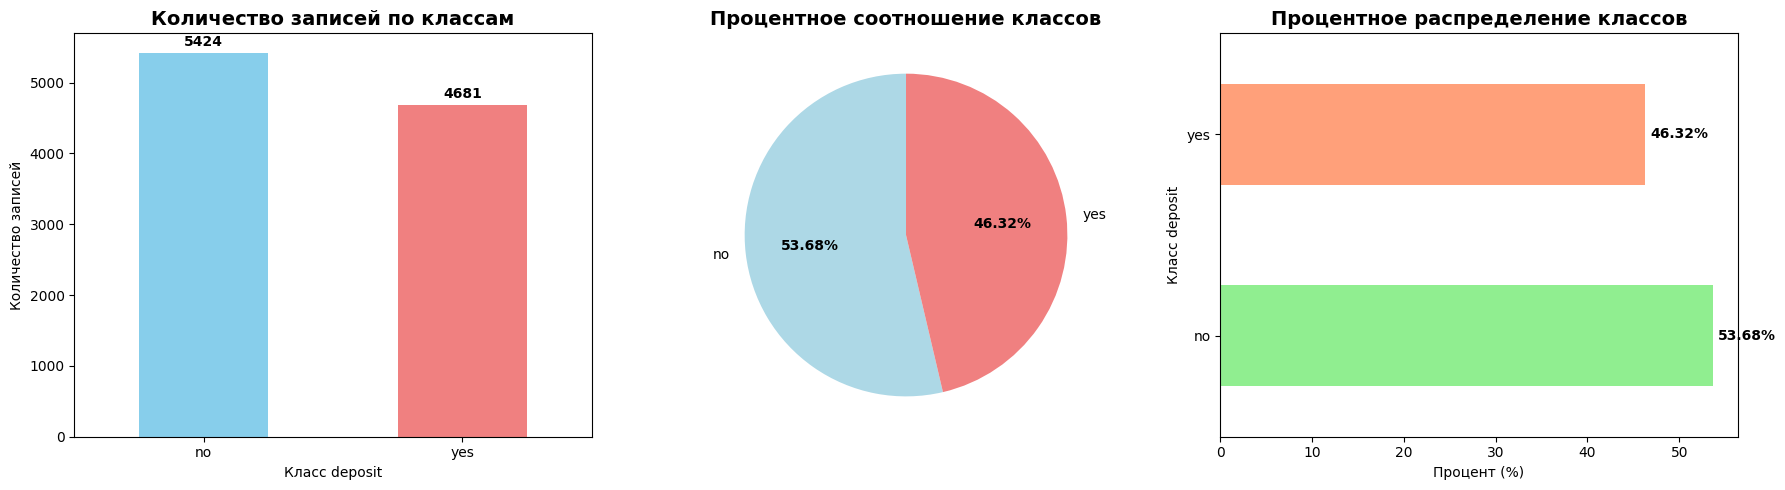


–î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞:
–û–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π: 10105
–†–∞–∑–Ω–æ—Å—Ç—å –º–µ–∂–¥—É –∫–ª–∞—Å—Å–∞–º–∏: 743 –∑–∞–ø–∏—Å–µ–π
–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ—Å—Ç–∏: 1.159


In [10]:
# –∏–∑—É—á–∏—Ç–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤ –≤ –≤–∞—à–∏—Ö –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –ø—Ä–µ–¥–º–µ—Ç –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ—Å—Ç–∏, –ø—Ä–æ–∏–ª–ª—é—Å—Ç—Ä–∏—Ä—É–π—Ç–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç
# –≤–∞—à –∫–æ–¥

# –ê–Ω–∞–ª–∏–∑ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏—è –∫–ª–∞—Å—Å–æ–≤ –≤ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π 'deposit'
print("–ê–Ω–∞–ª–∏–∑ —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ—Å—Ç–∏ –∫–ª–∞—Å—Å–æ–≤ –≤ –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π 'deposit'")
print("=" * 60)

# –ü–æ–¥—Å—á–∏—Ç—ã–≤–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞
class_counts = df['deposit'].value_counts()
print("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π –ø–æ –∫–ª–∞—Å—Å–∞–º:")
print(class_counts)
print()

# –í—ã—á–∏—Å–ª—è–µ–º –ø—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ
class_percentage = df['deposit'].value_counts(normalize=True) * 100
print("–ü—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤:")
for class_label, percentage in class_percentage.items():
    print(f"{class_label}: {percentage:.2f}%")
print()

# –û—Ü–µ–Ω–∫–∞ —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ—Å—Ç–∏
minority_class_percentage = min(class_percentage)
majority_class_percentage = max(class_percentage)
imbalance_ratio = majority_class_percentage / minority_class_percentage

print(f"–°–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ –º–∞–∂–æ—Ä–∏—Ç–∞—Ä–Ω–æ–≥–æ –∫ –º–∏–Ω–æ—Ä–∏—Ç–∞—Ä–Ω–æ–º—É –∫–ª–∞—Å—Å—É: {imbalance_ratio:.2f}:1")

if imbalance_ratio > 3:
    print("‚ö†Ô∏è  –î–ê–ù–ù–´–ï –ù–ï–°–ë–ê–õ–ê–ù–°–ò–†–û–í–ê–ù–´! –†–µ–∫–æ–º–µ–Ω–¥—É–µ—Ç—Å—è –ø—Ä–∏–º–µ–Ω–∏—Ç—å –º–µ—Ç–æ–¥—ã –±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫–∏.")
elif imbalance_ratio > 1.5:
    print("‚ö†Ô∏è  –î–∞–Ω–Ω—ã–µ —É–º–µ—Ä–µ–Ω–Ω–æ –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω—ã. –°—Ç–æ–∏—Ç —Ä–∞—Å—Å–º–æ—Ç—Ä–µ—Ç—å –º–µ—Ç–æ–¥—ã –±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫–∏.")
else:
    print("‚úÖ –î–∞–Ω–Ω—ã–µ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω—ã.")

print()

# –°–æ–∑–¥–∞–µ–º –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. –°—Ç–æ–ª–±—á–∞—Ç–∞—è –¥–∏–∞–≥—Ä–∞–º–º–∞
class_counts.plot(kind='bar', ax=axes[0], color=['skyblue', 'lightcoral'])
axes[0].set_title('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π –ø–æ –∫–ª–∞—Å—Å–∞–º', fontsize=14, fontweight='bold')
axes[0].set_xlabel('–ö–ª–∞—Å—Å deposit')
axes[0].set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π')
axes[0].tick_params(axis='x', rotation=0)

# –î–æ–±–∞–≤–ª—è–µ–º –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ —Å—Ç–æ–ª–±—Ü—ã
for i, v in enumerate(class_counts.values):
    axes[0].text(i, v + max(class_counts.values) * 0.01, str(v), 
                ha='center', va='bottom', fontweight='bold')

# 2. –ö—Ä—É–≥–æ–≤–∞—è –¥–∏–∞–≥—Ä–∞–º–º–∞
colors = ['lightblue', 'lightcoral']
wedges, texts, autotexts = axes[1].pie(class_counts.values, 
                                      labels=class_counts.index,
                                      autopct='%1.2f%%',
                                      colors=colors,
                                      startangle=90)
axes[1].set_title('–ü—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤', fontsize=14, fontweight='bold')

# –î–µ–ª–∞–µ–º —Ç–µ–∫—Å—Ç –Ω–∞ –¥–∏–∞–≥—Ä–∞–º–º–µ –±–æ–ª–µ–µ —á–∏—Ç–∞–µ–º—ã–º
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')

# 3. –ì–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª—å–Ω–∞—è —Å—Ç–æ–ª–±—á–∞—Ç–∞—è –¥–∏–∞–≥—Ä–∞–º–º–∞ —Å –ø—Ä–æ—Ü–µ–Ω—Ç–∞–º–∏
class_percentage.plot(kind='barh', ax=axes[2], color=['lightgreen', 'lightsalmon'])
axes[2].set_title('–ü—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤', fontsize=14, fontweight='bold')
axes[2].set_xlabel('–ü—Ä–æ—Ü–µ–Ω—Ç (%)')
axes[2].set_ylabel('–ö–ª–∞—Å—Å deposit')

# –î–æ–±–∞–≤–ª—è–µ–º –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ —Å—Ç–æ–ª–±—Ü—ã
for i, v in enumerate(class_percentage.values):
    axes[2].text(v + max(class_percentage.values) * 0.01, i, f'{v:.2f}%', 
                ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è
print("\n–î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞:")
print(f"–û–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π: {len(df)}")
print(f"–†–∞–∑–Ω–æ—Å—Ç—å –º–µ–∂–¥—É –∫–ª–∞—Å—Å–∞–º–∏: {abs(class_counts.iloc[0] - class_counts.iloc[1])} –∑–∞–ø–∏—Å–µ–π")
print(f"–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ—Å—Ç–∏: {imbalance_ratio:.3f}")


### –ó–∞–¥–∞–Ω–∏—è 2 –∏ 3

–ö–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

–û–°–ù–û–í–ù–´–ï –û–ü–ò–°–ê–¢–ï–õ–¨–ù–´–ï –°–¢–ê–¢–ò–°–¢–ò–ö–ò:
            age   balance       day  duration  campaign     pdays  previous
count  10105.00  10105.00  10105.00  10105.00  10105.00  10105.00  10105.00
mean      40.90    807.65     15.59    368.74      2.52     51.32      0.82
std       11.73    994.15      8.44    346.65      2.71    109.64      2.24
min       18.00  -2049.00      1.00      2.00      1.00     -1.00      0.00
25%       32.00     95.00      8.00    137.00      1.00     -1.00      0.00
50%       38.00    445.00     15.00    252.00      2.00     -1.00      0.00
75%       48.00   1227.00     22.00    490.00      3.00      2.00      1.00
max       95.00   4063.00     31.00   3881.00     43.00    854.00     58.00

–ü–û–î–†–û–ë–ù–´–ô –ê–ù–ê–õ–ò–ó –ü–û –ö–ê–ñ–î–û–ô –ü–ï–†–ï–ú–ï–ù–ù–û–ô:

üìä –ü–ï–†–ï–ú–ï–ù–ù–ê–Ø: AGE
------------------------

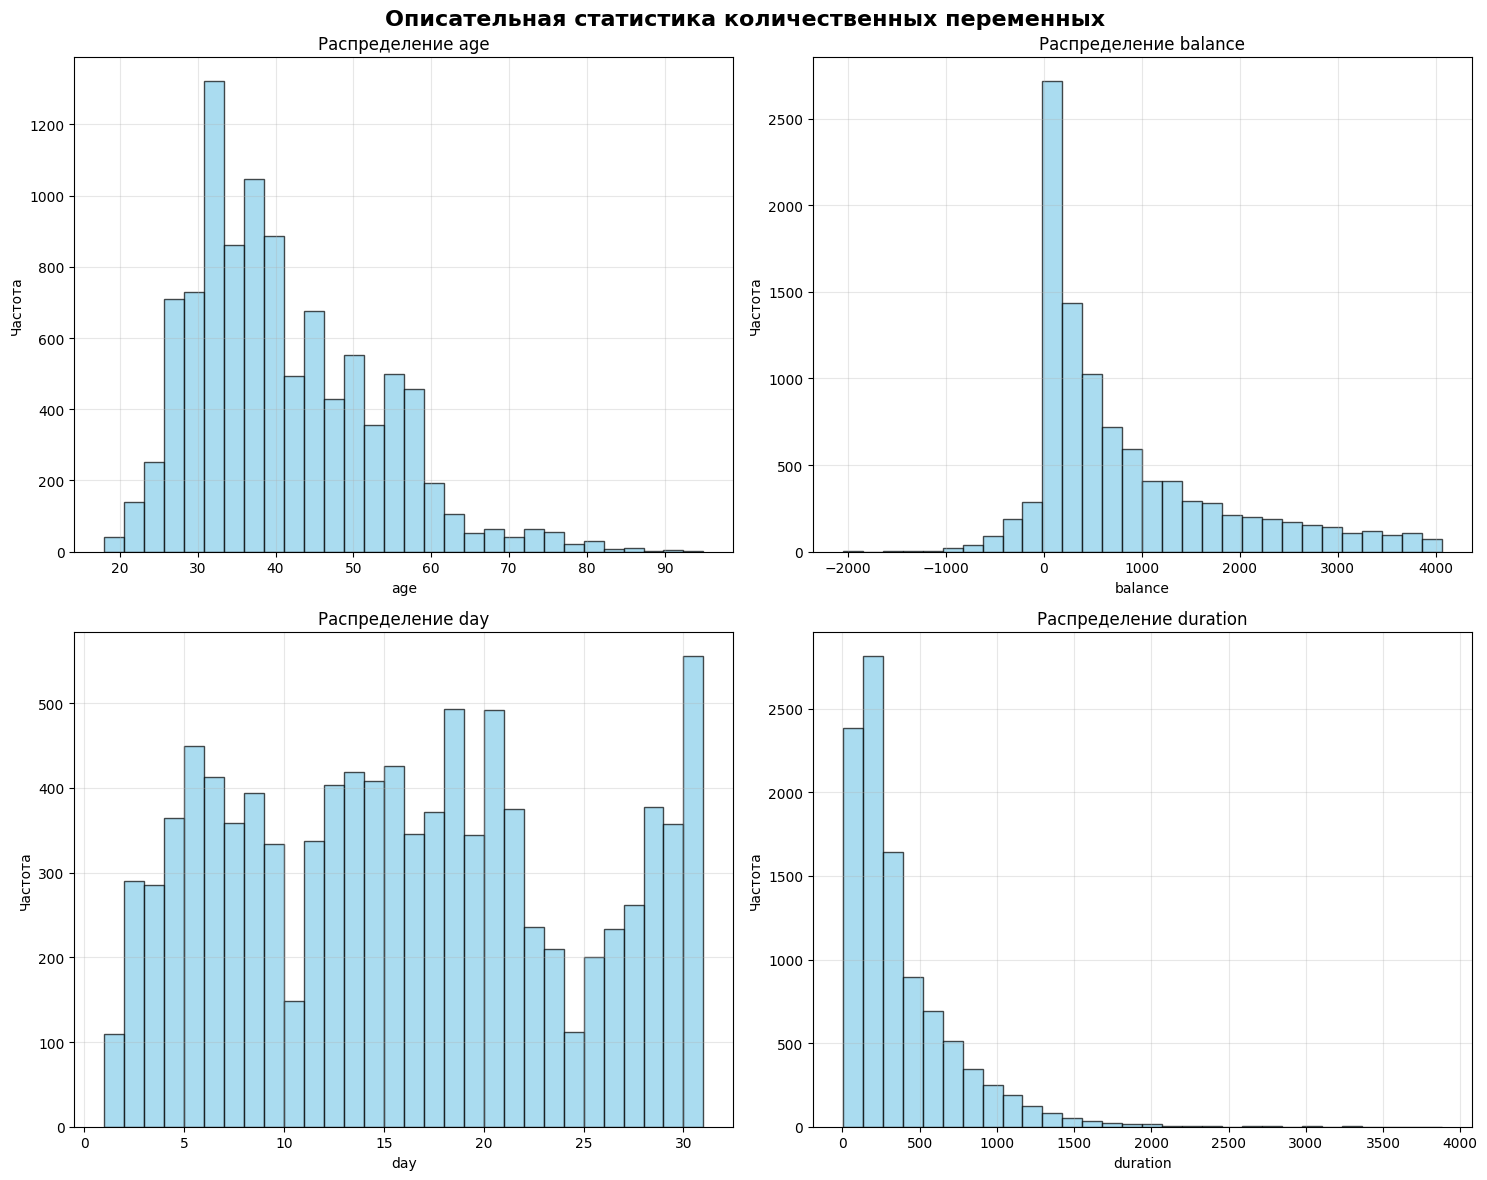

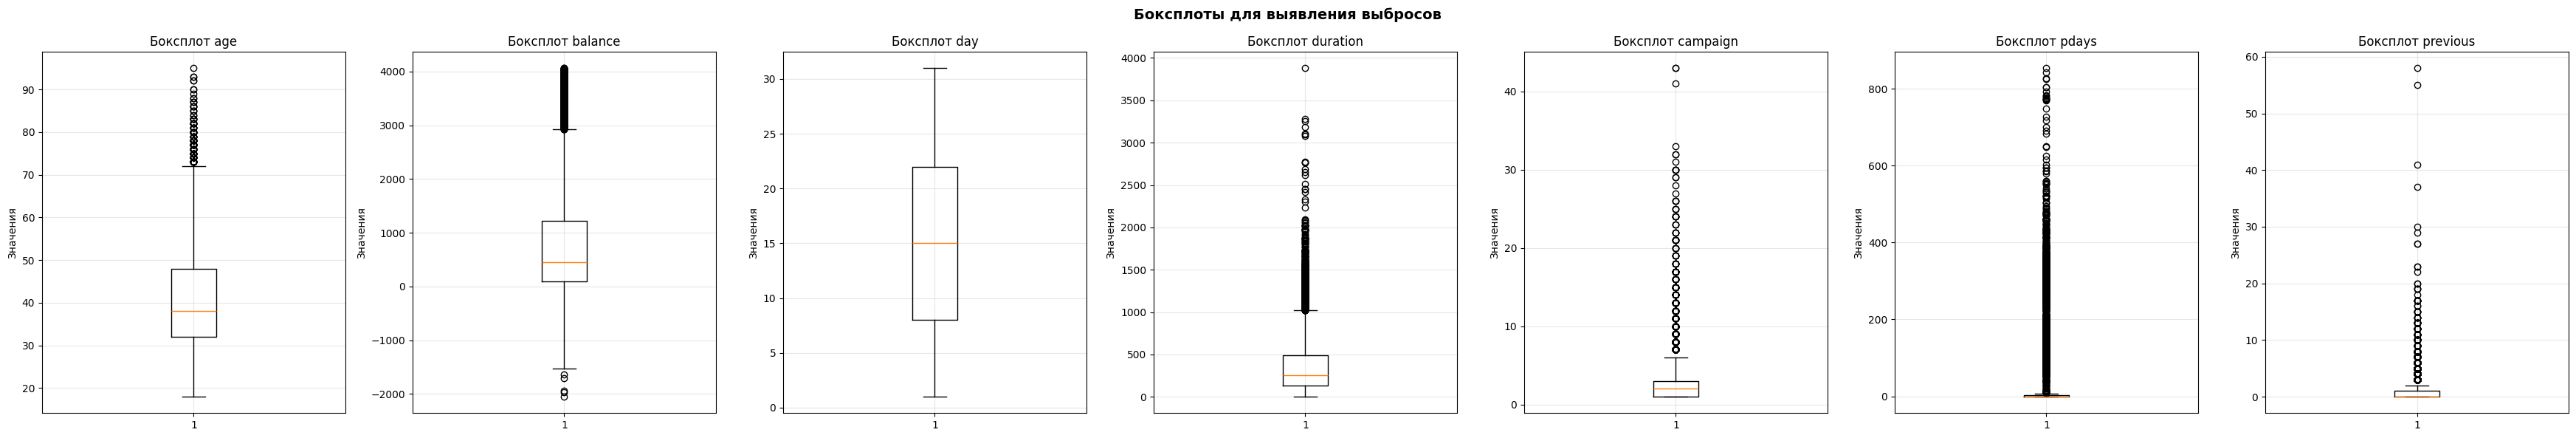

In [11]:
#—Ä–∞—Å—Å—á–∏—Ç–∞–π—Ç–µ –æ–ø–∏—Å–∞—Ç–µ–ª—å–Ω—ã–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –¥–ª—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö, –ø—Ä–æ–∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–π—Ç–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç
#–≤–∞—à –∫–æ–¥

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ: {numeric_columns}")
print()

# –û—Å–Ω–æ–≤–Ω—ã–µ –æ–ø–∏—Å–∞—Ç–µ–ª—å–Ω—ã–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏
desc_stats = df[numeric_columns].describe()
print("–û–°–ù–û–í–ù–´–ï –û–ü–ò–°–ê–¢–ï–õ–¨–ù–´–ï –°–¢–ê–¢–ò–°–¢–ò–ö–ò:")
print(desc_stats.round(2))
print()

# –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –º–µ—Ä—ã –¥–ª—è –∫–∞–∂–¥–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
print("–ü–û–î–†–û–ë–ù–´–ô –ê–ù–ê–õ–ò–ó –ü–û –ö–ê–ñ–î–û–ô –ü–ï–†–ï–ú–ï–ù–ù–û–ô:")
print("=" * 80)

for col in numeric_columns:
    print(f"\nüìä –ü–ï–†–ï–ú–ï–ù–ù–ê–Ø: {col.upper()}")
    print("-" * 50)
    
    data = df[col]
    
    # –û—Å–Ω–æ–≤–Ω—ã–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏
    mean_val = data.mean()
    median_val = data.median()
    mode_val = data.mode().iloc[0] if len(data.mode()) > 0 else "–ù–µ—Ç –º–æ–¥—ã"
    std_val = data.std()
    var_val = data.var()
    min_val = data.min()
    max_val = data.max()
    range_val = max_val - min_val
    
    # –ö–≤–∞—Ä—Ç–∏–ª–∏ –∏ –º–µ–∂–∫–≤–∞—Ä—Ç–∏–ª—å–Ω—ã–π —Ä–∞–∑–º–∞—Ö
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    
    # –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –≤–∞—Ä–∏–∞—Ü–∏–∏
    cv = (std_val / mean_val) * 100 if mean_val != 0 else 0
    
    # –ê—Å–∏–º–º–µ—Ç—Ä–∏—è –∏ —ç–∫—Å—Ü–µ—Å—Å
    skewness = data.skew()
    kurtosis = data.kurtosis()
    
    print(f"üìà –ú–µ—Ä—ã —Ü–µ–Ω—Ç—Ä–∞–ª—å–Ω–æ–π —Ç–µ–Ω–¥–µ–Ω—Ü–∏–∏:")
    print(f"   ‚Ä¢ –°—Ä–µ–¥–Ω–µ–µ: {mean_val:.2f}")
    print(f"   ‚Ä¢ –ú–µ–¥–∏–∞–Ω–∞: {median_val:.2f}")
    print(f"   ‚Ä¢ –ú–æ–¥–∞: {mode_val}")
    
    print(f"\nüìè –ú–µ—Ä—ã —Ä–∞–∑–±—Ä–æ—Å–∞:")
    print(f"   ‚Ä¢ –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ: {std_val:.2f}")
    print(f"   ‚Ä¢ –î–∏—Å–ø–µ—Ä—Å–∏—è: {var_val:.2f}")
    print(f"   ‚Ä¢ –†–∞–∑–º–∞—Ö: {range_val:.2f} (–æ—Ç {min_val:.2f} –¥–æ {max_val:.2f})")
    print(f"   ‚Ä¢ –ú–µ–∂–∫–≤–∞—Ä—Ç–∏–ª—å–Ω—ã–π —Ä–∞–∑–º–∞—Ö (IQR): {iqr:.2f}")
    print(f"   ‚Ä¢ –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –≤–∞—Ä–∏–∞—Ü–∏–∏: {cv:.2f}%")
    
    print(f"\nüìä –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ:")
    print(f"   ‚Ä¢ –ê—Å–∏–º–º–µ—Ç—Ä–∏—è (skewness): {skewness:.3f}")
    print(f"   ‚Ä¢ –≠–∫—Å—Ü–µ—Å—Å (kurtosis): {kurtosis:.3f}")
    
    # –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è –∞—Å–∏–º–º–µ—Ç—Ä–∏–∏
    if abs(skewness) < 0.5:
        skew_interp = "–ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ —Å–∏–º–º–µ—Ç—Ä–∏—á–Ω–æ–µ"
    elif skewness > 0.5:
        skew_interp = "–ø—Ä–∞–≤–æ—Å—Ç–æ—Ä–æ–Ω–Ω—è—è –∞—Å–∏–º–º–µ—Ç—Ä–∏—è (–¥–ª–∏–Ω–Ω—ã–π –ø—Ä–∞–≤—ã–π —Ö–≤–æ—Å—Ç)"
    else:
        skew_interp = "–ª–µ–≤–æ—Å—Ç–æ—Ä–æ–Ω–Ω—è—è –∞—Å–∏–º–º–µ—Ç—Ä–∏—è (–¥–ª–∏–Ω–Ω—ã–π –ª–µ–≤—ã–π —Ö–≤–æ—Å—Ç)"
    
    # –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è —ç–∫—Å—Ü–µ—Å—Å–∞
    if abs(kurtosis) < 0.5:
        kurt_interp = "–Ω–æ—Ä–º–∞–ª—å–Ω–∞—è –æ—Å—Ç—Ä–æ–≤–µ—Ä—à–∏–Ω–Ω–æ—Å—Ç—å"
    elif kurtosis > 0.5:
        kurt_interp = "–≤—ã—Å–æ–∫–∞—è –æ—Å—Ç—Ä–æ–≤–µ—Ä—à–∏–Ω–Ω–æ—Å—Ç—å (—Ç–æ–ª—Å—Ç—ã–µ —Ö–≤–æ—Å—Ç—ã)"
    else:
        kurt_interp = "–Ω–∏–∑–∫–∞—è –æ—Å—Ç—Ä–æ–≤–µ—Ä—à–∏–Ω–Ω–æ—Å—Ç—å (—Ç–æ–Ω–∫–∏–µ —Ö–≤–æ—Å—Ç—ã)"
    
    print(f"\nüí° –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è:")
    print(f"   ‚Ä¢ {skew_interp}")
    print(f"   ‚Ä¢ {kurt_interp}")
    
    # –ê–Ω–∞–ª–∏–∑ –≤–∞—Ä–∏–∞—Ç–∏–≤–Ω–æ—Å—Ç–∏
    print(f"\nüîç –ê–Ω–∞–ª–∏–∑ –≤–∞—Ä–∏–∞—Ç–∏–≤–Ω–æ—Å—Ç–∏:")
    if cv < 15:
        var_level = "–Ω–∏–∑–∫–∞—è"
    elif cv < 35:
        var_level = "—É–º–µ—Ä–µ–Ω–Ω–∞—è"
    else:
        var_level = "–≤—ã—Å–æ–∫–∞—è"
    print(f"   ‚Ä¢ –í–∞—Ä–∏–∞—Ç–∏–≤–Ω–æ—Å—Ç—å –¥–∞–Ω–Ω—ã—Ö: {var_level} ({cv:.1f}%)")
    
    # –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–µ—Ä —Ü–µ–Ω—Ç—Ä–∞–ª—å–Ω–æ–π —Ç–µ–Ω–¥–µ–Ω—Ü–∏–∏
    print(f"\n‚öñÔ∏è –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–µ—Ä —Ü–µ–Ω—Ç—Ä–∞–ª—å–Ω–æ–π —Ç–µ–Ω–¥–µ–Ω—Ü–∏–∏:")
    diff_mean_median = abs(mean_val - median_val)
    if diff_mean_median / std_val < 0.2:
        central_tendency = "–°—Ä–µ–¥–Ω–µ–µ ‚âà –º–µ–¥–∏–∞–Ω–∞ ‚Üí —Å–∏–º–º–µ—Ç—Ä–∏—á–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ"
    elif mean_val > median_val:
        central_tendency = "–°—Ä–µ–¥–Ω–µ–µ > –º–µ–¥–∏–∞–Ω–∞ ‚Üí –≤–æ–∑–º–æ–∂–Ω—ã –≤—ã–±—Ä–æ—Å—ã —Å–ø—Ä–∞–≤–∞ (–±–æ–ª—å—à–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è)"
    else:
        central_tendency = "–°—Ä–µ–¥–Ω–µ–µ < –º–µ–¥–∏–∞–Ω–∞ ‚Üí –≤–æ–∑–º–æ–∂–Ω—ã –≤—ã–±—Ä–æ—Å—ã —Å–ª–µ–≤–∞ (–º–∞–ª—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è)"
    print(f"   ‚Ä¢ {central_tendency}")
    
    # –ü–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω—ã–µ –≤—ã–±—Ä–æ—Å—ã –ø–æ –ø—Ä–∞–≤–∏–ª—É 3 —Å–∏–≥–º
    lower_3sigma = mean_val - 3 * std_val
    upper_3sigma = mean_val + 3 * std_val
    outliers_3sigma = ((data < lower_3sigma) | (data > upper_3sigma)).sum()
    
    print(f"\nüö® –ü–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω—ã–µ –≤—ã–±—Ä–æ—Å—ã (–ø—Ä–∞–≤–∏–ª–æ 3œÉ):")
    print(f"   ‚Ä¢ –ì—Ä–∞–Ω–∏—Ü—ã: [{lower_3sigma:.2f}, {upper_3sigma:.2f}]")
    print(f"   ‚Ä¢ –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω—ã—Ö –≤—ã–±—Ä–æ—Å–æ–≤: {outliers_3sigma}")
    
    print("-" * 50)

# –ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑
print(f"\n\nüìà –ö–û–†–†–ï–õ–Ø–¶–ò–û–ù–ù–´–ô –ê–ù–ê–õ–ò–ó")
print("=" * 50)
correlation_matrix = df[numeric_columns].corr()
print("–ú–∞—Ç—Ä–∏—Ü–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π:")
print(correlation_matrix.round(3))

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('–û–ø–∏—Å–∞—Ç–µ–ª—å–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö', fontsize=16, fontweight='bold')

# 1. –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã
for i, col in enumerate(numeric_columns):
    row = i // 2
    col_idx = i % 2
    if i < 4:  # –º–∞–∫—Å–∏–º—É–º 4 –≥—Ä–∞—Ñ–∏–∫–∞
        axes[row, col_idx].hist(df[col], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        axes[row, col_idx].set_title(f'–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ {col}')
        axes[row, col_idx].set_xlabel(col)
        axes[row, col_idx].set_ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
        axes[row, col_idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# –ë–æ–∫—Å–ø–ª–æ—Ç—ã –¥–ª—è –≤—ã—è–≤–ª–µ–Ω–∏—è –≤—ã–±—Ä–æ—Å–æ–≤
fig, axes = plt.subplots(1, len(numeric_columns), figsize=(5*len(numeric_columns), 6))
if len(numeric_columns) == 1:
    axes = [axes]

for i, col in enumerate(numeric_columns):
    axes[i].boxplot(df[col])
    axes[i].set_title(f'–ë–æ–∫—Å–ø–ª–æ—Ç {col}')
    axes[i].set_ylabel('–ó–Ω–∞—á–µ–Ω–∏—è')
    axes[i].grid(True, alpha=0.3)

plt.suptitle('–ë–æ–∫—Å–ø–ª–æ—Ç—ã –¥–ª—è –≤—ã—è–≤–ª–µ–Ω–∏—è –≤—ã–±—Ä–æ—Å–æ–≤', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### –ó–∞–¥–∞–Ω–∏—è 4 –∏ 5

–ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']

–ü–û–î–†–û–ë–ù–´–ô –ê–ù–ê–õ–ò–ó –ö–ê–¢–ï–ì–û–†–ò–ê–õ–¨–ù–´–• –ü–ï–†–ï–ú–ï–ù–ù–´–•:

üìä –ü–ï–†–ï–ú–ï–ù–ù–ê–Ø: JOB
------------------------------------------------------------
üìà –û—Å–Ω–æ–≤–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞:
   ‚Ä¢ –û–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π: 10105
   ‚Ä¢ –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π: 11
   ‚Ä¢ –ù–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ (–º–æ–¥–∞): management

üìä –ß–∞—Å—Ç–æ—Ç–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ:
–ó–Ω–∞—á–µ–Ω–∏–µ             –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ   –ü—Ä–æ—Ü–µ–Ω—Ç   
---------------------------------------------
management           2315         22.91%
blue-collar          1807         17.88%
technician           1638         16.21%
admin.               1246         12.33%
services             868          8.59%
retired              663          6.56%
se

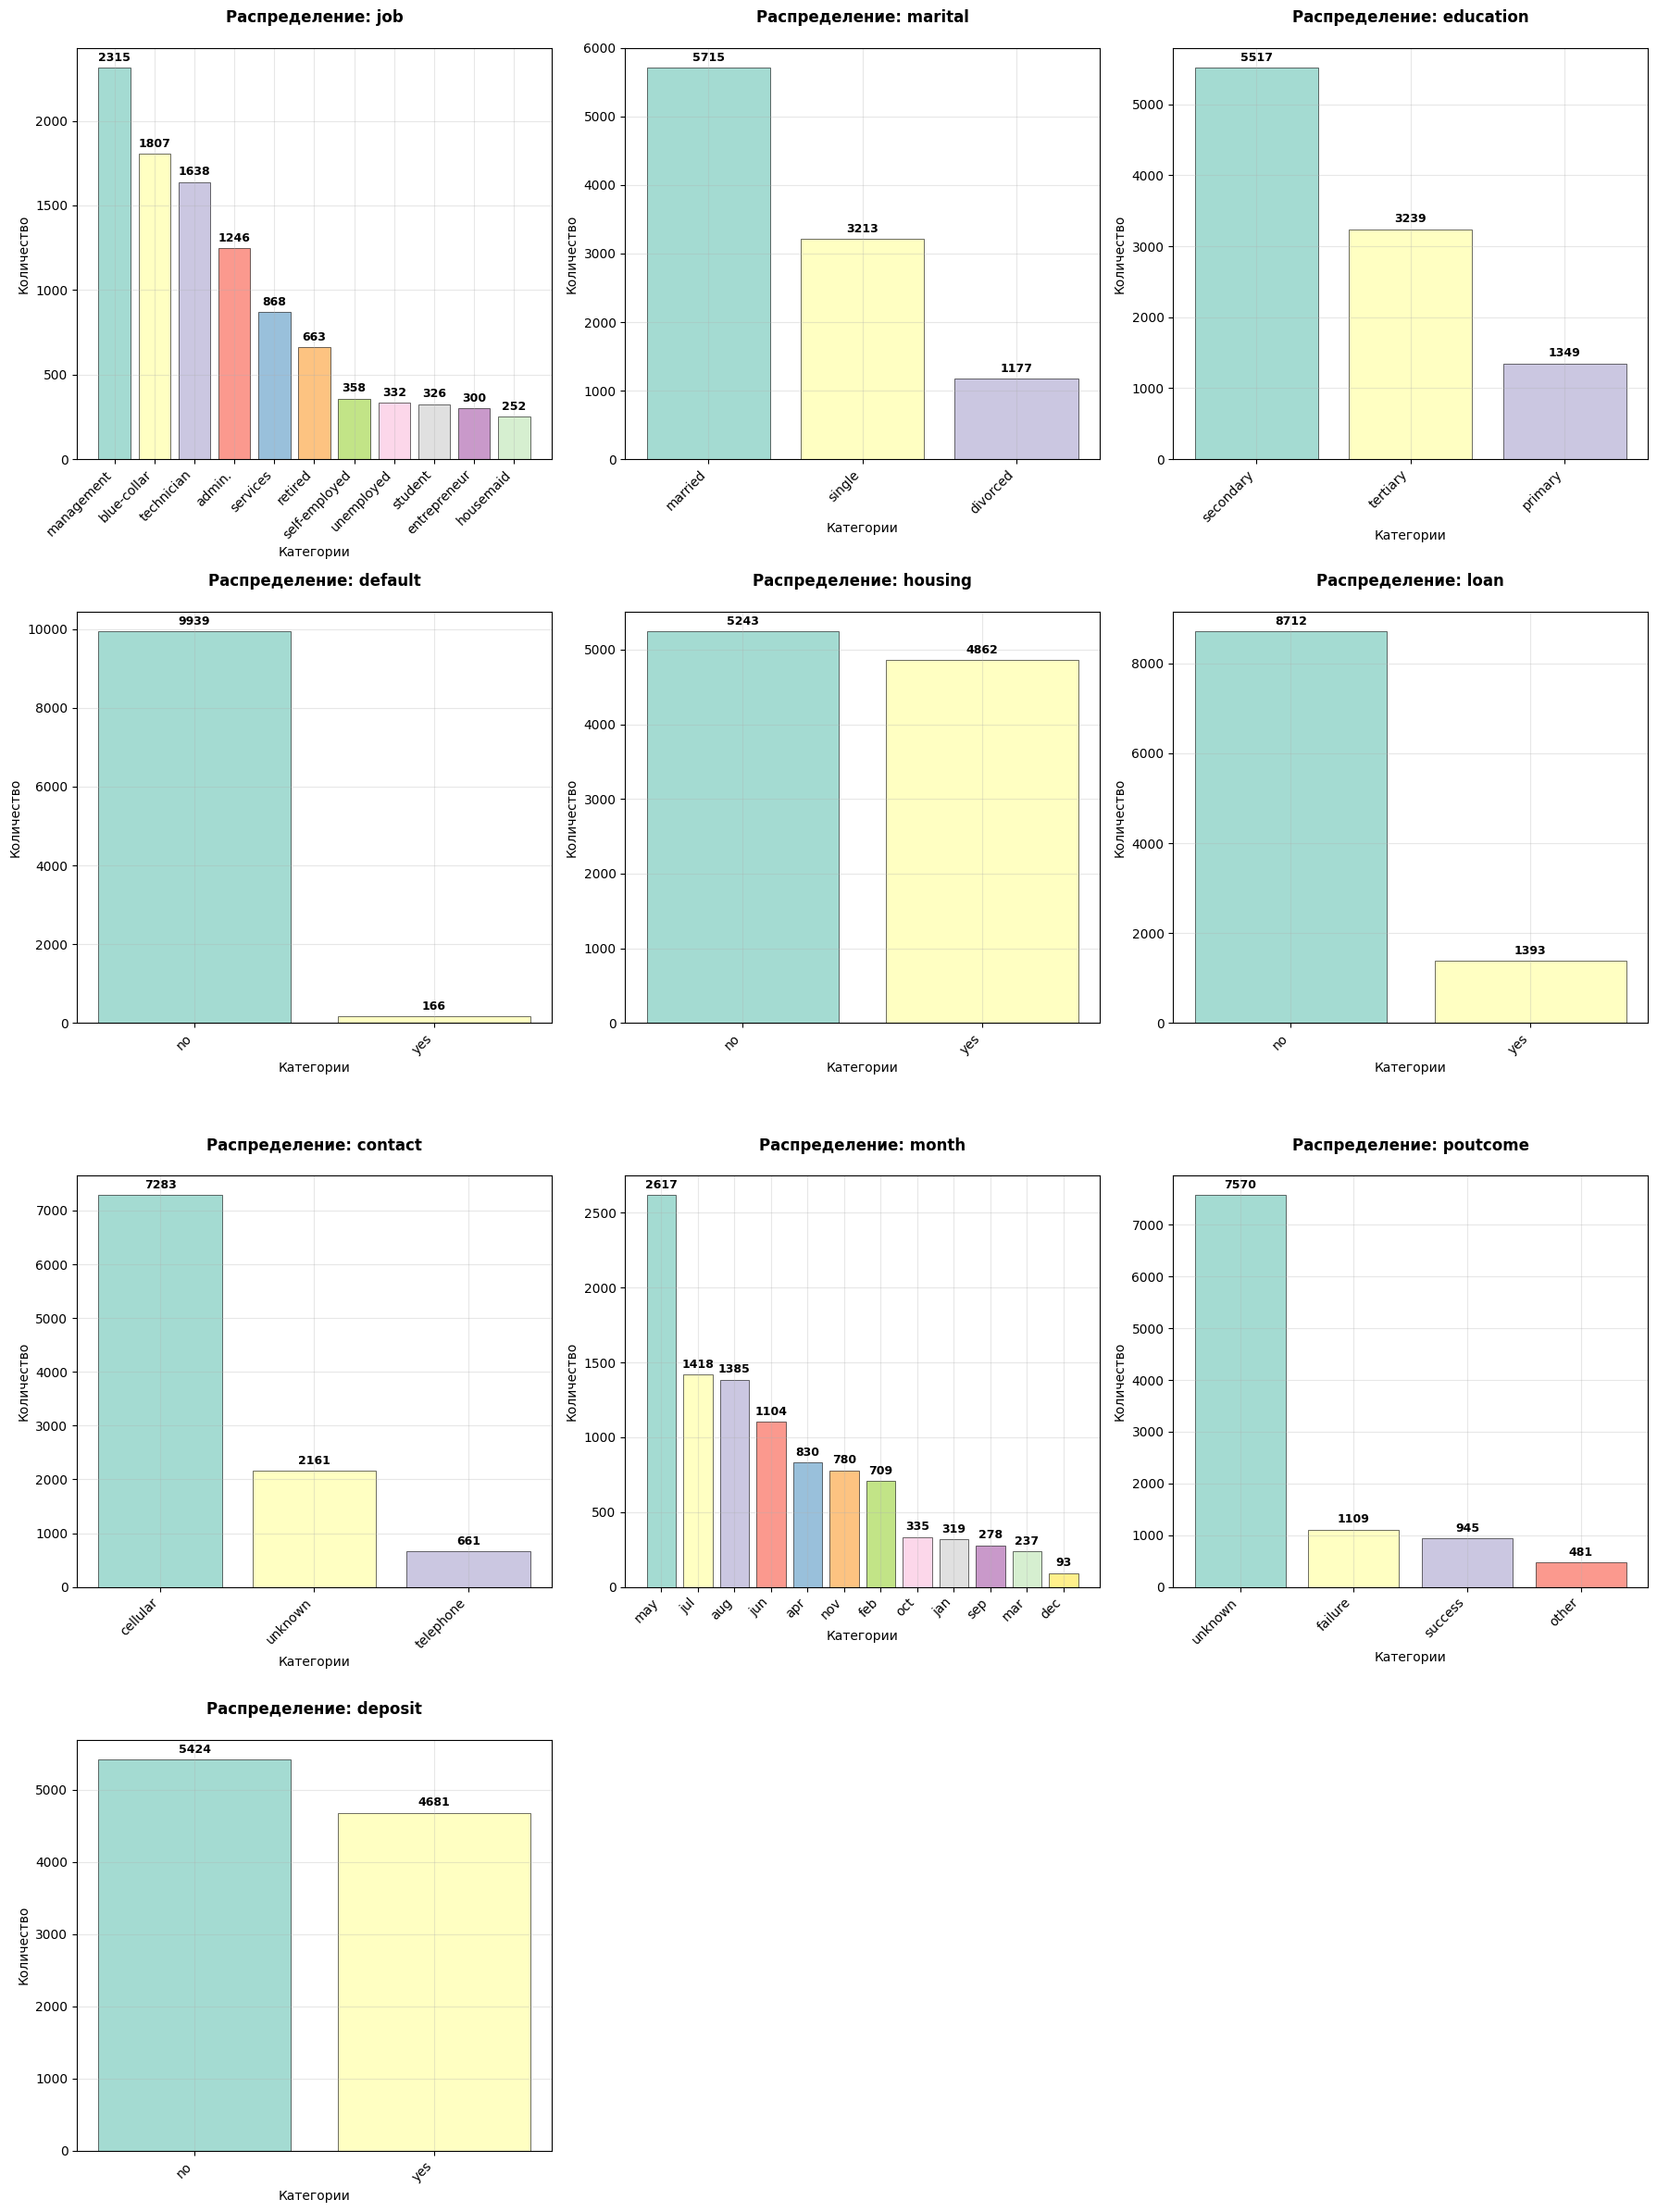

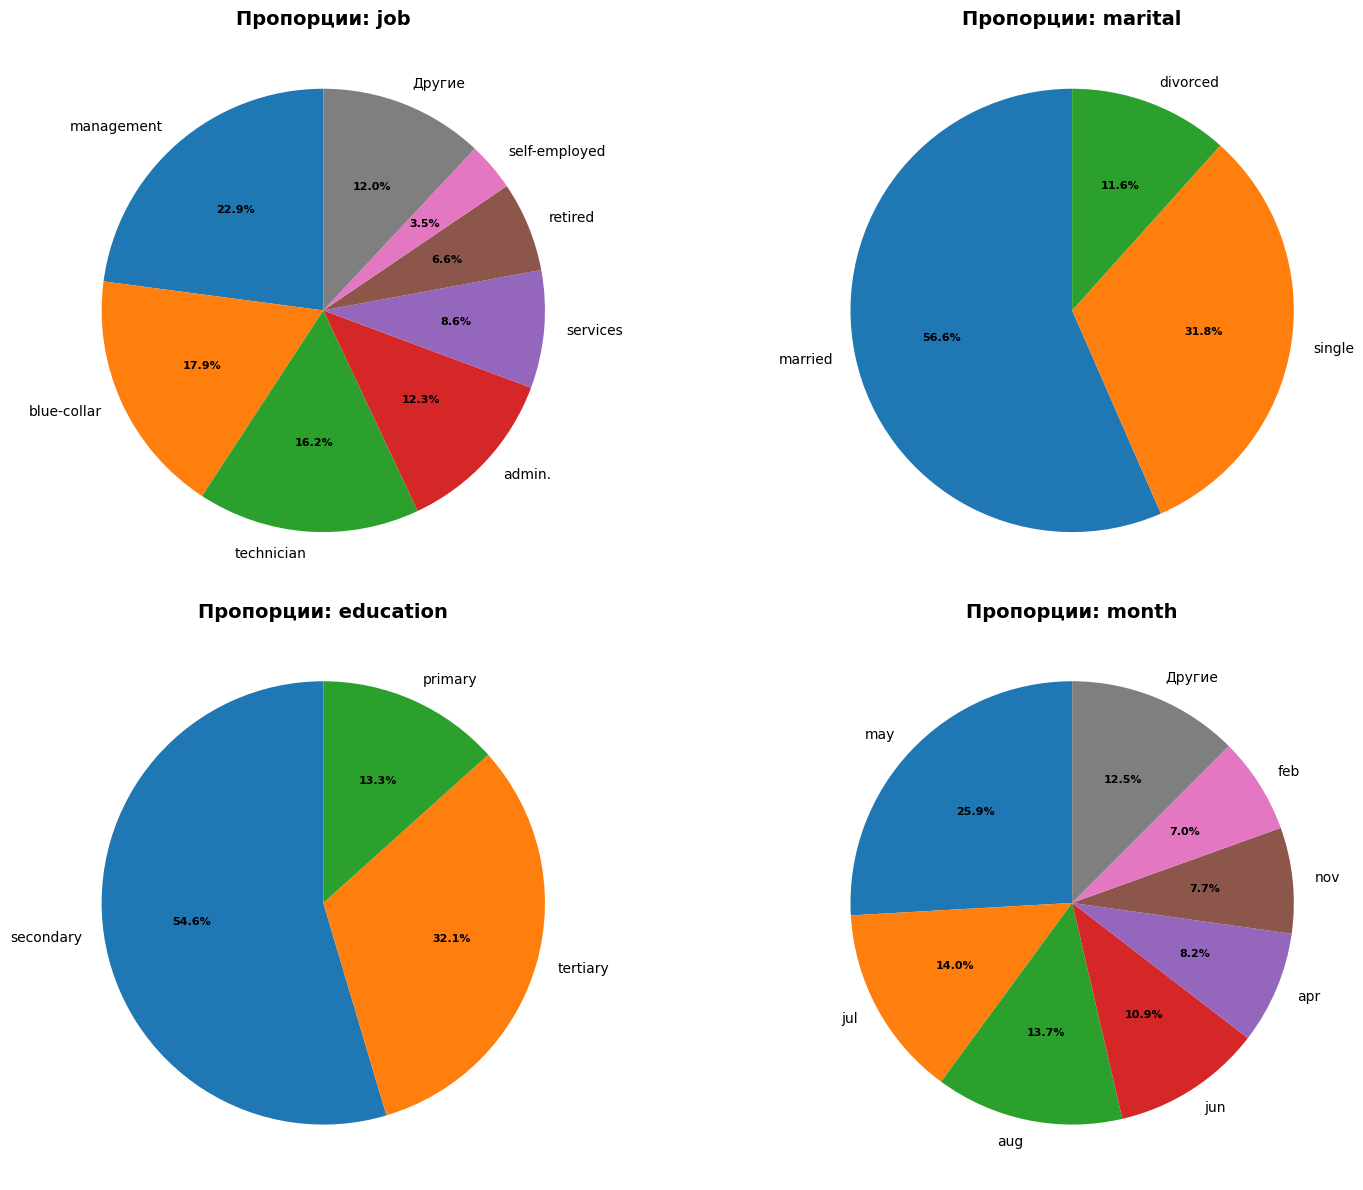



üéØ –ö–õ–Æ–ß–ï–í–´–ï –í–´–í–û–î–´ –ü–û –ö–ê–¢–ï–ì–û–†–ò–ê–õ–¨–ù–´–ú –ü–ï–†–ï–ú–ï–ù–ù–´–ú:
‚úÖ –ü–†–û–§–ï–°–°–ò–ò: –ü—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–æ 11 —Å—Ñ–µ—Ä –∑–∞–Ω—è—Ç–æ—Å—Ç–∏, –ª–∏–¥–∏—Ä—É–µ—Ç 'management'
‚úÖ –ö–ê–ú–ü–ê–ù–ò–ò: –ú–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤—ã–µ –∫–∞–º–ø–∞–Ω–∏–∏ –ø—Ä–æ–≤–æ–¥–∏–ª–∏—Å—å –∫—Ä—É–≥–ª–æ–≥–æ–¥–∏—á–Ω–æ (12 –º–µ—Å—è—Ü–µ–≤)
‚úÖ –°–ï–ú–ï–ô–ù–û–ï –ü–û–õ–û–ñ–ï–ù–ò–ï: –ß–∞—â–µ –≤—Å–µ–≥–æ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è 'married' (56.6%)
‚úÖ –û–ë–†–ê–ó–û–í–ê–ù–ò–ï: –ü—Ä–µ–æ–±–ª–∞–¥–∞–µ—Ç 'secondary' (54.6%)


In [12]:
#—Ä–∞—Å—Å—á–∏—Ç–∞–π—Ç–µ –æ–ø–∏—Å–∞—Ç–µ–ª—å–Ω—ã–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –¥–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö, –ø—Ä–æ–∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–π—Ç–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç
#–≤–∞—à –∫–æ–¥
#–ø–æ—Å—Ç—Ä–æ–π—Ç–µ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏, –∏–ª–ª—é—Å—Ç—Ä–∏—Ä—É—é—â–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(f"–ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ: {categorical_columns}")
print()

# –ü–æ–¥—Ä–æ–±–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –∫–∞–∂–¥–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
print("–ü–û–î–†–û–ë–ù–´–ô –ê–ù–ê–õ–ò–ó –ö–ê–¢–ï–ì–û–†–ò–ê–õ–¨–ù–´–• –ü–ï–†–ï–ú–ï–ù–ù–´–•:")
print("=" * 80)

for col in categorical_columns:
    print(f"\nüìä –ü–ï–†–ï–ú–ï–ù–ù–ê–Ø: {col.upper()}")
    print("-" * 60)
    
    # –û—Å–Ω–æ–≤–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞
    unique_count = df[col].nunique()
    total_count = len(df[col])
    mode_value = df[col].mode().iloc[0] if len(df[col].mode()) > 0 else "–ù–µ—Ç –º–æ–¥—ã"
    
    print(f"üìà –û—Å–Ω–æ–≤–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞:")
    print(f"   ‚Ä¢ –û–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π: {total_count}")
    print(f"   ‚Ä¢ –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π: {unique_count}")
    print(f"   ‚Ä¢ –ù–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ (–º–æ–¥–∞): {mode_value}")
    
    # –ß–∞—Å—Ç–æ—Ç–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ
    value_counts = df[col].value_counts()
    value_percentages = df[col].value_counts(normalize=True) * 100
    
    print(f"\nüìä –ß–∞—Å—Ç–æ—Ç–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ:")
    print(f"{'–ó–Ω–∞—á–µ–Ω–∏–µ':<20} {'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ':<12} {'–ü—Ä–æ—Ü–µ–Ω—Ç':<10}")
    print("-" * 45)
    for value, count in value_counts.items():
        percentage = value_percentages[value]
        print(f"{str(value):<20} {count:<12} {percentage:.2f}%")
    
    # –°–ø–µ—Ü–∏—Ñ–∏—á–Ω–∞—è –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è –¥–ª—è –∫–∞–∂–¥–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
    print(f"\nüí° –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π '{col}':")
    
    if col == 'job':
        print(f"   ‚Ä¢ –í –±–∞–Ω–∫–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω—ã –∫–ª–∏–µ–Ω—Ç—ã –∏–∑ {unique_count} —Ä–∞–∑–ª–∏—á–Ω—ã—Ö —Å—Ñ–µ—Ä –∑–∞–Ω—è—Ç–æ—Å—Ç–∏")
        print(f"   ‚Ä¢ –ù–∞–∏–±–æ–ª–µ–µ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–Ω–∞—è –ø—Ä–æ—Ñ–µ—Å—Å–∏—è: {mode_value}")
        print(f"   ‚Ä¢ –ü—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª—å–Ω–æ–µ —Ä–∞–∑–Ω–æ–æ–±—Ä–∞–∑–∏–µ –∫–ª–∏–µ–Ω—Ç—Å–∫–æ–π –±–∞–∑—ã –¥–æ–≤–æ–ª—å–Ω–æ —à–∏—Ä–æ–∫–æ–µ")
        
        # –¢–æ–ø-5 –ø—Ä–æ—Ñ–µ—Å—Å–∏–π
        top_jobs = value_counts.head()
        print(f"   ‚Ä¢ –¢–û–ü-5 –ø—Ä–æ—Ñ–µ—Å—Å–∏–π:")
        for i, (job, count) in enumerate(top_jobs.items(), 1):
            print(f"     {i}. {job}: {count} —á–µ–ª. ({value_percentages[job]:.1f}%)")
    
    elif col == 'marital':
        print(f"   ‚Ä¢ –ü—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω—ã {unique_count} –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ —Å–µ–º–µ–π–Ω–æ–≥–æ –ø–æ–ª–æ–∂–µ–Ω–∏—è")
        print(f"   ‚Ä¢ –ù–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç–æ–µ —Å–µ–º–µ–π–Ω–æ–µ –ø–æ–ª–æ–∂–µ–Ω–∏–µ: {mode_value}")
        if value_counts.iloc[0] / total_count > 0.5:
            print(f"   ‚Ä¢ –Ø–≤–Ω–æ–µ –ø—Ä–µ–æ–±–ª–∞–¥–∞–Ω–∏–µ –æ–¥–Ω–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ ({value_percentages.iloc[0]:.1f}%)")
        else:
            print(f"   ‚Ä¢ –û—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º")
    
    elif col == 'education':
        print(f"   ‚Ä¢ –í –±–∞–∑–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω—ã {unique_count} —É—Ä–æ–≤–Ω—è –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è")
        print(f"   ‚Ä¢ –ù–∞–∏–±–æ–ª–µ–µ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–Ω—ã–π —É—Ä–æ–≤–µ–Ω—å –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è: {mode_value}")
        print(f"   ‚Ä¢ –û–±—Ä–∞–∑–æ–≤–∞—Ç–µ–ª—å–Ω–∞—è —Å—Ç—Ä—É–∫—Ç—É—Ä–∞ –∫–ª–∏–µ–Ω—Ç–æ–≤:")
        for edu, percentage in value_percentages.items():
            if percentage > 10:
                print(f"     - {edu}: {percentage:.1f}% (–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–∞—è –¥–æ–ª—è)")
            else:
                print(f"     - {edu}: {percentage:.1f}%")
    
    elif col == 'default':
        print(f"   ‚Ä¢ –ü–µ—Ä–µ–º–µ–Ω–Ω–∞—è –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞–ª–∏—á–∏–µ –∫—Ä–µ–¥–∏—Ç–Ω—ã—Ö –¥–µ—Ñ–æ–ª—Ç–æ–≤")
        print(f"   ‚Ä¢ –ù–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ: {mode_value}")
        if 'yes' in value_counts.index:
            default_rate = value_percentages['yes']
            print(f"   ‚Ä¢ –î–æ–ª—è –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å –¥–µ—Ñ–æ–ª—Ç–∞–º–∏: {default_rate:.2f}%")
        else:
            print(f"   ‚Ä¢ –î–æ–ª—è –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å –¥–µ—Ñ–æ–ª—Ç–∞–º–∏: 0%")
    
    elif col == 'housing':
        print(f"   ‚Ä¢ –ü–µ—Ä–µ–º–µ–Ω–Ω–∞—è –æ—Ç—Ä–∞–∂–∞–µ—Ç –Ω–∞–ª–∏—á–∏–µ –∂–∏–ª–∏—â–Ω–æ–≥–æ –∫—Ä–µ–¥–∏—Ç–∞")
        if 'yes' in value_counts.index:
            housing_rate = value_percentages['yes']
            print(f"   ‚Ä¢ –î–æ–ª—è –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å –∂–∏–ª–∏—â–Ω—ã–º –∫—Ä–µ–¥–∏—Ç–æ–º: {housing_rate:.2f}%")
    
    elif col == 'loan':
        print(f"   ‚Ä¢ –ü–µ—Ä–µ–º–µ–Ω–Ω–∞—è –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞–ª–∏—á–∏–µ –ø–µ—Ä—Å–æ–Ω–∞–ª—å–Ω–æ–≥–æ –∫—Ä–µ–¥–∏—Ç–∞")
        if 'yes' in value_counts.index:
            loan_rate = value_percentages['yes']
            print(f"   ‚Ä¢ –î–æ–ª—è –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å –ø–µ—Ä—Å–æ–Ω–∞–ª—å–Ω—ã–º –∫—Ä–µ–¥–∏—Ç–æ–º: {loan_rate:.2f}%")
    
    elif col == 'contact':
        print(f"   ‚Ä¢ –°–ø–æ—Å–æ–±—ã —Å–≤—è–∑–∏ —Å –∫–ª–∏–µ–Ω—Ç–∞–º–∏: {unique_count} —Ç–∏–ø–∞")
        print(f"   ‚Ä¢ –û—Å–Ω–æ–≤–Ω–æ–π —Å–ø–æ—Å–æ–± —Å–≤—è–∑–∏: {mode_value}")
    
    elif col == 'month':
        print(f"   ‚Ä¢ –ú–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤—ã–µ –∫–∞–º–ø–∞–Ω–∏–∏ –ø—Ä–æ–≤–æ–¥–∏–ª–∏—Å—å –≤ {unique_count} –º–µ—Å—è—Ü–∞—Ö")
        if unique_count == 12:
            print(f"   ‚Ä¢ –ö–∞–º–ø–∞–Ω–∏–∏ –ø—Ä–æ—Ö–æ–¥–∏–ª–∏ –∫—Ä—É–≥–ª–æ–≥–æ–¥–∏—á–Ω–æ")
        else:
            print(f"   ‚Ä¢ –ö–∞–º–ø–∞–Ω–∏–∏ –ø—Ä–æ—Ö–æ–¥–∏–ª–∏ –Ω–µ –≤–æ –≤—Å–µ –º–µ—Å—è—Ü—ã –≥–æ–¥–∞")
            months_with_campaigns = list(value_counts.index)
            print(f"   ‚Ä¢ –ú–µ—Å—è—Ü—ã —Å –∫–∞–º–ø–∞–Ω–∏—è–º–∏: {', '.join(months_with_campaigns)}")
            
        # –ù–∞–∏–±–æ–ª–µ–µ/–Ω–∞–∏–º–µ–Ω–µ–µ –∞–∫—Ç–∏–≤–Ω—ã–µ –º–µ—Å—è—Ü—ã
        most_active = value_counts.index[0]
        least_active = value_counts.index[-1]
        print(f"   ‚Ä¢ –ù–∞–∏–±–æ–ª–µ–µ –∞–∫—Ç–∏–≤–Ω—ã–π –º–µ—Å—è—Ü: {most_active} ({value_counts[most_active]} –∫–∞–º–ø–∞–Ω–∏–π)")
        print(f"   ‚Ä¢ –ù–∞–∏–º–µ–Ω–µ–µ –∞–∫—Ç–∏–≤–Ω—ã–π –º–µ—Å—è—Ü: {least_active} ({value_counts[least_active]} –∫–∞–º–ø–∞–Ω–∏–π)")
    
    elif col == 'poutcome':
        print(f"   ‚Ä¢ –†–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤—ã—Ö –∫–∞–º–ø–∞–Ω–∏–π: {unique_count} —Ç–∏–ø–∞")
        print(f"   ‚Ä¢ –ù–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç: {mode_value}")
        if 'success' in value_counts.index:
            success_rate = value_percentages['success']
            print(f"   ‚Ä¢ –î–æ–ª—è —É—Å–ø–µ—à–Ω—ã—Ö –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö –∫–∞–º–ø–∞–Ω–∏–π: {success_rate:.2f}%")
    
    elif col == 'deposit':
        print(f"   ‚Ä¢ –¶–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è - –æ—Ç–∫—Ä—ã—Ç–∏–µ –¥–µ–ø–æ–∑–∏—Ç–∞")
        if 'yes' in value_counts.index:
            deposit_rate = value_percentages['yes']
            print(f"   ‚Ä¢ –ö–æ–Ω–≤–µ—Ä—Å–∏—è (–¥–æ–ª—è –æ—Ç–∫—Ä—ã–≤—à–∏—Ö –¥–µ–ø–æ–∑–∏—Ç): {deposit_rate:.2f}%")
            print(f"   ‚Ä¢ –≠—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤–æ–π –∫–∞–º–ø–∞–Ω–∏–∏: {'–≤—ã—Å–æ–∫–∞—è' if deposit_rate > 50 else '—Å—Ä–µ–¥–Ω—è—è' if deposit_rate > 20 else '–Ω–∏–∑–∫–∞—è'}")
    
    print("-" * 60)

# –°–æ–∑–¥–∞–Ω–∏–µ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–π –¥–ª—è –≤—Å–µ—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
print(f"\n\nüìä –í–ò–ó–£–ê–õ–ò–ó–ê–¶–ò–ò –ö–ê–¢–ï–ì–û–†–ò–ê–õ–¨–ù–´–• –ü–ï–†–ï–ú–ï–ù–ù–´–•")
print("=" * 60)

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ –∏ —Å—Ç–æ–ª–±—Ü–æ–≤ –¥–ª—è subplot
n_vars = len(categorical_columns)
n_cols = 3
n_rows = (n_vars + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_rows))
axes = axes.flatten() if n_vars > 1 else [axes]

# –¶–≤–µ—Ç–æ–≤–∞—è –ø–∞–ª–∏—Ç—Ä–∞
colors = plt.cm.Set3(np.linspace(0, 1, 12))

for i, col in enumerate(categorical_columns):
    if i < len(axes):
        value_counts = df[col].value_counts()
        
        # –í—ã–±–∏—Ä–∞–µ–º —Ü–≤–µ—Ç–∞ –¥–ª—è –∫–∞–∂–¥–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
        col_colors = colors[:len(value_counts)]
        
        # –°–æ–∑–¥–∞–µ–º —Å—Ç–æ–ª–±—á–∞—Ç—É—é –¥–∏–∞–≥—Ä–∞–º–º—É
        bars = axes[i].bar(range(len(value_counts)), value_counts.values, 
                          color=col_colors, alpha=0.8, edgecolor='black', linewidth=0.5)
        
        axes[i].set_title(f'–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ: {col}', fontsize=12, fontweight='bold', pad=20)
        axes[i].set_xlabel('–ö–∞—Ç–µ–≥–æ—Ä–∏–∏')
        axes[i].set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
        
        # –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –º–µ—Ç–æ–∫ –Ω–∞ –æ—Å–∏ X
        axes[i].set_xticks(range(len(value_counts)))
        axes[i].set_xticklabels(value_counts.index, rotation=45, ha='right')
        
        # –î–æ–±–∞–≤–ª—è–µ–º –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ —Å—Ç–æ–ª–±—Ü—ã
        for bar, value in zip(bars, value_counts.values):
            height = bar.get_height()
            axes[i].text(bar.get_x() + bar.get_width()/2., height + max(value_counts)*0.01,
                        f'{value}', ha='center', va='bottom', fontweight='bold', fontsize=9)
        
        axes[i].grid(True, alpha=0.3)

# –£–±–∏—Ä–∞–µ–º –ª–∏—à–Ω–∏–µ subplot'—ã
for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# –ö—Ä—É–≥–æ–≤—ã–µ –¥–∏–∞–≥—Ä–∞–º–º—ã –¥–ª—è –∫–ª—é—á–µ–≤—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
key_vars = ['job', 'marital', 'education', 'month']
key_vars = [var for var in key_vars if var in categorical_columns]

if key_vars:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    for i, col in enumerate(key_vars[:4]):
        value_counts = df[col].value_counts()
        
        # –û–≥—Ä–∞–Ω–∏—á–∏–≤–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–π –¥–ª—è —á–∏—Ç–∞–µ–º–æ—Å—Ç–∏
        if len(value_counts) > 8:
            top_values = value_counts.head(7)
            other_count = value_counts.tail(-7).sum()
            if other_count > 0:
                top_values['–î—Ä—É–≥–∏–µ'] = other_count
            value_counts = top_values
        
        wedges, texts, autotexts = axes[i].pie(value_counts.values, 
                                              labels=value_counts.index,
                                              autopct='%1.1f%%',
                                              startangle=90)
        
        axes[i].set_title(f'–ü—Ä–æ–ø–æ—Ä—Ü–∏–∏: {col}', fontsize=14, fontweight='bold')
        
        # –£–ª—É—á—à–∞–µ–º —á–∏—Ç–∞–µ–º–æ—Å—Ç—å —Ç–µ–∫—Å—Ç–∞
        for autotext in autotexts:
            autotext.set_color('black')
            autotext.set_fontweight('bold')
            autotext.set_fontsize(8)
    
    plt.tight_layout()
    plt.show()

# –ò—Ç–æ–≥–æ–≤—ã–µ –≤—ã–≤–æ–¥—ã
print(f"\n\nüéØ –ö–õ–Æ–ß–ï–í–´–ï –í–´–í–û–î–´ –ü–û –ö–ê–¢–ï–ì–û–†–ò–ê–õ–¨–ù–´–ú –ü–ï–†–ï–ú–ï–ù–ù–´–ú:")
print("=" * 80)

# –ê–Ω–∞–ª–∏–∑ –ø—Ä–æ—Ñ–µ—Å—Å–∏–π
if 'job' in df.columns:
    job_count = df['job'].nunique()
    top_job = df['job'].mode().iloc[0]
    print(f"‚úÖ –ü–†–û–§–ï–°–°–ò–ò: –ü—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–æ {job_count} —Å—Ñ–µ—Ä –∑–∞–Ω—è—Ç–æ—Å—Ç–∏, –ª–∏–¥–∏—Ä—É–µ—Ç '{top_job}'")

# –ê–Ω–∞–ª–∏–∑ –º–µ—Å—è—Ü–µ–≤
if 'month' in df.columns:
    month_count = df['month'].nunique()
    if month_count == 12:
        print(f"‚úÖ –ö–ê–ú–ü–ê–ù–ò–ò: –ú–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤—ã–µ –∫–∞–º–ø–∞–Ω–∏–∏ –ø—Ä–æ–≤–æ–¥–∏–ª–∏—Å—å –∫—Ä—É–≥–ª–æ–≥–æ–¥–∏—á–Ω–æ ({month_count} –º–µ—Å—è—Ü–µ–≤)")
    else:
        print(f"‚ö†Ô∏è  –ö–ê–ú–ü–ê–ù–ò–ò: –ö–∞–º–ø–∞–Ω–∏–∏ –ø—Ä–æ–≤–æ–¥–∏–ª–∏—Å—å —Ç–æ–ª—å–∫–æ –≤ {month_count} –º–µ—Å—è—Ü–∞—Ö –∏–∑ 12")

# –ê–Ω–∞–ª–∏–∑ —Å–µ–º–µ–π–Ω–æ–≥–æ –ø–æ–ª–æ–∂–µ–Ω–∏—è
if 'marital' in df.columns:
    top_marital = df['marital'].mode().iloc[0]
    marital_pct = (df['marital'].value_counts(normalize=True).iloc[0] * 100)
    print(f"‚úÖ –°–ï–ú–ï–ô–ù–û–ï –ü–û–õ–û–ñ–ï–ù–ò–ï: –ß–∞—â–µ –≤—Å–µ–≥–æ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è '{top_marital}' ({marital_pct:.1f}%)")

# –ê–Ω–∞–ª–∏–∑ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è
if 'education' in df.columns:
    top_education = df['education'].mode().iloc[0]
    edu_pct = (df['education'].value_counts(normalize=True).iloc[0] * 100)
    print(f"‚úÖ –û–ë–†–ê–ó–û–í–ê–ù–ò–ï: –ü—Ä–µ–æ–±–ª–∞–¥–∞–µ—Ç '{top_education}' ({edu_pct:.1f}%)")

print("=" * 80)



### –ó–∞–¥–∞–Ω–∏–µ 6

In [22]:
df

age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no   2343.0     yes   no   
1       56       admin.  married  secondary      no     45.0      no   no   
2       41   technician  married  secondary      no   1270.0     yes   no   
3       55     services  married  secondary      no   2476.0     yes   no   
4       54       admin.  married   tertiary      no    184.0      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no      1.0     yes   no   
11158   39     services  married  secondary      no    733.0      no   no   
11159   32   technician   single  secondary      no     29.0      no   no   
11160   43   technician  married  secondary      no      0.0      no  yes   
11161   34   technician  married  secondary      no      0.0      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
0       unknown    5   may      1042         1     -1         0  unknown   
1       unknown    5   may      1467         1     -1         0  unknown   
2       unknown    5   may      1389         1     -1         0  unknown   
3       unknown    5   may       579         1     -1         0  unknown   
4       unknown    5   may       673         2     -1         0  unknown   
...         ...  ...   ...       ...       ...    ...       ...      ...   
11157  cellular   20   apr       257         1     -1         0  unknown   
11158   unknown   16   jun        83         4     -1         0  unknown   
11159  cellular   19   aug       156         2     -1         0  unknown   
11160  cellular    8   may         9         2    172         5  failure   
11161  cellular    9   jul       628         1     -1         0  unknown   

      deposit age_group  
0         yes     50-59  
1         yes     50-59  
2         yes     40-49  
3         yes     50-59  
4         yes     50-59  
...       ...       ...  
11157      no     30-39  
11158      no     30-39  
11159      no     30-39  
11160      no     40-49  
11161      no     30-39  

[10105 rows x 18 columns]

<Axes: xlabel='count', ylabel='poutcome'>

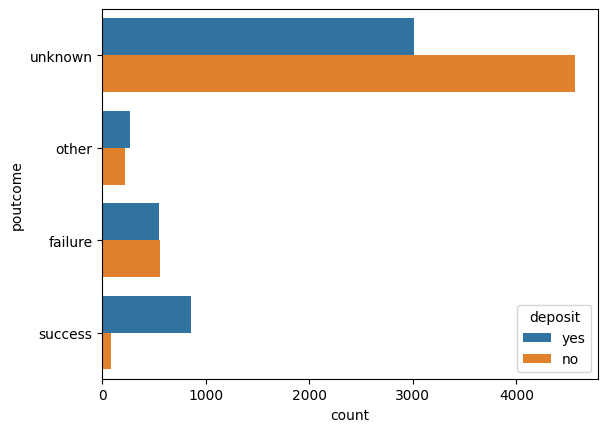

In [23]:
# –£–∑–Ω–∞–π—Ç–µ, –¥–ª—è –∫–∞–∫–æ–≥–æ —Å—Ç–∞—Ç—É—Å–∞ –ø—Ä–µ–¥—ã–¥—É—â–µ–π –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤–æ–π –∫–∞–º–ø–∞–Ω–∏–∏ —É—Å–ø–µ—Ö –≤ —Ç–µ–∫—É—â–µ–π –ø—Ä–µ–≤–∞–ª–∏—Ä—É–µ—Ç –Ω–∞–¥ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –Ω–µ—É–¥–∞—á.
sns.countplot(y='poutcome', hue='deposit', data=df)

### –ó–∞–¥–∞–Ω–∏–µ 7

<Axes: xlabel='count', ylabel='month'>

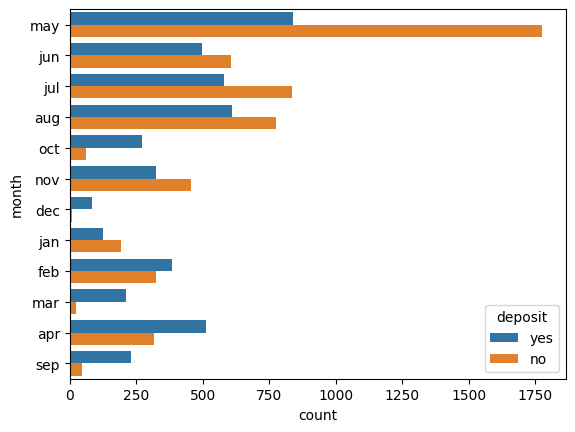

In [21]:
# —É–∑–Ω–∞–π—Ç–µ, –≤ –∫–∞–∫–æ–º –º–µ—Å—è—Ü–µ —á–∞—â–µ –≤—Å–µ–≥–æ –æ—Ç–∫–∞–∑—ã–≤–∞–ª–∏—Å—å –æ—Ç –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è –æ—Ç–∫—Ä—ã—Ç—å –¥–µ–ø–æ–∑–∏—Ç
sns.countplot(y='month', hue='deposit', data=df)

### –ó–∞–¥–∞–Ω–∏–µ 8

<Axes: xlabel='age_group', ylabel='count'>

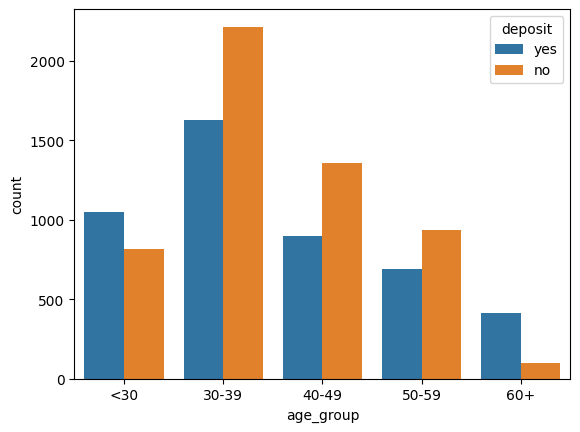

In [15]:
# —Å–æ–∑–¥–∞–π—Ç–µ –≤–æ–∑—Ä–∞—Å—Ç–Ω—ã–µ –≥—Ä—É–ø–ø—ã –∏ –æ–ø—Ä–µ–¥–µ–ª–∏—Ç–µ, –≤ –∫–∞–∫–∏—Ö –≥—Ä—É–ø–ø–∞—Ö –±–æ–ª–µ–µ —Å–∫–ª–æ–Ω–Ω—ã –æ—Ç–∫—Ä—ã–≤–∞—Ç—å –¥–µ–ø–æ–∑–∏—Ç, —á–µ–º –æ—Ç–∫–∞–∑—ã–≤–∞—Ç—å—Å—è –æ—Ç –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è
df['age_group'] = pd.cut(df.age, [0,30,40,50,60,9999], labels = ['<30','30-39','40-49','50-59','60+'])
sns.countplot(x='age_group', hue='deposit', data=df)

### –ó–∞–¥–∞–Ω–∏—è 9 –∏ 10

<Axes: xlabel='count', ylabel='marital'>

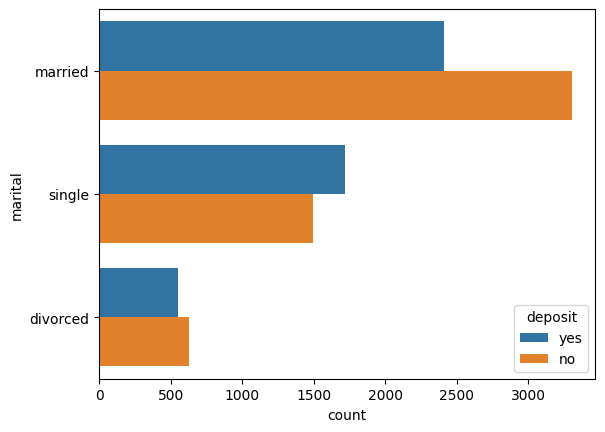

In [ ]:
# –ø–æ—Å—Ç—Ä–æ–π—Ç–µ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –¥–ª—è –æ—Ç–∫—Ä—ã–≤—à–∏—Ö –∏ –Ω–µ–æ—Ç–∫—Ä—ã–≤—à–∏—Ö –¥–µ–ø–æ–∑–∏—Ç –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —Å–µ–º–µ–π–Ω–æ–≥–æ —Å—Ç–∞—Ç—É—Å–∞
sns.countplot(y='marital', hue='deposit', data=df)

<Axes: xlabel='count', ylabel='education'>

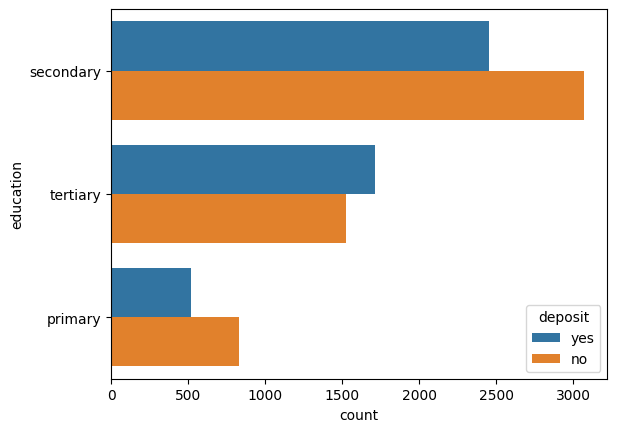

In [19]:
# –ø–æ—Å—Ç—Ä–æ–π—Ç–µ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –¥–ª—è –æ—Ç–∫—Ä—ã–≤—à–∏—Ö –∏ –Ω–µ–æ—Ç–∫—Ä—ã–≤—à–∏—Ö –¥–µ–ø–æ–∑–∏—Ç –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è
sns.countplot(y='education', hue='deposit', data=df)

<Axes: xlabel='count', ylabel='job'>

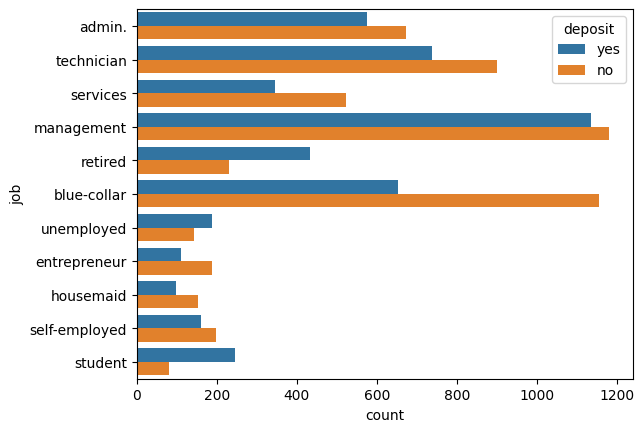

In [20]:
# –ø–æ—Å—Ç—Ä–æ–π—Ç–µ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –¥–ª—è –æ—Ç–∫—Ä—ã–≤—à–∏—Ö –∏ –Ω–µ–æ—Ç–∫—Ä—ã–≤—à–∏—Ö –¥–µ–ø–æ–∑–∏—Ç –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –≤–∏–¥–∞ –ø—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª—å–Ω–æ–π –∑–∞–Ω—è—Ç–æ—Å—Ç–∏
sns.countplot(y='job', hue='deposit', data=df)

### –ó–∞–¥–∞–Ω–∏–µ 11

–ê–ù–ê–õ–ò–ó –ü–ï–†–ï–°–ï–ß–ï–ù–ò–ô –û–ë–†–ê–ó–û–í–ê–ù–ò–Ø –ò –°–ï–ú–ï–ô–ù–û–ì–û –°–¢–ê–¢–£–°–ê
(—Å—Ä–µ–¥–∏ –∫–ª–∏–µ–Ω—Ç–æ–≤, –æ—Ç–∫—Ä—ã–≤—à–∏—Ö –¥–µ–ø–æ–∑–∏—Ç)
üìä –û–±—â–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è:
   ‚Ä¢ –í—Å–µ–≥–æ –∫–ª–∏–µ–Ω—Ç–æ–≤ –≤ –¥–∞–Ω–Ω—ã—Ö: 10105
   ‚Ä¢ –ö–ª–∏–µ–Ω—Ç–æ–≤, –æ—Ç–∫—Ä—ã–≤—à–∏—Ö –¥–µ–ø–æ–∑–∏—Ç: 4681
   ‚Ä¢ –î–æ–ª—è –æ—Ç–∫—Ä—ã–≤—à–∏—Ö –¥–µ–ø–æ–∑–∏—Ç: 46.32%

üìà –°–í–û–î–ù–ê–Ø –¢–ê–ë–õ–ò–¶–ê: –û–ë–†–ê–ó–û–í–ê–ù–ò–ï √ó –°–ï–ú–ï–ô–ù–´–ô –°–¢–ê–¢–£–°
(–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤, –æ—Ç–∫—Ä—ã–≤—à–∏—Ö –¥–µ–ø–æ–∑–∏—Ç)
-----------------------------------------------------------------
marital    divorced  married  single   All
education                                 
primary          96      339      82   517
secondary       283     1289     879  2451
tertiary        174      784     755  1713
All             553     2412    1716  4681

üìä –ü–†–û–¶–ï–ù–¢–ù–û–ï –†–ê–°–ü–†–ï–î–ï–õ–ï–ù–ò–ï
(% –æ—Ç –æ–±—â–µ–≥–æ —á–∏—Å–ª–∞ –æ—Ç–∫—Ä—ã–≤—à–∏—Ö –¥–µ–ø–æ–∑–∏—Ç)
-------

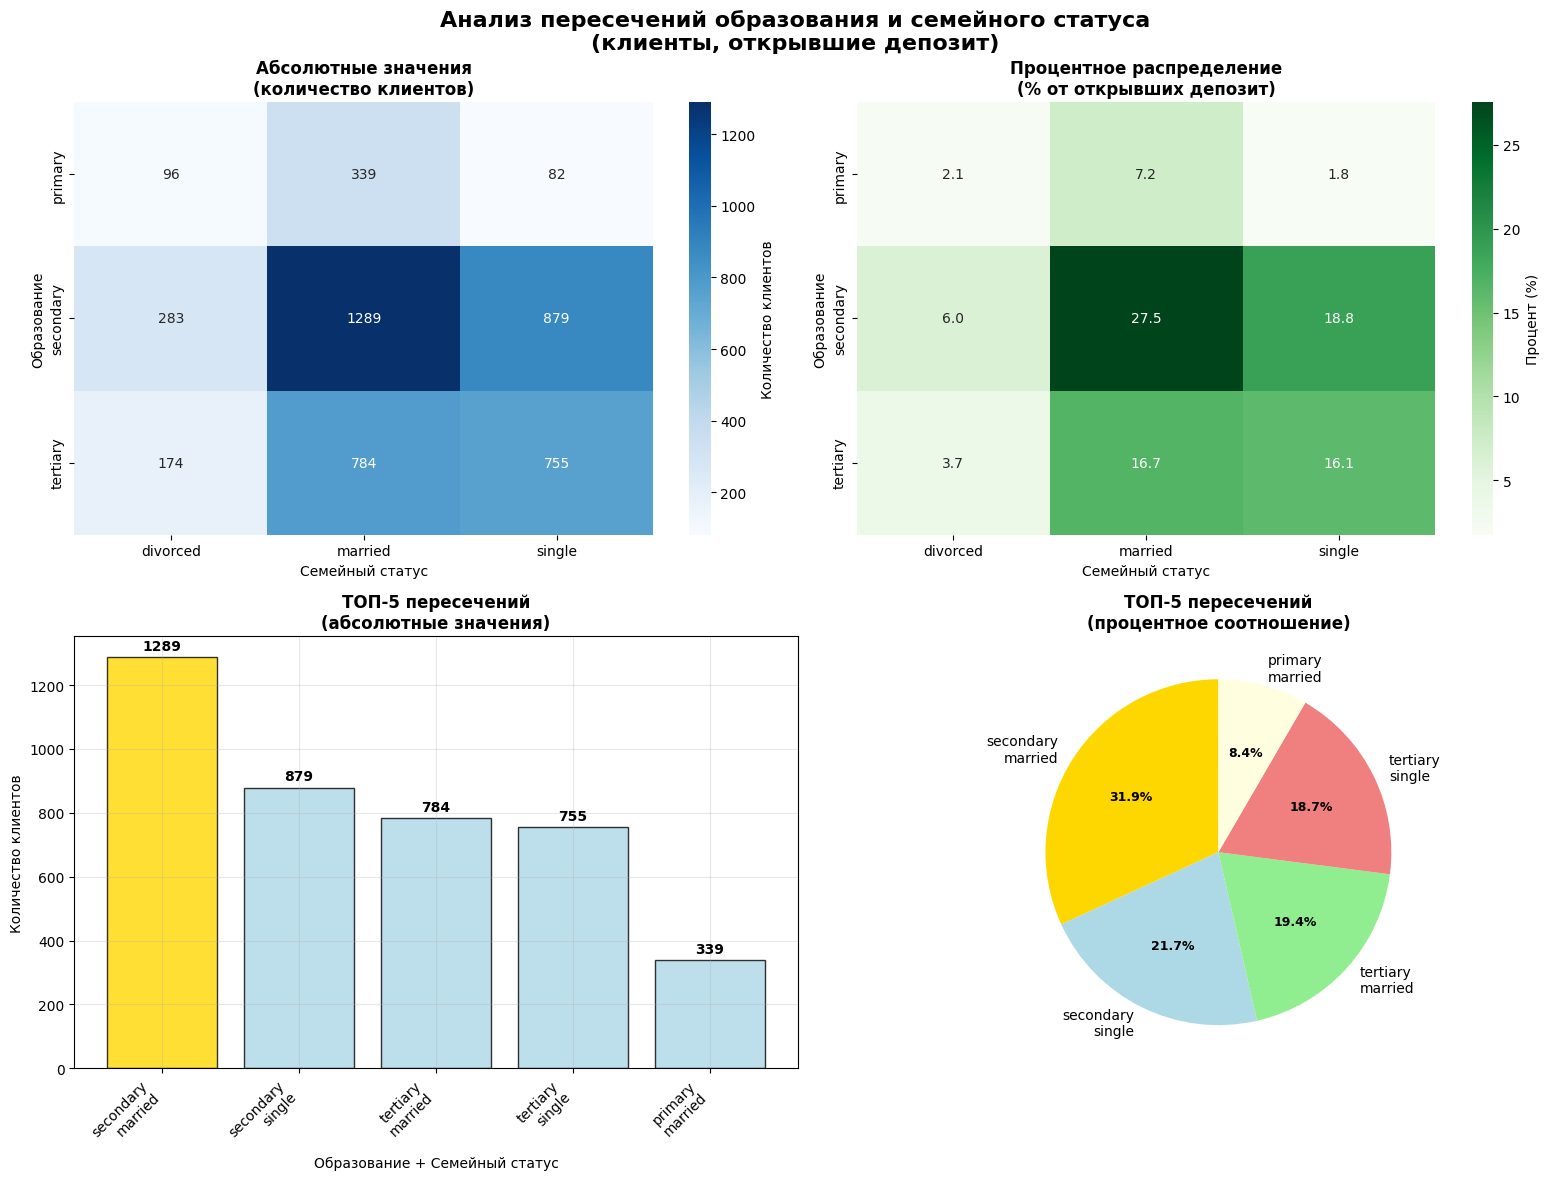

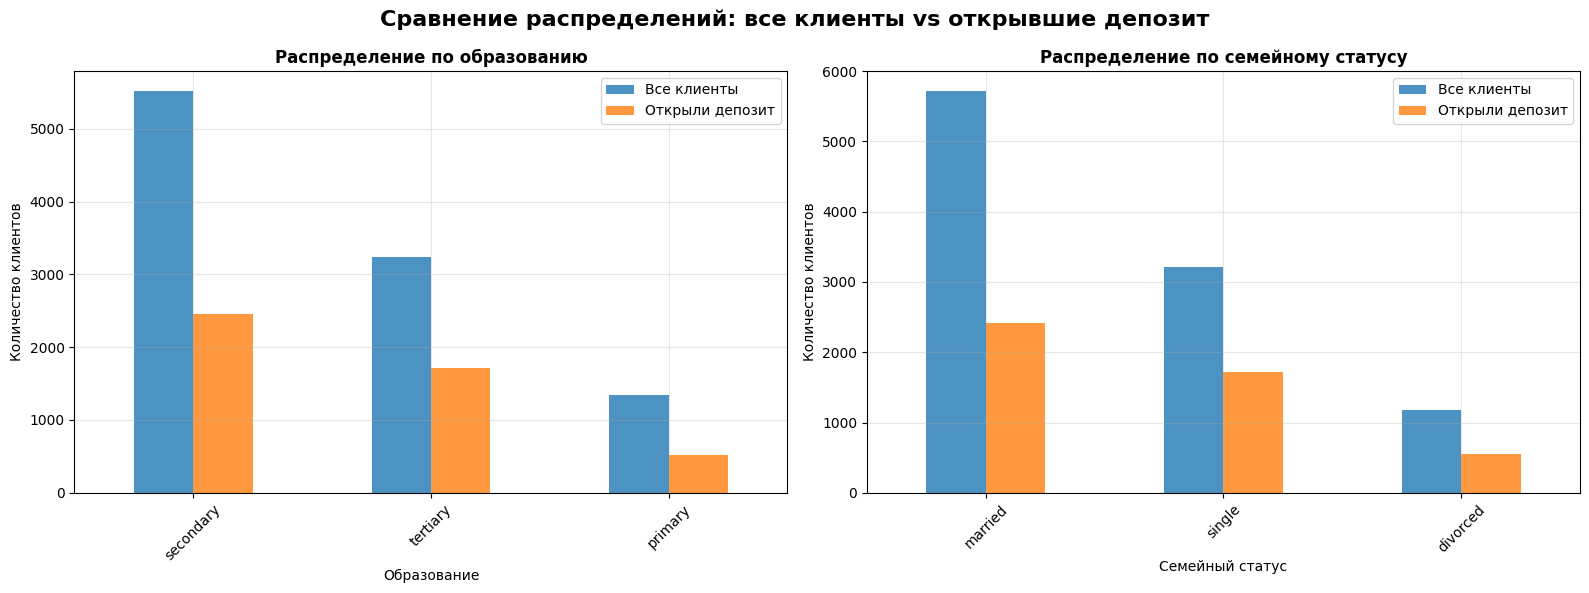

üìä –°–¢–ê–¢–ò–°–¢–ò–ß–ï–°–ö–ò–ô –ê–ù–ê–õ–ò–ó:
----------------------------------------
–•–∏-–∫–≤–∞–¥—Ä–∞—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: 142.5737
P-–∑–Ω–∞—á–µ–Ω–∏–µ: 0.000000
–°—Ç–µ–ø–µ–Ω–∏ —Å–≤–æ–±–æ–¥—ã: 4
‚úÖ –°–≤—è–∑—å –º–µ–∂–¥—É –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ–º –∏ —Å–µ–º–µ–π–Ω—ã–º —Å—Ç–∞—Ç—É—Å–æ–º —Å—Ä–µ–¥–∏ –æ—Ç–∫—Ä—ã–≤—à–∏—Ö –¥–µ–ø–æ–∑–∏—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–∞

üí° –ë–ò–ó–ù–ï–°-–í–´–í–û–î–´ –ò –†–ï–ö–û–ú–ï–ù–î–ê–¶–ò–ò:
---------------------------------------------
üéØ –¶–µ–ª–µ–≤–∞—è –≥—Ä—É–ø–ø–∞ ‚Ññ1: secondary –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ + married
   ‚Ä¢ –†–∞–∑–º–µ—Ä —Å–µ–≥–º–µ–Ω—Ç–∞: 1289 –∫–ª–∏–µ–Ω—Ç–æ–≤ (27.5% –æ—Ç —É—Å–ø–µ—à–Ω—ã—Ö)
   ‚Ä¢ –†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏—è: –ü—Ä–∏–æ—Ä–∏—Ç–µ—Ç–Ω—ã–π —Ñ–æ–∫—É—Å –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤—ã—Ö –∫–∞–º–ø–∞–Ω–∏–π

üìà –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –ø—Ä–∏–æ—Ä–∏—Ç–µ—Ç–Ω—ã–µ —Å–µ–≥–º–µ–Ω—Ç—ã:
   2. secondary + single: 879 —á–µ–ª. (18.8%)
   3. tertiary + married: 784 —á–µ–ª. (16.7%)

üìä –ö–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ü–∏—è –¢–û–ü-3 —Å–µ–≥–º–µ–Ω—Ç–æ–≤: 6

In [39]:
# –ø–æ—Å—Ç—Ä–æ–π—Ç–µ —Å–≤–æ–¥–Ω—É—é —Ç–∞–±–ª–∏—Ü—É, —á—Ç–æ–±—ã –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å –ª—é–¥–∏ —Å –∫–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ–º –∏ —Å–µ–º–µ–π–Ω—ã–º —Å—Ç–∞—Ç—É—Å–æ–º –Ω–∞–∏–±–æ–ª–µ–µ –º–Ω–æ–≥–æ—á–∏—Å–ª–µ–Ω–Ω—ã
#(–µ—Å–ª–∏ —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—Ç—å —Ç–µ—Ö, –∫—Ç–æ –æ—Ç–∫—Ä—ã–ª –¥–µ–ø–æ–∑–∏—Ç)

# –ü—Ä–æ–≤–µ—Ä—è–µ–º –Ω–∞–ª–∏—á–∏–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
if all(col in df.columns for col in ['education', 'marital', 'deposit']):
    
    print("–ê–ù–ê–õ–ò–ó –ü–ï–†–ï–°–ï–ß–ï–ù–ò–ô –û–ë–†–ê–ó–û–í–ê–ù–ò–Ø –ò –°–ï–ú–ï–ô–ù–û–ì–û –°–¢–ê–¢–£–°–ê")
    print("(—Å—Ä–µ–¥–∏ –∫–ª–∏–µ–Ω—Ç–æ–≤, –æ—Ç–∫—Ä—ã–≤—à–∏—Ö –¥–µ–ø–æ–∑–∏—Ç)")
    print("=" * 65)
    
    # –§–∏–ª—å—Ç—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ - —Ç–æ–ª—å–∫–æ —Ç–µ, –∫—Ç–æ –æ—Ç–∫—Ä—ã–ª –¥–µ–ø–æ–∑–∏—Ç
    deposit_clients = df[df['deposit'] == 'yes'].copy()
    
    print(f"üìä –û–±—â–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è:")
    print(f"   ‚Ä¢ –í—Å–µ–≥–æ –∫–ª–∏–µ–Ω—Ç–æ–≤ –≤ –¥–∞–Ω–Ω—ã—Ö: {len(df)}")
    print(f"   ‚Ä¢ –ö–ª–∏–µ–Ω—Ç–æ–≤, –æ—Ç–∫—Ä—ã–≤—à–∏—Ö –¥–µ–ø–æ–∑–∏—Ç: {len(deposit_clients)}")
    print(f"   ‚Ä¢ –î–æ–ª—è –æ—Ç–∫—Ä—ã–≤—à–∏—Ö –¥–µ–ø–æ–∑–∏—Ç: {len(deposit_clients)/len(df)*100:.2f}%")
    print()
    
    # –°–æ–∑–¥–∞–µ–º —Å–≤–æ–¥–Ω—É—é —Ç–∞–±–ª–∏—Ü—É (–∫—Ä–æ—Å—Å-—Ç–∞–±—É–ª—è—Ü–∏—é)
    pivot_table = pd.crosstab(deposit_clients['education'], 
                             deposit_clients['marital'], 
                             margins=True)
    
    print("üìà –°–í–û–î–ù–ê–Ø –¢–ê–ë–õ–ò–¶–ê: –û–ë–†–ê–ó–û–í–ê–ù–ò–ï √ó –°–ï–ú–ï–ô–ù–´–ô –°–¢–ê–¢–£–°")
    print("(–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤, –æ—Ç–∫—Ä—ã–≤—à–∏—Ö –¥–µ–ø–æ–∑–∏—Ç)")
    print("-" * 65)
    print(pivot_table)
    print()
    
    # –ü—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ
    pivot_table_pct = pd.crosstab(deposit_clients['education'], 
                                 deposit_clients['marital'], 
                                 normalize='all') * 100
    
    print("üìä –ü–†–û–¶–ï–ù–¢–ù–û–ï –†–ê–°–ü–†–ï–î–ï–õ–ï–ù–ò–ï")
    print("(% –æ—Ç –æ–±—â–µ–≥–æ —á–∏—Å–ª–∞ –æ—Ç–∫—Ä—ã–≤—à–∏—Ö –¥–µ–ø–æ–∑–∏—Ç)")
    print("-" * 45)
    print(pivot_table_pct.round(2))
    print()
    
    # –ù–∞—Ö–æ–¥–∏–º —Å–∞–º–æ–µ –º–Ω–æ–≥–æ—á–∏—Å–ª–µ–Ω–Ω–æ–µ –ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏–µ
    # –ò—Å–∫–ª—é—á–∞–µ–º —Å—Ç—Ä–æ–∫—É –∏ —Å—Ç–æ–ª–±–µ—Ü —Å –∏—Ç–æ–≥–∞–º–∏
    pivot_no_margins = pd.crosstab(deposit_clients['education'], deposit_clients['marital'])
    
    # –ù–∞—Ö–æ–¥–∏–º –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –∏ –µ–≥–æ –ø–æ–∑–∏—Ü–∏—é
    max_value = pivot_no_margins.max().max()
    max_position = pivot_no_margins.stack().idxmax()
    max_education, max_marital = max_position
    
    print("üéØ –°–ê–ú–û–ï –ú–ù–û–ì–û–ß–ò–°–õ–ï–ù–ù–û–ï –ü–ï–†–ï–°–ï–ß–ï–ù–ò–ï:")
    print("-" * 45)
    print(f"‚úÖ –û–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ: {max_education}")
    print(f"‚úÖ –°–µ–º–µ–π–Ω—ã–π —Å—Ç–∞—Ç—É—Å: {max_marital}")
    print(f"‚úÖ –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤: {max_value}")
    print(f"‚úÖ –î–æ–ª—è –æ—Ç –æ—Ç–∫—Ä—ã–≤—à–∏—Ö –¥–µ–ø–æ–∑–∏—Ç: {max_value/len(deposit_clients)*100:.2f}%")
    print(f"‚úÖ –î–æ–ª—è –æ—Ç –≤—Å–µ—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤: {max_value/len(df)*100:.2f}%")
    print()
    
    # –¢–û–ü-5 –ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏–π
    print("üèÜ –¢–û–ü-5 –°–ê–ú–´–• –ú–ù–û–ì–û–ß–ò–°–õ–ï–ù–ù–´–• –ü–ï–†–ï–°–ï–ß–ï–ù–ò–ô:")
    print("-" * 50)
    
    # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤ Series –¥–ª—è —Å–æ—Ä—Ç–∏—Ä–æ–≤–∫–∏
    combinations = pivot_no_margins.stack().sort_values(ascending=False)
    
    for i, ((education, marital), count) in enumerate(combinations.head().items(), 1):
        percentage = count / len(deposit_clients) * 100
        print(f"{i}. {education} + {marital}: {count} —á–µ–ª. ({percentage:.2f}%)")
    
    print()
    
    # –î–µ—Ç–∞–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑ —Å–∞–º–æ–≥–æ –º–Ω–æ–≥–æ—á–∏—Å–ª–µ–Ω–Ω–æ–≥–æ –ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏—è
    print("üîç –î–ï–¢–ê–õ–¨–ù–´–ô –ê–ù–ê–õ–ò–ó –°–ê–ú–û–ì–û –ú–ù–û–ì–û–ß–ò–°–õ–ï–ù–ù–û–ì–û –ü–ï–†–ï–°–ï–ß–ï–ù–ò–Ø:")
    print("-" * 60)
    
    # –§–∏–ª—å—Ç—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ –¥–ª—è —Å–∞–º–æ–≥–æ –º–Ω–æ–≥–æ—á–∏—Å–ª–µ–Ω–Ω–æ–≥–æ –ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏—è
    target_group = df[(df['education'] == max_education) & (df['marital'] == max_marital)]
    target_group_deposits = target_group[target_group['deposit'] == 'yes']
    
    print(f"üìã –ì—Ä—É–ø–ø–∞: {max_education} –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ + {max_marital}")
    print(f"   ‚Ä¢ –í—Å–µ–≥–æ –∫–ª–∏–µ–Ω—Ç–æ–≤ –≤ —ç—Ç–æ–π –≥—Ä—É–ø–ø–µ: {len(target_group)}")
    print(f"   ‚Ä¢ –û—Ç–∫—Ä—ã–ª–∏ –¥–µ–ø–æ–∑–∏—Ç: {len(target_group_deposits)}")
    print(f"   ‚Ä¢ –ù–µ –æ—Ç–∫—Ä—ã–ª–∏ –¥–µ–ø–æ–∑–∏—Ç: {len(target_group) - len(target_group_deposits)}")
    print(f"   ‚Ä¢ –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –æ—Ç–∫—Ä—ã—Ç–∏—è –¥–µ–ø–æ–∑–∏—Ç–æ–≤ –≤ –≥—Ä—É–ø–ø–µ: {len(target_group_deposits)/len(target_group)*100:.2f}%")
    print()
    
    # –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ —Ü–µ–ª–µ–≤–æ–π –≥—Ä—É–ø–ø–µ
    if len(target_group) > 0:
        print("üìä –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ —Ü–µ–ª–µ–≤–æ–π –≥—Ä—É–ø–ø—ã:")
        
        # –°—Ä–µ–¥–Ω–∏–π –≤–æ–∑—Ä–∞—Å—Ç
        if 'age' in target_group.columns:
            avg_age = target_group['age'].mean()
            print(f"   ‚Ä¢ –°—Ä–µ–¥–Ω–∏–π –≤–æ–∑—Ä–∞—Å—Ç: {avg_age:.1f} –ª–µ—Ç")
        
        # –ù–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç—ã–µ –ø—Ä–æ—Ñ–µ—Å—Å–∏–∏
        if 'job' in target_group.columns:
            top_jobs = target_group['job'].value_counts().head(3)
            print(f"   ‚Ä¢ –¢–û–ü-3 –ø—Ä–æ—Ñ–µ—Å—Å–∏–∏:")
            for job, count in top_jobs.items():
                percentage = count / len(target_group) * 100
                print(f"     - {job}: {count} —á–µ–ª. ({percentage:.1f}%)")
        
        print()
    
    # –°–æ–∑–¥–∞–µ–º –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('–ê–Ω–∞–ª–∏–∑ –ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏–π –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –∏ —Å–µ–º–µ–π–Ω–æ–≥–æ —Å—Ç–∞—Ç—É—Å–∞\n(–∫–ª–∏–µ–Ω—Ç—ã, –æ—Ç–∫—Ä—ã–≤—à–∏–µ –¥–µ–ø–æ–∑–∏—Ç)', 
                 fontsize=16, fontweight='bold')
    
    # 1. –¢–µ–ø–ª–æ–≤–∞—è –∫–∞—Ä—Ç–∞ —Å–≤–æ–¥–Ω–æ–π —Ç–∞–±–ª–∏—Ü—ã (–∞–±—Å–æ–ª—é—Ç–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è)
    sns.heatmap(pivot_no_margins, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0],
                cbar_kws={'label': '–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤'})
    axes[0, 0].set_title('–ê–±—Å–æ–ª—é—Ç–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è\n(–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤)', fontweight='bold', fontsize=12)
    axes[0, 0].set_xlabel('–°–µ–º–µ–π–Ω—ã–π —Å—Ç–∞—Ç—É—Å')
    axes[0, 0].set_ylabel('–û–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ')
    
    # 2. –¢–µ–ø–ª–æ–≤–∞—è –∫–∞—Ä—Ç–∞ –ø—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è
    sns.heatmap(pivot_table_pct, annot=True, fmt='.1f', cmap='Greens', ax=axes[0, 1],
                cbar_kws={'label': '–ü—Ä–æ—Ü–µ–Ω—Ç (%)'})
    axes[0, 1].set_title('–ü—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ\n(% –æ—Ç –æ—Ç–∫—Ä—ã–≤—à–∏—Ö –¥–µ–ø–æ–∑–∏—Ç)', fontweight='bold', fontsize=12)
    axes[0, 1].set_xlabel('–°–µ–º–µ–π–Ω—ã–π —Å—Ç–∞—Ç—É—Å')
    axes[0, 1].set_ylabel('–û–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ')
    
    # 3. –°—Ç–æ–ª–±—á–∞—Ç–∞—è –¥–∏–∞–≥—Ä–∞–º–º–∞ –¢–û–ü-5 –ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏–π
    top_5_combinations = combinations.head()
    labels = [f"{edu}\n{mar}" for (edu, mar) in top_5_combinations.index]
    values = top_5_combinations.values
    
    colors = ['gold' if i == 0 else 'lightblue' for i in range(len(values))]
    bars = axes[1, 0].bar(range(len(values)), values, color=colors, alpha=0.8, edgecolor='black')
    
    axes[1, 0].set_title('–¢–û–ü-5 –ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏–π\n(–∞–±—Å–æ–ª—é—Ç–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è)', fontweight='bold', fontsize=12)
    axes[1, 0].set_xlabel('–û–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ + –°–µ–º–µ–π–Ω—ã–π —Å—Ç–∞—Ç—É—Å')
    axes[1, 0].set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤')
    axes[1, 0].set_xticks(range(len(values)))
    axes[1, 0].set_xticklabels(labels, rotation=45, ha='right')
    axes[1, 0].grid(True, alpha=0.3)
    
    # –î–æ–±–∞–≤–ª—è–µ–º –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ —Å—Ç–æ–ª–±—Ü—ã
    for bar, value in zip(bars, values):
        height = bar.get_height()
        axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + max(values)*0.01,
                       f'{value}', ha='center', va='bottom', fontweight='bold')
    
    # 4. –ö—Ä—É–≥–æ–≤–∞—è –¥–∏–∞–≥—Ä–∞–º–º–∞ –¢–û–ü-5 –ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏–π
    colors_pie = ['gold', 'lightblue', 'lightgreen', 'lightcoral', 'lightyellow']
    
    wedges, texts, autotexts = axes[1, 1].pie(values, 
                                             labels=[f"{edu}\n{mar}" for (edu, mar) in top_5_combinations.index],
                                             autopct='%1.1f%%',
                                             colors=colors_pie[:len(values)],
                                             startangle=90)
    
    axes[1, 1].set_title('–¢–û–ü-5 –ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏–π\n(–ø—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ)', fontweight='bold', fontsize=12)
    
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(9)
    
    plt.tight_layout()
    plt.show()
    
    # –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–∞—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è - —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ —Å –æ–±—â–∏–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π: –≤—Å–µ –∫–ª–∏–µ–Ω—Ç—ã vs –æ—Ç–∫—Ä—ã–≤—à–∏–µ –¥–µ–ø–æ–∑–∏—Ç', 
                 fontsize=16, fontweight='bold')
    
    # –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—é
    education_all = df['education'].value_counts()
    education_deposit = deposit_clients['education'].value_counts()
    
    comparison_education = pd.DataFrame({
        '–í—Å–µ –∫–ª–∏–µ–Ω—Ç—ã': education_all,
        '–û—Ç–∫—Ä—ã–ª–∏ –¥–µ–ø–æ–∑–∏—Ç': education_deposit
    }).fillna(0)
    
    comparison_education.plot(kind='bar', ax=axes[0], alpha=0.8)
    axes[0].set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—é', fontweight='bold', fontsize=12)
    axes[0].set_xlabel('–û–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ')
    axes[0].set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤')
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ —Å–µ–º–µ–π–Ω–æ–º—É —Å—Ç–∞—Ç—É—Å—É
    marital_all = df['marital'].value_counts()
    marital_deposit = deposit_clients['marital'].value_counts()
    
    comparison_marital = pd.DataFrame({
        '–í—Å–µ –∫–ª–∏–µ–Ω—Ç—ã': marital_all,
        '–û—Ç–∫—Ä—ã–ª–∏ –¥–µ–ø–æ–∑–∏—Ç': marital_deposit
    }).fillna(0)
    
    comparison_marital.plot(kind='bar', ax=axes[1], alpha=0.8)
    axes[1].set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ —Å–µ–º–µ–π–Ω–æ–º—É —Å—Ç–∞—Ç—É—Å—É', fontweight='bold', fontsize=12)
    axes[1].set_xlabel('–°–µ–º–µ–π–Ω—ã–π —Å—Ç–∞—Ç—É—Å')
    axes[1].set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # –°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑
    from scipy.stats import chi2_contingency
    
    chi2, p_value, dof, expected = chi2_contingency(pivot_no_margins)
    
    print("üìä –°–¢–ê–¢–ò–°–¢–ò–ß–ï–°–ö–ò–ô –ê–ù–ê–õ–ò–ó:")
    print("-" * 40)
    print(f"–•–∏-–∫–≤–∞–¥—Ä–∞—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: {chi2:.4f}")
    print(f"P-–∑–Ω–∞—á–µ–Ω–∏–µ: {p_value:.6f}")
    print(f"–°—Ç–µ–ø–µ–Ω–∏ —Å–≤–æ–±–æ–¥—ã: {dof}")
    
    if p_value < 0.05:
        print("‚úÖ –°–≤—è–∑—å –º–µ–∂–¥—É –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ–º –∏ —Å–µ–º–µ–π–Ω—ã–º —Å—Ç–∞—Ç—É—Å–æ–º —Å—Ä–µ–¥–∏ –æ—Ç–∫—Ä—ã–≤—à–∏—Ö –¥–µ–ø–æ–∑–∏—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–∞")
    else:
        print("‚ùå –°–≤—è–∑—å –º–µ–∂–¥—É –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ–º –∏ —Å–µ–º–µ–π–Ω—ã–º —Å—Ç–∞—Ç—É—Å–æ–º —Å—Ä–µ–¥–∏ –æ—Ç–∫—Ä—ã–≤—à–∏—Ö –¥–µ–ø–æ–∑–∏—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –ù–ï –∑–Ω–∞—á–∏–º–∞")
    
    print()
    
    # –ë–∏–∑–Ω–µ—Å-–≤—ã–≤–æ–¥—ã
    print("üí° –ë–ò–ó–ù–ï–°-–í–´–í–û–î–´ –ò –†–ï–ö–û–ú–ï–ù–î–ê–¶–ò–ò:")
    print("-" * 45)
    print(f"üéØ –¶–µ–ª–µ–≤–∞—è –≥—Ä—É–ø–ø–∞ ‚Ññ1: {max_education} –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ + {max_marital}")
    print(f"   ‚Ä¢ –†–∞–∑–º–µ—Ä —Å–µ–≥–º–µ–Ω—Ç–∞: {max_value} –∫–ª–∏–µ–Ω—Ç–æ–≤ ({max_value/len(deposit_clients)*100:.1f}% –æ—Ç —É—Å–ø–µ—à–Ω—ã—Ö)")
    print(f"   ‚Ä¢ –†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏—è: –ü—Ä–∏–æ—Ä–∏—Ç–µ—Ç–Ω—ã–π —Ñ–æ–∫—É—Å –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤—ã—Ö –∫–∞–º–ø–∞–Ω–∏–π")
    
    # –¢–û–ü-3 –¥–ª—è –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–≥–æ —Ñ–æ–∫—É—Å–∞
    print(f"\nüìà –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –ø—Ä–∏–æ—Ä–∏—Ç–µ—Ç–Ω—ã–µ —Å–µ–≥–º–µ–Ω—Ç—ã:")
    for i, ((education, marital), count) in enumerate(combinations.head(3).items(), 1):
        if i == 1:  # –ü—Ä–æ–ø—É—Å–∫–∞–µ–º –ø–µ—Ä–≤—ã–π, —Ç–∞–∫ –∫–∞–∫ –æ–Ω —É–∂–µ –æ–ø–∏—Å–∞–Ω –≤—ã—à–µ
            continue
        percentage = count / len(deposit_clients) * 100
        print(f"   {i}. {education} + {marital}: {count} —á–µ–ª. ({percentage:.1f}%)")
    
    # –ê–Ω–∞–ª–∏–∑ –∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ü–∏–∏
    top_3_total = combinations.head(3).sum()
    concentration = top_3_total / len(deposit_clients) * 100
    print(f"\nüìä –ö–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ü–∏—è –¢–û–ü-3 —Å–µ–≥–º–µ–Ω—Ç–æ–≤: {concentration:.1f}% —É—Å–ø–µ—à–Ω—ã—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤")
    
    if concentration > 50:
        print("   ‚úÖ –í—ã—Å–æ–∫–∞—è –∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ü–∏—è - –º–æ–∂–Ω–æ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ —Ç–∞—Ä–≥–µ—Ç–∏—Ä–æ–≤–∞—Ç—å")
    else:
        print("   ‚ö†Ô∏è  –ù–∏–∑–∫–∞—è –∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ü–∏—è - –Ω—É–∂–Ω–∞ –±–æ–ª–µ–µ —à–∏—Ä–æ–∫–∞—è —Å—Ç—Ä–∞—Ç–µ–≥–∏—è")
    
    print()
    
    # –§–ò–ù–ê–õ–¨–ù–´–ô –û–¢–í–ï–¢
    print("üéØ –§–ò–ù–ê–õ–¨–ù–´–ô –û–¢–í–ï–¢:")
    print("=" * 40)
    print(f"–°–∞–º–æ–µ –º–Ω–æ–≥–æ—á–∏—Å–ª–µ–Ω–Ω–æ–µ –ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–π:")
    print(f"‚Ä¢ –û–ë–†–ê–ó–û–í–ê–ù–ò–ï: {max_education}")
    print(f"‚Ä¢ –°–ï–ú–ï–ô–ù–´–ô –°–¢–ê–¢–£–°: {max_marital}")
    print(f"‚Ä¢ –ö–û–õ–ò–ß–ï–°–¢–í–û –ö–õ–ò–ï–ù–¢–û–í: {max_value}")
    print("=" * 40)

else:
    print("‚ùå –ù–µ –Ω–∞–π–¥–µ–Ω—ã –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ: 'education', 'marital', 'deposit'")

print("\n" + "=" * 65)

## –ß–∞—Å—Ç—å 3: –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö

### –ó–∞–¥–∞–Ω–∏–µ 1

–û–ë–†–ê–ë–û–¢–ö–ê –ö–ê–¢–ï–ì–û–†–ò–ê–õ–¨–ù–û–ì–û –ü–û–†–Ø–î–ö–û–í–û–ì–û –ü–†–ò–ó–ù–ê–ö–ê 'EDUCATION'
üìä –ò—Å—Ö–æ–¥–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —É—Ä–æ–≤–Ω–µ–π –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è:
   secondary: 5517 (54.60%)
   tertiary: 3239 (32.05%)
   primary: 1349 (13.35%)

üìã –£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –¥–æ –æ–±—Ä–∞–±–æ—Ç–∫–∏:
   ['secondary', 'tertiary', 'primary']
   –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π: 3

‚úÖ LabelEncoder –ø—Ä–∏–º–µ–Ω–µ–Ω –∫ –ø—Ä–∏–∑–Ω–∞–∫—É 'education'

üîÑ –†–ï–ó–£–õ–¨–¢–ê–¢–´ –ö–û–î–ò–†–û–í–ê–ù–ò–Ø:
----------------------------------------
–°–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ: –∏—Å—Ö–æ–¥–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ ‚Üí –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ
   'primary' ‚Üí 0
   'secondary' ‚Üí 1
   'tertiary' ‚Üí 2

üìà –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π:
   0 ('primary'): 1349 (13.35%)
   1 ('secondary'): 5517 (54.60%)
   2 ('tertiary'): 3239 (32.05%)

üîç –ü–†–û–í–ï–†–ö–ê –ö–û–†–†–ï–ö–¢–ù–û–°–¢–ò

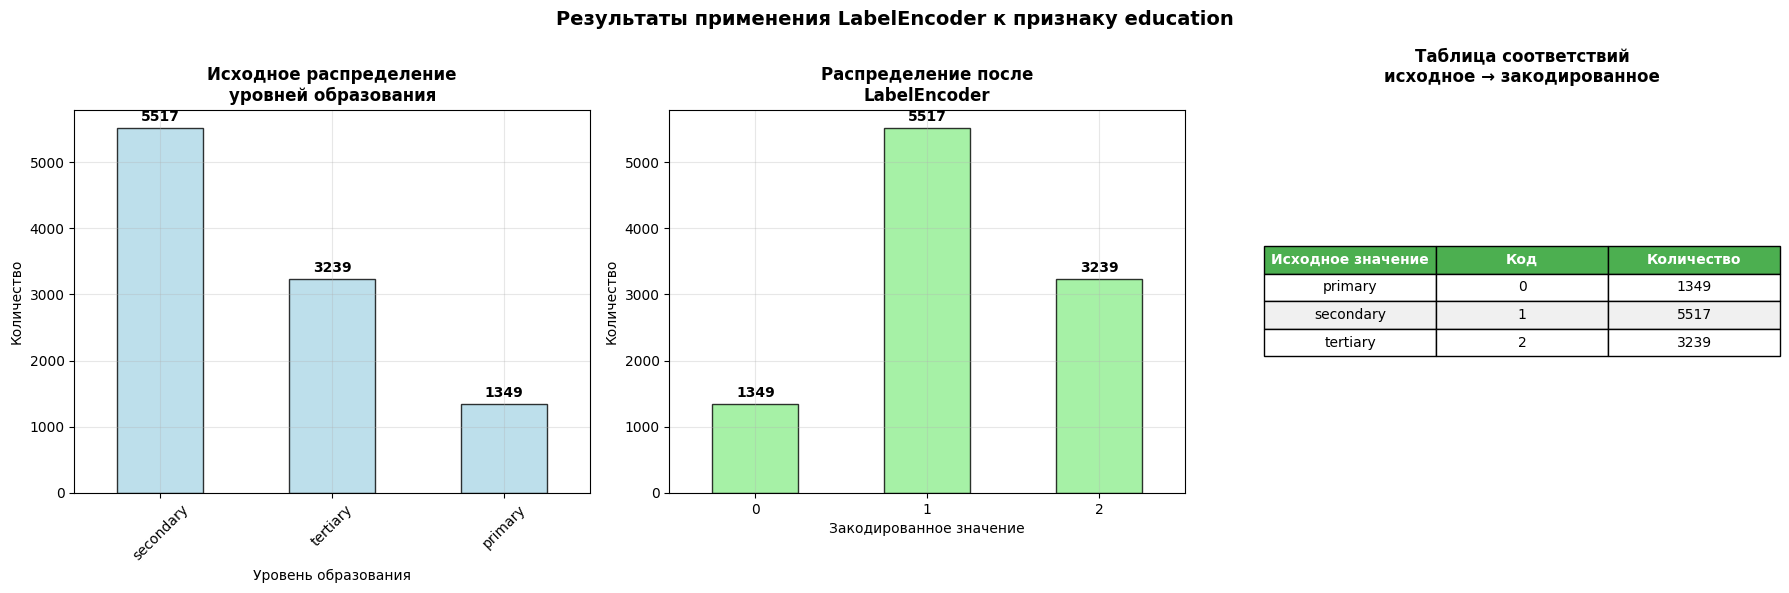

üí° –ò–ù–¢–ï–†–ü–†–ï–¢–ê–¶–ò–Ø –†–ï–ó–£–õ–¨–¢–ê–¢–û–í:
----------------------------------------
‚úÖ LabelEncoder —É—Å–ø–µ—à–Ω–æ –ø—Ä–∏–º–µ–Ω–µ–Ω –∫ –ø—Ä–∏–∑–Ω–∞–∫—É 'education'
‚úÖ –ö–∞–∂–¥–æ–º—É —É–Ω–∏–∫–∞–ª—å–Ω–æ–º—É —É—Ä–æ–≤–Ω—é –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –ø—Ä–∏—Å–≤–æ–µ–Ω —á–∏—Å–ª–æ–≤–æ–π –∫–æ–¥
‚úÖ –ö–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –≤—ã–ø–æ–ª–Ω–µ–Ω–æ –≤ –∞–ª—Ñ–∞–≤–∏—Ç–Ω–æ–º –ø–æ—Ä—è–¥–∫–µ (–ø–æ —É–º–æ–ª—á–∞–Ω–∏—é)
‚úÖ –í—Å–µ –∏—Å—Ö–æ–¥–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–Ω–æ–º –≤–∏–¥–µ
‚úÖ –ù–æ–≤—ã–π –ø—Ä–∏–∑–Ω–∞–∫ 'education_encoded' –≥–æ—Ç–æ–≤ –¥–ª—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –≤ ML-–º–æ–¥–µ–ª—è—Ö

‚ÑπÔ∏è  –ü–†–ò–ú–ï–ß–ê–ù–ò–ï:
   LabelEncoder –ø—Ä–∏—Å–≤–∞–∏–≤–∞–µ—Ç –∫–æ–¥—ã –≤ –∞–ª—Ñ–∞–≤–∏—Ç–Ω–æ–º –ø–æ—Ä—è–¥–∫–µ –∑–Ω–∞—á–µ–Ω–∏–π.
   –≠—Ç–æ –ù–ï –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –ø—Ä–∏—Å–≤–æ–µ–Ω–Ω—ã–µ —á–∏—Å–ª–∞ –æ—Ç—Ä–∞–∂–∞—é—Ç –ø–æ—Ä—è–¥–æ–∫ –≤–∞–∂–Ω–æ—Å—Ç–∏.
   –î–ª—è –ø–æ—Ä—è–¥–∫–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –º–æ–∂–µ—Ç –ø–æ—Ç—Ä–µ–±–æ–≤–∞—Ç—å—Å—è —Ä—É—á–Ω–æ–µ –ø–µ—Ä–µ–Ω

In [40]:
# –ø—Ä–µ–æ–±—Ä–∞–∑—É–π—Ç–µ —É—Ä–æ–≤–Ω–∏ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è

# –ü—Ä–æ–≤–µ—Ä—è–µ–º –∏—Å—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ
print("–û–ë–†–ê–ë–û–¢–ö–ê –ö–ê–¢–ï–ì–û–†–ò–ê–õ–¨–ù–û–ì–û –ü–û–†–Ø–î–ö–û–í–û–ì–û –ü–†–ò–ó–ù–ê–ö–ê 'EDUCATION'")
print("=" * 65)

if 'education' in df.columns:
    print("üìä –ò—Å—Ö–æ–¥–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —É—Ä–æ–≤–Ω–µ–π –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è:")
    education_counts = df['education'].value_counts()
    for education, count in education_counts.items():
        percentage = (count / len(df)) * 100
        print(f"   {education}: {count} ({percentage:.2f}%)")
    print()
    
    print("üìã –£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –¥–æ –æ–±—Ä–∞–±–æ—Ç–∫–∏:")
    unique_education = df['education'].unique()
    print(f"   {list(unique_education)}")
    print(f"   –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π: {len(unique_education)}")
    print()
    
    # –ü—Ä–∏–º–µ–Ω—è–µ–º LabelEncoder
    from sklearn.preprocessing import LabelEncoder
    
    # –°–æ–∑–¥–∞–µ–º —ç–∫–∑–µ–º–ø–ª—è—Ä LabelEncoder
    label_encoder = LabelEncoder()
    
    # –ü—Ä–∏–º–µ–Ω—è–µ–º LabelEncoder –∫ —Å—Ç–æ–ª–±—Ü—É education
    df['education_encoded'] = label_encoder.fit_transform(df['education'])
    
    print("‚úÖ LabelEncoder –ø—Ä–∏–º–µ–Ω–µ–Ω –∫ –ø—Ä–∏–∑–Ω–∞–∫—É 'education'")
    print()
    
    # –ü–æ–∫–∞–∑—ã–≤–∞–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è
    print("üîÑ –†–ï–ó–£–õ–¨–¢–ê–¢–´ –ö–û–î–ò–†–û–í–ê–ù–ò–Ø:")
    print("-" * 40)
    
    # –°–æ–∑–¥–∞–µ–º —Ç–∞–±–ª–∏—Ü—É —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–π
    mapping_dict = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print("–°–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ: –∏—Å—Ö–æ–¥–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ ‚Üí –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ")
    for original, encoded in sorted(mapping_dict.items(), key=lambda x: x[1]):
        print(f"   '{original}' ‚Üí {encoded}")
    print()
    
    # –ü—Ä–æ–≤–µ—Ä—è–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç
    print("üìà –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π:")
    encoded_counts = df['education_encoded'].value_counts().sort_index()
    for encoded_value, count in encoded_counts.items():
        original_value = label_encoder.inverse_transform([encoded_value])[0]
        percentage = (count / len(df)) * 100
        print(f"   {encoded_value} ('{original_value}'): {count} ({percentage:.2f}%)")
    print()
    
    # –ü—Ä–æ–≤–µ—Ä—è–µ–º –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ—Å—Ç—å –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è
    print("üîç –ü–†–û–í–ï–†–ö–ê –ö–û–†–†–ï–ö–¢–ù–û–°–¢–ò:")
    print("-" * 35)
    
    # –°—Ä–∞–≤–Ω–∏–≤–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –¥–æ –∏ –ø–æ—Å–ª–µ
    original_unique_count = len(df['education'].unique())
    encoded_unique_count = len(df['education_encoded'].unique())
    
    print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –¥–æ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è: {original_unique_count}")
    print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –ø–æ—Å–ª–µ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è: {encoded_unique_count}")
    
    if original_unique_count == encoded_unique_count:
        print("‚úÖ –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π —Å–æ—Ö—Ä–∞–Ω–∏–ª–æ—Å—å")
    else:
        print("‚ùå –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –∏–∑–º–µ–Ω–∏–ª–æ—Å—å!")
    
    # –ü—Ä–æ–≤–µ—Ä—è–µ–º –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤
    missing_original = df['education'].isnull().sum()
    missing_encoded = df['education_encoded'].isnull().sum()
    
    print(f"–ü—Ä–æ–ø—É—Å–∫–∏ –≤ –∏—Å—Ö–æ–¥–Ω–æ–º —Å—Ç–æ–ª–±—Ü–µ: {missing_original}")
    print(f"–ü—Ä–æ–ø—É—Å–∫–∏ –≤ –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–Ω–æ–º —Å—Ç–æ–ª–±—Ü–µ: {missing_encoded}")
    
    if missing_original == missing_encoded == 0:
        print("‚úÖ –ü—Ä–æ–ø—É—Å–∫–∏ –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—Ç –≤ –æ–±–æ–∏—Ö —Å—Ç–æ–ª–±—Ü–∞—Ö")
    elif missing_original == missing_encoded:
        print("‚úÖ –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ —Å–æ—Ö—Ä–∞–Ω–∏–ª–æ—Å—å")
    else:
        print("‚ùå –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –∏–∑–º–µ–Ω–∏–ª–æ—Å—å!")
    
    print()
    
    # –ü–æ–∫–∞–∑—ã–≤–∞–µ–º –ø–µ—Ä–≤—ã–µ –Ω–µ—Å–∫–æ–ª—å–∫–æ —Å—Ç—Ä–æ–∫ –¥–ª—è –Ω–∞–≥–ª—è–¥–Ω–æ—Å—Ç–∏
    print("üìã –ü–†–ò–ú–ï–† –ü–†–ï–û–ë–†–ê–ó–û–í–ê–ù–ò–Ø (–ø–µ—Ä–≤—ã–µ 10 —Å—Ç—Ä–æ–∫):")
    print("-" * 50)
    comparison_df = df[['education', 'education_encoded']].head(10)
    print(comparison_df.to_string(index=False))
    print()
    
    # –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ –Ω–æ–≤–æ–º—É —Å—Ç–æ–ª–±—Ü—É
    print("üìä –°–¢–ê–¢–ò–°–¢–ò–ö–ê –ó–ê–ö–û–î–ò–†–û–í–ê–ù–ù–û–ì–û –ü–†–ò–ó–ù–ê–ö–ê:")
    print("-" * 45)
    print(f"–ú–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ: {df['education_encoded'].min()}")
    print(f"–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ: {df['education_encoded'].max()}")
    print(f"–°—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ: {df['education_encoded'].mean():.2f}")
    print(f"–ú–µ–¥–∏–∞–Ω–∞: {df['education_encoded'].median():.1f}")
    print(f"–°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ: {df['education_encoded'].std():.2f}")
    print()
    
    # –ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –∫–ª–∞—Å—Å–∞—Ö LabelEncoder
    print("üè∑Ô∏è –ò–ù–§–û–†–ú–ê–¶–ò–Ø –û LABELENCODER:")
    print("-" * 35)
    print(f"–ö–ª–∞—Å—Å—ã (—É–ø–æ—Ä—è–¥–æ—á–µ–Ω—ã –ø–æ –∞–ª—Ñ–∞–≤–∏—Ç—É): {list(label_encoder.classes_)}")
    print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Å–æ–≤: {len(label_encoder.classes_)}")
    print()
    
    # –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø—Ä–∏–º–µ–Ω–µ–Ω–∏—è LabelEncoder –∫ –ø—Ä–∏–∑–Ω–∞–∫—É education', 
                 fontsize=14, fontweight='bold')
    
    # 1. –ò—Å—Ö–æ–¥–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ
    education_counts.plot(kind='bar', ax=axes[0], color='lightblue', alpha=0.8, edgecolor='black')
    axes[0].set_title('–ò—Å—Ö–æ–¥–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ\n—É—Ä–æ–≤–Ω–µ–π –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è', fontweight='bold')
    axes[0].set_xlabel('–£—Ä–æ–≤–µ–Ω—å –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è')
    axes[0].set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(True, alpha=0.3)
    
    # –î–æ–±–∞–≤–ª—è–µ–º –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ —Å—Ç–æ–ª–±—Ü—ã
    for i, v in enumerate(education_counts.values):
        axes[0].text(i, v + max(education_counts.values) * 0.01, str(v), 
                    ha='center', va='bottom', fontweight='bold')
    
    # 2. –ó–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ
    encoded_counts.plot(kind='bar', ax=axes[1], color='lightgreen', alpha=0.8, edgecolor='black')
    axes[1].set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ—Å–ª–µ\nLabelEncoder', fontweight='bold')
    axes[1].set_xlabel('–ó–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ')
    axes[1].set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
    axes[1].tick_params(axis='x', rotation=0)
    axes[1].grid(True, alpha=0.3)
    
    # –î–æ–±–∞–≤–ª—è–µ–º –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ —Å—Ç–æ–ª–±—Ü—ã
    for i, v in enumerate(encoded_counts.values):
        axes[1].text(i, v + max(encoded_counts.values) * 0.01, str(v), 
                    ha='center', va='bottom', fontweight='bold')
    
    # 3. –¢–∞–±–ª–∏—Ü–∞ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–π
    axes[2].axis('off')
    
    # –°–æ–∑–¥–∞–µ–º —Ç–∞–±–ª–∏—Ü—É —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–π –¥–ª—è –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è
    mapping_data = []
    for original, encoded in sorted(mapping_dict.items(), key=lambda x: x[1]):
        count = education_counts[original]
        mapping_data.append([original, encoded, count])
    
    table = axes[2].table(cellText=mapping_data,
                         colLabels=['–ò—Å—Ö–æ–¥–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ', '–ö–æ–¥', '–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ'],
                         cellLoc='center',
                         loc='center')
    
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2)
    
    # –°—Ç–∏–ª–∏–∑–∞—Ü–∏—è —Ç–∞–±–ª–∏—Ü—ã
    for i in range(len(mapping_data) + 1):
        for j in range(3):
            cell = table[(i, j)]
            if i == 0:  # –ó–∞–≥–æ–ª–æ–≤–æ–∫
                cell.set_facecolor('#4CAF50')
                cell.set_text_props(weight='bold', color='white')
            else:
                cell.set_facecolor('#f0f0f0' if i % 2 == 0 else 'white')
    
    axes[2].set_title('–¢–∞–±–ª–∏—Ü–∞ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–π\n–∏—Å—Ö–æ–¥–Ω–æ–µ ‚Üí –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ', 
                     fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.show()
    
    print("üí° –ò–ù–¢–ï–†–ü–†–ï–¢–ê–¶–ò–Ø –†–ï–ó–£–õ–¨–¢–ê–¢–û–í:")
    print("-" * 40)
    print("‚úÖ LabelEncoder —É—Å–ø–µ—à–Ω–æ –ø—Ä–∏–º–µ–Ω–µ–Ω –∫ –ø—Ä–∏–∑–Ω–∞–∫—É 'education'")
    print("‚úÖ –ö–∞–∂–¥–æ–º—É —É–Ω–∏–∫–∞–ª—å–Ω–æ–º—É —É—Ä–æ–≤–Ω—é –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –ø—Ä–∏—Å–≤–æ–µ–Ω —á–∏—Å–ª–æ–≤–æ–π –∫–æ–¥")
    print("‚úÖ –ö–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –≤—ã–ø–æ–ª–Ω–µ–Ω–æ –≤ –∞–ª—Ñ–∞–≤–∏—Ç–Ω–æ–º –ø–æ—Ä—è–¥–∫–µ (–ø–æ —É–º–æ–ª—á–∞–Ω–∏—é)")
    print("‚úÖ –í—Å–µ –∏—Å—Ö–æ–¥–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–Ω–æ–º –≤–∏–¥–µ")
    print("‚úÖ –ù–æ–≤—ã–π –ø—Ä–∏–∑–Ω–∞–∫ 'education_encoded' –≥–æ—Ç–æ–≤ –¥–ª—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –≤ ML-–º–æ–¥–µ–ª—è—Ö")
    print()
    
    print("‚ÑπÔ∏è  –ü–†–ò–ú–ï–ß–ê–ù–ò–ï:")
    print("   LabelEncoder –ø—Ä–∏—Å–≤–∞–∏–≤–∞–µ—Ç –∫–æ–¥—ã –≤ –∞–ª—Ñ–∞–≤–∏—Ç–Ω–æ–º –ø–æ—Ä—è–¥–∫–µ –∑–Ω–∞—á–µ–Ω–∏–π.")
    print("   –≠—Ç–æ –ù–ï –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –ø—Ä–∏—Å–≤–æ–µ–Ω–Ω—ã–µ —á–∏—Å–ª–∞ –æ—Ç—Ä–∞–∂–∞—é—Ç –ø–æ—Ä—è–¥–æ–∫ –≤–∞–∂–Ω–æ—Å—Ç–∏.")
    print("   –î–ª—è –ø–æ—Ä—è–¥–∫–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –º–æ–∂–µ—Ç –ø–æ—Ç—Ä–µ–±–æ–≤–∞—Ç—å—Å—è —Ä—É—á–Ω–æ–µ –ø–µ—Ä–µ–Ω–∞–∑–Ω–∞—á–µ–Ω–∏–µ.")
    
else:
    print("‚ùå –°—Ç–æ–ª–±–µ—Ü 'education' –Ω–µ –Ω–∞–π–¥–µ–Ω –≤ –¥–∞–Ω–Ω—ã—Ö")

print("\n" + "=" * 65)



### –ó–∞–¥–∞–Ω–∏—è 2 –∏ 3

–û–ë–†–ê–ë–û–¢–ö–ê –ü–†–ò–ó–ù–ê–ö–ê 'AGE_GROUP' –° –ü–û–ú–û–©–¨–Æ LABELENCODER
üìä –ò—Å—Ö–æ–¥–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤–æ–∑—Ä–∞—Å—Ç–Ω—ã—Ö –≥—Ä—É–ø–ø:
   30-40: 3961 (39.20%)
   40-50: 2382 (23.57%)
   50-60: 1654 (16.37%)
   <30: 1455 (14.40%)
   60+: 653 (6.46%)

üìã –£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –¥–æ –æ–±—Ä–∞–±–æ—Ç–∫–∏:
   ['50-60', '40-50', '60+', '30-40', '<30']
   –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π: 5

‚úÖ LabelEncoder –ø—Ä–∏–º–µ–Ω–µ–Ω –∫ –ø—Ä–∏–∑–Ω–∞–∫—É 'age_group'

üîÑ –†–ï–ó–£–õ–¨–¢–ê–¢–´ –ö–û–î–ò–†–û–í–ê–ù–ò–Ø:
----------------------------------------
–°–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ: –∏—Å—Ö–æ–¥–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ ‚Üí –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ
   '30-40' ‚Üí 0
   '40-50' ‚Üí 1
   '50-60' ‚Üí 2
   '60+' ‚Üí 3
   '<30' ‚Üí 4

üìà –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π:
   0 ('30-40'): 3961 (39.20%)
   1 ('40-50'): 2382 (23.57%)
   2 ('50-60'): 1654 (16.37%)
   3 ('60+'): 653 (6.46%)


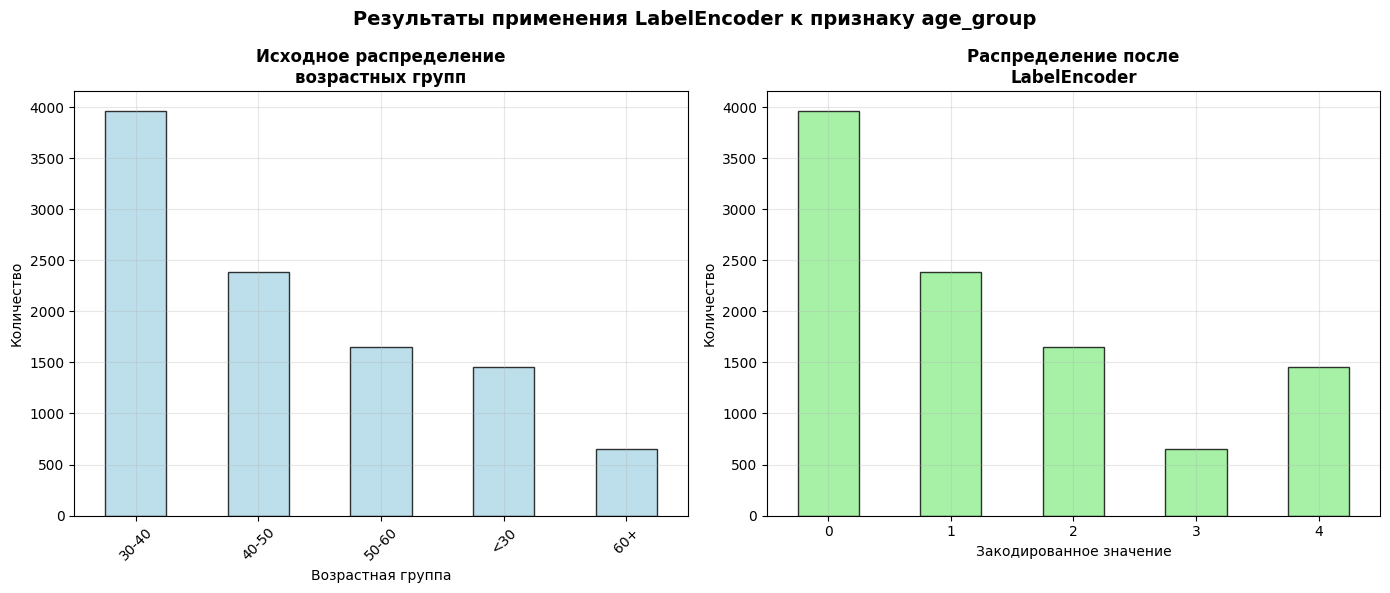

‚úÖ age_group —É—Å–ø–µ—à–Ω–æ –æ–±—Ä–∞–±–æ—Ç–∞–Ω —Å –ø–æ–º–æ—â—å—é LabelEncoder



In [44]:
# –ø—Ä–µ–æ–±—Ä–∞–∑—É–π—Ç–µ –±–∏–Ω–∞—Ä–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –≤ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–µ –∏–∑ –Ω—É–ª–µ–π –∏ –µ–¥–∏–Ω–∏—Ü

# –°–Ω–∞—á–∞–ª–∞ –æ–±—Ä–∞–±–æ—Ç–∞–µ–º age_group —Å –ø–æ–º–æ—â—å—é LabelEncoder
if 'age_group' in df.columns:
    print("–û–ë–†–ê–ë–û–¢–ö–ê –ü–†–ò–ó–ù–ê–ö–ê 'AGE_GROUP' –° –ü–û–ú–û–©–¨–Æ LABELENCODER")
    print("=" * 60)
    
    print("üìä –ò—Å—Ö–æ–¥–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤–æ–∑—Ä–∞—Å—Ç–Ω—ã—Ö –≥—Ä—É–ø–ø:")
    age_group_counts = df['age_group'].value_counts()
    for age_group, count in age_group_counts.items():
        percentage = (count / len(df)) * 100
        print(f"   {age_group}: {count} ({percentage:.2f}%)")
    print()
    
    print("üìã –£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –¥–æ –æ–±—Ä–∞–±–æ—Ç–∫–∏:")
    unique_age_groups = df['age_group'].unique()
    print(f"   {list(unique_age_groups)}")
    print(f"   –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π: {len(unique_age_groups)}")
    print()
    
    # –°–æ–∑–¥–∞–µ–º –Ω–æ–≤—ã–π —ç–∫–∑–µ–º–ø–ª—è—Ä LabelEncoder –¥–ª—è age_group
    from sklearn.preprocessing import LabelEncoder
    age_group_encoder = LabelEncoder()
    
    # –ü—Ä–∏–º–µ–Ω—è–µ–º LabelEncoder –∫ —Å—Ç–æ–ª–±—Ü—É age_group
    df['age_group_encoded'] = age_group_encoder.fit_transform(df['age_group'])
    
    print("‚úÖ LabelEncoder –ø—Ä–∏–º–µ–Ω–µ–Ω –∫ –ø—Ä–∏–∑–Ω–∞–∫—É 'age_group'")
    print()
    
    # –ü–æ–∫–∞–∑—ã–≤–∞–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è
    print("üîÑ –†–ï–ó–£–õ–¨–¢–ê–¢–´ –ö–û–î–ò–†–û–í–ê–ù–ò–Ø:")
    print("-" * 40)
    
    # –°–æ–∑–¥–∞–µ–º —Ç–∞–±–ª–∏—Ü—É —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–π
    age_mapping_dict = dict(zip(age_group_encoder.classes_, age_group_encoder.transform(age_group_encoder.classes_)))
    print("–°–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ: –∏—Å—Ö–æ–¥–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ ‚Üí –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ")
    for original, encoded in sorted(age_mapping_dict.items(), key=lambda x: x[1]):
        print(f"   '{original}' ‚Üí {encoded}")
    print()
    
    # –ü—Ä–æ–≤–µ—Ä—è–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç
    print("üìà –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π:")
    age_encoded_counts = df['age_group_encoded'].value_counts().sort_index()
    for encoded_value, count in age_encoded_counts.items():
        original_value = age_group_encoder.inverse_transform([encoded_value])[0]
        percentage = (count / len(df)) * 100
        print(f"   {encoded_value} ('{original_value}'): {count} ({percentage:.2f}%)")
    print()
    
    # –ü–æ–∫–∞–∑—ã–≤–∞–µ–º –ø—Ä–∏–º–µ—Ä –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è
    print("üìã –ü–†–ò–ú–ï–† –ü–†–ï–û–ë–†–ê–ó–û–í–ê–ù–ò–Ø (–ø–µ—Ä–≤—ã–µ 10 —Å—Ç—Ä–æ–∫):")
    print("-" * 50)
    age_comparison_df = df[['age_group', 'age_group_encoded']].head(10)
    print(age_comparison_df.to_string(index=False))
    print()
    
    # –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle('–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø—Ä–∏–º–µ–Ω–µ–Ω–∏—è LabelEncoder –∫ –ø—Ä–∏–∑–Ω–∞–∫—É age_group', 
                 fontsize=14, fontweight='bold')
    
    # 1. –ò—Å—Ö–æ–¥–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ
    age_group_counts.plot(kind='bar', ax=axes[0], color='lightblue', alpha=0.8, edgecolor='black')
    axes[0].set_title('–ò—Å—Ö–æ–¥–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ\n–≤–æ–∑—Ä–∞—Å—Ç–Ω—ã—Ö –≥—Ä—É–ø–ø', fontweight='bold')
    axes[0].set_xlabel('–í–æ–∑—Ä–∞—Å—Ç–Ω–∞—è –≥—Ä—É–ø–ø–∞')
    axes[0].set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(True, alpha=0.3)
    
    # 2. –ó–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ
    age_encoded_counts.plot(kind='bar', ax=axes[1], color='lightgreen', alpha=0.8, edgecolor='black')
    axes[1].set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ—Å–ª–µ\nLabelEncoder', fontweight='bold')
    axes[1].set_xlabel('–ó–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ')
    axes[1].set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
    axes[1].tick_params(axis='x', rotation=0)
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("‚úÖ age_group —É—Å–ø–µ—à–Ω–æ –æ–±—Ä–∞–±–æ—Ç–∞–Ω —Å –ø–æ–º–æ—â—å—é LabelEncoder")
    print("=" * 60)

else:
    print("‚ùå –°—Ç–æ–ª–±–µ—Ü 'age_group' –Ω–µ –Ω–∞–π–¥–µ–Ω –≤ –¥–∞–Ω–Ω—ã—Ö")

print("\n" + "=" * 60)


–ü–ï–†–ï–ö–û–î–ò–†–û–í–ê–ù–ò–ï –¶–ï–õ–ï–í–û–ô –ü–ï–†–ï–ú–ï–ù–ù–û–ô 'DEPOSIT'
üìä –ò—Å—Ö–æ–¥–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π 'deposit':
   'no': 5424 (53.68%)
   'yes': 4681 (46.32%)

üìã –£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –¥–æ –ø–µ—Ä–µ–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è:
   ['yes', 'no']

üîÑ –ü–†–ò–ú–ï–ù–ï–ù–ò–ï –û–¢–û–ë–†–ê–ñ–ï–ù–ò–Ø:
------------------------------
–û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ:
   'no' ‚Üí 0
   'yes' ‚Üí 1

üìà –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ—Å–ª–µ –ø–µ—Ä–µ–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è:
   0 ('no'): 5424 (53.68%)
   1 ('yes'): 4681 (46.32%)

üîç –ü–†–û–í–ï–†–ö–ê –ö–û–†–†–ï–ö–¢–ù–û–°–¢–ò:
------------------------------
–ü—Ä–æ–ø—É—Å–∫–∏ –≤ –∏—Å—Ö–æ–¥–Ω–æ–º —Å—Ç–æ–ª–±—Ü–µ: 0
–ü—Ä–æ–ø—É—Å–∫–∏ –≤ –±–∏–Ω–∞—Ä–Ω–æ–º —Å—Ç–æ–ª–±—Ü–µ: 0
‚úÖ –ü—Ä–æ–ø—É—Å–∫–∏ –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—Ç –≤ –æ–±–æ–∏—Ö —Å—Ç–æ–ª–±—Ü–∞—Ö
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π –≤ –∏—Å—Ö–æ–¥–Ω–æ–º —Å—Ç–æ–ª–±—Ü–µ: 10105
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π –≤ –±–∏–Ω–∞—Ä–Ω–æ–º —Å—Ç–æ–ª–±—Ü–µ: 10105
‚úÖ –ö–æ–ª

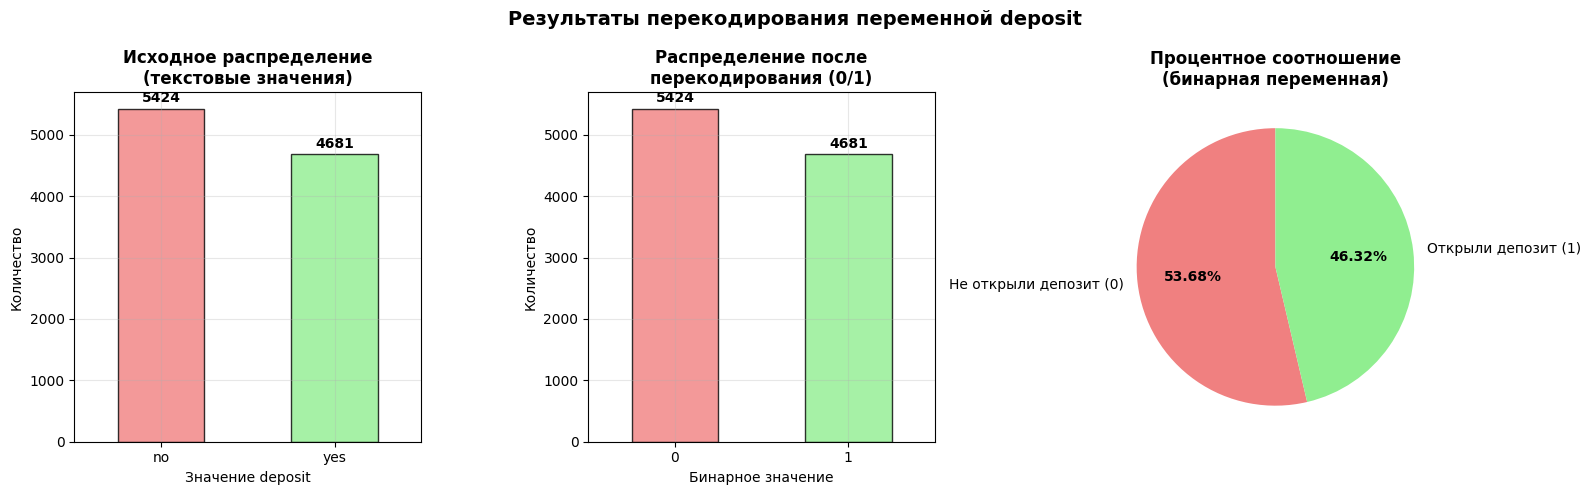

‚úÖ –†–ï–ó–£–õ–¨–¢–ê–¢ –ü–ï–†–ï–ö–û–î–ò–†–û–í–ê–ù–ò–Ø:
-----------------------------------
‚úÖ –ü–µ—Ä–µ–º–µ–Ω–Ω–∞—è 'deposit' —É—Å–ø–µ—à–Ω–æ –ø–µ—Ä–µ–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∞
‚úÖ –°–æ–∑–¥–∞–Ω –Ω–æ–≤—ã–π —Å—Ç–æ–ª–±–µ—Ü 'deposit_binary' —Å –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ 0/1
‚úÖ –û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ: 'no' ‚Üí 0, 'yes' ‚Üí 1
‚úÖ –í—Å–µ –∏—Å—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã
‚úÖ –ì–æ—Ç–æ–≤–∞ –¥–ª—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –≤ –∫–∞—á–µ—Å—Ç–≤–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π



In [45]:
#  –ø–µ—Ä–µ–∫–æ–¥–∏—Ä—É–µ–º –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é deposit —Ç–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, —á—Ç–æ–±—ã –≤–º–µ—Å—Ç–æ yes –æ–Ω–∞ –ø—Ä–∏–Ω–∏–º–∞–ª–∞ –∑–Ω–∞—á–µ–Ω–∏–µ 1, –∞ –≤–º–µ—Å—Ç–æ no ‚Äî 0.

# –ü—Ä–æ–≤–µ—Ä—è–µ–º –Ω–∞–ª–∏—á–∏–µ –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π deposit
if 'deposit' in df.columns:
    print("–ü–ï–†–ï–ö–û–î–ò–†–û–í–ê–ù–ò–ï –¶–ï–õ–ï–í–û–ô –ü–ï–†–ï–ú–ï–ù–ù–û–ô 'DEPOSIT'")
    print("=" * 50)
    
    # –ü–æ–∫–∞–∑—ã–≤–∞–µ–º –∏—Å—Ö–æ–¥–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ
    print("üìä –ò—Å—Ö–æ–¥–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π 'deposit':")
    deposit_counts = df['deposit'].value_counts()
    for value, count in deposit_counts.items():
        percentage = (count / len(df)) * 100
        print(f"   '{value}': {count} ({percentage:.2f}%)")
    print()
    
    print("üìã –£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –¥–æ –ø–µ—Ä–µ–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è:")
    unique_values = df['deposit'].unique()
    print(f"   {list(unique_values)}")
    print()
    
    # –°–æ–∑–¥–∞–µ–º –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ: 'no' ‚Üí 0, 'yes' ‚Üí 1
    deposit_mapping = {'no': 0, 'yes': 1}
    
    # –ü—Ä–∏–º–µ–Ω—è–µ–º –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ
    df['deposit_binary'] = df['deposit'].map(deposit_mapping)
    
    print("üîÑ –ü–†–ò–ú–ï–ù–ï–ù–ò–ï –û–¢–û–ë–†–ê–ñ–ï–ù–ò–Ø:")
    print("-" * 30)
    print("–û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ:")
    for original, binary in deposit_mapping.items():
        print(f"   '{original}' ‚Üí {binary}")
    print()
    
    # –ü—Ä–æ–≤–µ—Ä—è–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç
    print("üìà –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ—Å–ª–µ –ø–µ—Ä–µ–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è:")
    binary_counts = df['deposit_binary'].value_counts().sort_index()
    for binary_value, count in binary_counts.items():
        original_value = [k for k, v in deposit_mapping.items() if v == binary_value][0]
        percentage = (count / len(df)) * 100
        print(f"   {binary_value} ('{original_value}'): {count} ({percentage:.2f}%)")
    print()
    
    # –ü—Ä–æ–≤–µ—Ä—è–µ–º –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ—Å—Ç—å –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è
    print("üîç –ü–†–û–í–ï–†–ö–ê –ö–û–†–†–ï–ö–¢–ù–û–°–¢–ò:")
    print("-" * 30)
    
    # –ü—Ä–æ–≤–µ—Ä—è–µ–º, —á—Ç–æ –Ω–µ—Ç –ø—Ä–æ–ø—É—Å–∫–æ–≤
    missing_original = df['deposit'].isnull().sum()
    missing_binary = df['deposit_binary'].isnull().sum()
    
    print(f"–ü—Ä–æ–ø—É—Å–∫–∏ –≤ –∏—Å—Ö–æ–¥–Ω–æ–º —Å—Ç–æ–ª–±—Ü–µ: {missing_original}")
    print(f"–ü—Ä–æ–ø—É—Å–∫–∏ –≤ –±–∏–Ω–∞—Ä–Ω–æ–º —Å—Ç–æ–ª–±—Ü–µ: {missing_binary}")
    
    if missing_original == missing_binary == 0:
        print("‚úÖ –ü—Ä–æ–ø—É—Å–∫–∏ –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—Ç –≤ –æ–±–æ–∏—Ö —Å—Ç–æ–ª–±—Ü–∞—Ö")
    elif missing_original == missing_binary:
        print("‚úÖ –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ —Å–æ—Ö—Ä–∞–Ω–∏–ª–æ—Å—å")
    
    # –ü—Ä–æ–≤–µ—Ä—è–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π
    original_count = len(df['deposit'])
    binary_count = len(df['deposit_binary'])
    
    print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π –≤ –∏—Å—Ö–æ–¥–Ω–æ–º —Å—Ç–æ–ª–±—Ü–µ: {original_count}")
    print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π –≤ –±–∏–Ω–∞—Ä–Ω–æ–º —Å—Ç–æ–ª–±—Ü–µ: {binary_count}")
    
    if original_count == binary_count:
        print("‚úÖ –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π —Å–æ—Ö—Ä–∞–Ω–∏–ª–æ—Å—å")
    
    # –ü—Ä–æ–≤–µ—Ä—è–µ–º —É–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
    unique_binary = df['deposit_binary'].unique()
    print(f"–£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ –±–∏–Ω–∞—Ä–Ω–æ–º —Å—Ç–æ–ª–±—Ü–µ: {sorted(unique_binary)}")
    
    if set(unique_binary) == {0, 1}:
        print("‚úÖ –ë–∏–Ω–∞—Ä–Ω—ã–π —Å—Ç–æ–ª–±–µ—Ü —Å–æ–¥–µ—Ä–∂–∏—Ç —Ç–æ–ª—å–∫–æ –∑–Ω–∞—á–µ–Ω–∏—è 0 –∏ 1")
    
    print()
    
    # –ü–æ–∫–∞–∑—ã–≤–∞–µ–º –ø—Ä–∏–º–µ—Ä –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è
    print("üìã –ü–†–ò–ú–ï–† –ü–†–ï–û–ë–†–ê–ó–û–í–ê–ù–ò–Ø (–ø–µ—Ä–≤—ã–µ 10 —Å—Ç—Ä–æ–∫):")
    print("-" * 45)
    comparison_df = df[['deposit', 'deposit_binary']].head(10)
    print(comparison_df.to_string(index=False))
    print()
    
    # –ë–∞–∑–æ–≤–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –¥–ª—è –±–∏–Ω–∞—Ä–Ω–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
    print("üìä –°–¢–ê–¢–ò–°–¢–ò–ö–ê –ë–ò–ù–ê–†–ù–û–ô –ü–ï–†–ï–ú–ï–ù–ù–û–ô:")
    print("-" * 40)
    print(f"–ú–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ: {df['deposit_binary'].min()}")
    print(f"–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ: {df['deposit_binary'].max()}")
    print(f"–°—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ (–¥–æ–ª—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö): {df['deposit_binary'].mean():.4f}")
    print(f"–°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ: {df['deposit_binary'].std():.6f}")
    print(f"–ú–µ–¥–∏–∞–Ω–∞: {df['deposit_binary'].median():.1f}")
    print()
    
    # –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è —Å—Ä–µ–¥–Ω–µ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è
    mean_value = df['deposit_binary'].mean()
    print(f"üí° –ò–ù–¢–ï–†–ü–†–ï–¢–ê–¶–ò–Ø:")
    print(f"   –°—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ {mean_value:.4f} –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ {mean_value*100:.2f}% –∫–ª–∏–µ–Ω—Ç–æ–≤")
    print(f"   –æ—Ç–∫—Ä—ã–ª–∏ –¥–µ–ø–æ–∑–∏—Ç (–ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–π –∏—Å—Ö–æ–¥)")
    print()
    
    # –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
    fig, axes = plt.subplots(1, 3, figsize=(16, 5))
    fig.suptitle('–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø–µ—Ä–µ–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π deposit', 
                 fontsize=14, fontweight='bold')
    
    # 1. –ò—Å—Ö–æ–¥–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ
    deposit_counts.plot(kind='bar', ax=axes[0], color=['lightcoral', 'lightgreen'], 
                       alpha=0.8, edgecolor='black')
    axes[0].set_title('–ò—Å—Ö–æ–¥–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ\n(—Ç–µ–∫—Å—Ç–æ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è)', fontweight='bold')
    axes[0].set_xlabel('–ó–Ω–∞—á–µ–Ω–∏–µ deposit')
    axes[0].set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
    axes[0].tick_params(axis='x', rotation=0)
    axes[0].grid(True, alpha=0.3)
    
    # –î–æ–±–∞–≤–ª—è–µ–º –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ —Å—Ç–æ–ª–±—Ü—ã
    for i, v in enumerate(deposit_counts.values):
        axes[0].text(i, v + max(deposit_counts.values) * 0.01, str(v), 
                    ha='center', va='bottom', fontweight='bold')
    
    # 2. –ë–∏–Ω–∞—Ä–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ
    binary_counts.plot(kind='bar', ax=axes[1], color=['lightcoral', 'lightgreen'], 
                      alpha=0.8, edgecolor='black')
    axes[1].set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ—Å–ª–µ\n–ø–µ—Ä–µ–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è (0/1)', fontweight='bold')
    axes[1].set_xlabel('–ë–∏–Ω–∞—Ä–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ')
    axes[1].set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
    axes[1].tick_params(axis='x', rotation=0)
    axes[1].grid(True, alpha=0.3)
    
    # –î–æ–±–∞–≤–ª—è–µ–º –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ —Å—Ç–æ–ª–±—Ü—ã
    for i, v in enumerate(binary_counts.values):
        axes[1].text(i, v + max(binary_counts.values) * 0.01, str(v), 
                    ha='center', va='bottom', fontweight='bold')
    
    # 3. –ö—Ä—É–≥–æ–≤–∞—è –¥–∏–∞–≥—Ä–∞–º–º–∞
    colors_pie = ['lightcoral', 'lightgreen']
    labels_pie = ['–ù–µ –æ—Ç–∫—Ä—ã–ª–∏ –¥–µ–ø–æ–∑–∏—Ç (0)', '–û—Ç–∫—Ä—ã–ª–∏ –¥–µ–ø–æ–∑–∏—Ç (1)']
    
    wedges, texts, autotexts = axes[2].pie(binary_counts.values,
                                          labels=labels_pie,
                                          autopct='%1.2f%%',
                                          colors=colors_pie,
                                          startangle=90)
    
    axes[2].set_title('–ü—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ\n(–±–∏–Ω–∞—Ä–Ω–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è)', fontweight='bold')
    
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontweight('bold')
    
    plt.tight_layout()
    plt.show()
    
    print("‚úÖ –†–ï–ó–£–õ–¨–¢–ê–¢ –ü–ï–†–ï–ö–û–î–ò–†–û–í–ê–ù–ò–Ø:")
    print("-" * 35)
    print("‚úÖ –ü–µ—Ä–µ–º–µ–Ω–Ω–∞—è 'deposit' —É—Å–ø–µ—à–Ω–æ –ø–µ—Ä–µ–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∞")
    print("‚úÖ –°–æ–∑–¥–∞–Ω –Ω–æ–≤—ã–π —Å—Ç–æ–ª–±–µ—Ü 'deposit_binary' —Å –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ 0/1")
    print("‚úÖ –û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ: 'no' ‚Üí 0, 'yes' ‚Üí 1")
    print("‚úÖ –í—Å–µ –∏—Å—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã")
    print("‚úÖ –ì–æ—Ç–æ–≤–∞ –¥–ª—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –≤ –∫–∞—á–µ—Å—Ç–≤–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π")

else:
    print("‚ùå –°—Ç–æ–ª–±–µ—Ü 'deposit' –Ω–µ –Ω–∞–π–¥–µ–Ω –≤ –¥–∞–Ω–Ω—ã—Ö")

print("\n" + "=" * 50)


In [49]:
#–í—ã—á–∏—Å–ª–∏—Ç–µ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –ø–æ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–Ω–æ–π –≤ –∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã–π –≤–∏–¥ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π deposit. –û—Ç–≤–µ—Ç –æ–∫—Ä—É–≥–ª–∏—Ç–µ –¥–æ —Ç—Ä—ë—Ö –∑–Ω–∞–∫–æ–≤ –ø–æ—Å–ª–µ —Ç–æ—á–∫–∏-—Ä–∞–∑–¥–µ–ª–∏—Ç–µ–ª—è.
df['deposit_binary'].describe()

count    10105.000000
mean         0.463236
std          0.498671
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: deposit_binary, dtype: float64

–ü–ï–†–ï–ö–û–î–ò–†–û–í–ê–ù–ò–ï –ë–ò–ù–ê–†–ù–´–• –ü–ï–†–ï–ú–ï–ù–ù–´–•: 'DEFAULT', 'HOUSING', 'LOAN'
üîÑ –û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –¥–ª—è –≤—Å–µ—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö:
   'no' ‚Üí 0
   'yes' ‚Üí 1

üìä –û–ë–†–ê–ë–û–¢–ö–ê –ü–ï–†–ï–ú–ï–ù–ù–û–ô 'DEFAULT':
----------------------------------------
–ò—Å—Ö–æ–¥–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ 'default':
   'no': 9939 (98.36%)
   'yes': 166 (1.64%)
–£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è: ['no', 'yes']
–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ—Å–ª–µ –ø–µ—Ä–µ–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è ('default_binary'):
   0 ('no'): 9939 (98.36%)
   1 ('yes'): 166 (1.64%)
‚úÖ –ü–µ—Ä–µ–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –≤—ã–ø–æ–ª–Ω–µ–Ω–æ –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ
–°—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ (–¥–æ–ª—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö): 0.0164 (1.64%)
–°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ: 0.127119

üìä –û–ë–†–ê–ë–û–¢–ö–ê –ü–ï–†–ï–ú–ï–ù–ù–û–ô 'HOUSING':
----------------------------------------
–ò—Å—Ö–æ–¥–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ 'housing':
   'no': 5243 (51.89%)
   'yes': 4862 (48.11%)


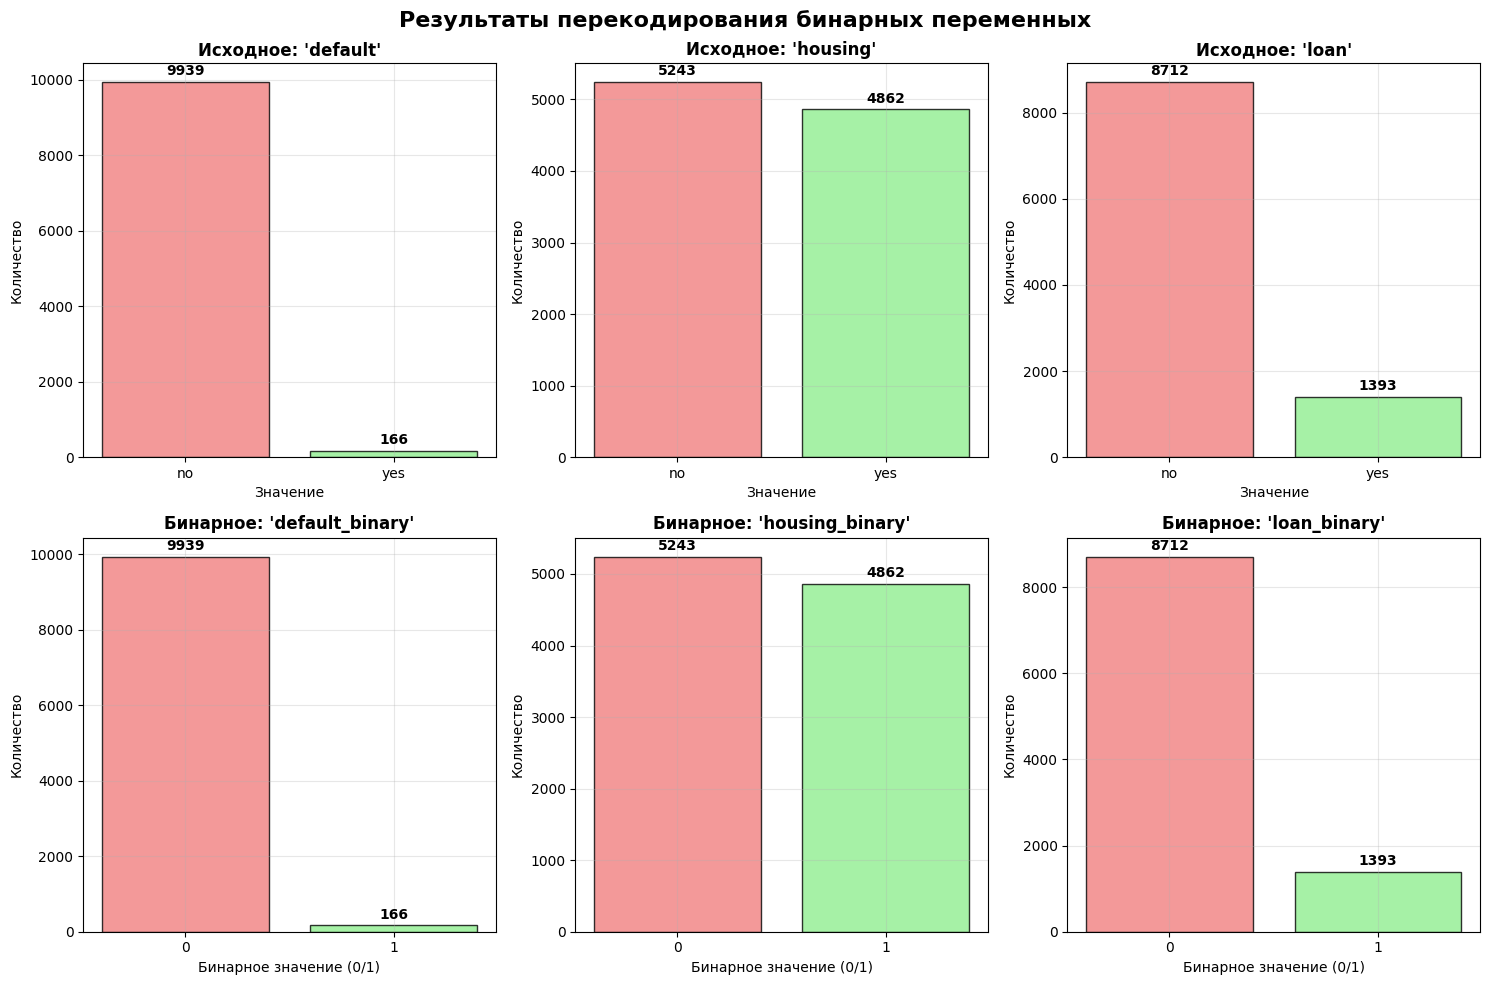

üìã –ü–†–û–í–ï–†–û–ß–ù–ê–Ø –¢–ê–ë–õ–ò–¶–ê (–ø–µ—Ä–≤—ã–µ 10 —Å—Ç—Ä–æ–∫):
------------------------------------------------------------
default  default_binary housing  housing_binary loan  loan_binary
     no               0     yes               1   no            0
     no               0      no               0   no            0
     no               0     yes               1   no            0
     no               0     yes               1   no            0
     no               0      no               0   no            0
     no               0     yes               1  yes            1
     no               0     yes               1  yes            1
     no               0     yes               1   no            0
     no               0     yes               1   no            0
     no               0     yes               1   no            0

‚úÖ –ò–¢–û–ì–û–í–´–ô –†–ï–ó–£–õ–¨–¢–ê–¢:
-------------------------
‚úÖ –í—Å–µ –±–∏–Ω–∞—Ä–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ —É—Å–ø–µ—à–Ω–æ –ø–µ—Ä–µ

In [50]:
# –°–¥–µ–ª–∞–µ–º —Ç–æ –∂–µ —Å–∞–º–æ–µ –¥–ª—è –¥—Ä—É–≥–∏—Ö –±–∏–Ω–∞—Ä–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö, –∫–æ—Ç–æ—Ä—ã—Ö —É –Ω–∞—Å —Ç—Ä–∏: 'default'; 'housing'; 'loan'. –í—Å–µ —Ç—Ä–∏ –º—ã –±—É–¥–µ–º –º–æ–¥–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞—Ç—å —Ä–æ–≤–Ω–æ —Ç–∞–∫ –∂–µ: –¥–ª—è —Å–ª–æ–≤–∞ yes –º—ã –≤–æ–∑—å–º—ë–º –≤ –∫–∞—á–µ—Å—Ç–≤–µ –∑–Ω–∞—á–µ–Ω–∏—è 1, –∞ –¥–ª—è no ‚Äî 0.

print("–ü–ï–†–ï–ö–û–î–ò–†–û–í–ê–ù–ò–ï –ë–ò–ù–ê–†–ù–´–• –ü–ï–†–ï–ú–ï–ù–ù–´–•: 'DEFAULT', 'HOUSING', 'LOAN'")
print("=" * 70)

# –°–ø–∏—Å–æ–∫ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –¥–ª—è –æ–±—Ä–∞–±–æ—Ç–∫–∏
binary_variables = ['default', 'housing', 'loan']

# –û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –¥–ª—è –ø–µ—Ä–µ–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è
binary_mapping = {'no': 0, 'yes': 1}

print("üîÑ –û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –¥–ª—è –≤—Å–µ—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö:")
for original, binary in binary_mapping.items():
    print(f"   '{original}' ‚Üí {binary}")
print()

# –û–±—Ä–∞–±–∞—Ç—ã–≤–∞–µ–º –∫–∞–∂–¥—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é
processed_variables = []

for var in binary_variables:
    if var in df.columns:
        print(f"üìä –û–ë–†–ê–ë–û–¢–ö–ê –ü–ï–†–ï–ú–ï–ù–ù–û–ô '{var.upper()}':")
        print("-" * 40)
        
        # –ü–æ–∫–∞–∑—ã–≤–∞–µ–º –∏—Å—Ö–æ–¥–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ
        print(f"–ò—Å—Ö–æ–¥–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ '{var}':")
        var_counts = df[var].value_counts()
        for value, count in var_counts.items():
            percentage = (count / len(df)) * 100
            print(f"   '{value}': {count} ({percentage:.2f}%)")
        
        # –ü—Ä–æ–≤–µ—Ä—è–µ–º —É–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
        unique_values = df[var].unique()
        print(f"–£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è: {list(unique_values)}")
        
        # –ü—Ä–∏–º–µ–Ω—è–µ–º –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ
        new_var_name = f'{var}_binary'
        df[new_var_name] = df[var].map(binary_mapping)
        
        # –ü—Ä–æ–≤–µ—Ä—è–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç
        print(f"–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ—Å–ª–µ –ø–µ—Ä–µ–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è ('{new_var_name}'):")
        binary_counts = df[new_var_name].value_counts().sort_index()
        for binary_value, count in binary_counts.items():
            original_value = [k for k, v in binary_mapping.items() if v == binary_value][0]
            percentage = (count / len(df)) * 100
            print(f"   {binary_value} ('{original_value}'): {count} ({percentage:.2f}%)")
        
        # –ü—Ä–æ–≤–µ—Ä—è–µ–º –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ—Å—Ç—å
        missing_original = df[var].isnull().sum()
        missing_binary = df[new_var_name].isnull().sum()
        
        if missing_original == missing_binary:
            print("‚úÖ –ü–µ—Ä–µ–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –≤—ã–ø–æ–ª–Ω–µ–Ω–æ –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ")
        else:
            print("‚ùå –û–±–Ω–∞—Ä—É–∂–µ–Ω—ã –ø—Ä–æ–±–ª–µ–º—ã –ø—Ä–∏ –ø–µ—Ä–µ–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–∏")
        
        # –ë–∞–∑–æ–≤–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞
        mean_value = df[new_var_name].mean()
        std_value = df[new_var_name].std()
        print(f"–°—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ (–¥–æ–ª—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö): {mean_value:.4f} ({mean_value*100:.2f}%)")
        print(f"–°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ: {std_value:.6f}")
        
        processed_variables.append((var, new_var_name))
        print()
    else:
        print(f"‚ùå –ü–µ—Ä–µ–º–µ–Ω–Ω–∞—è '{var}' –Ω–µ –Ω–∞–π–¥–µ–Ω–∞ –≤ –¥–∞–Ω–Ω—ã—Ö")
        print()

# –°–≤–æ–¥–Ω–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è
print("üìà –°–í–û–î–ù–ê–Ø –ò–ù–§–û–†–ú–ê–¶–ò–Ø:")
print("-" * 30)
print(f"–û–±—Ä–∞–±–æ—Ç–∞–Ω–æ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö: {len(processed_variables)}")
for original, binary in processed_variables:
    print(f"   '{original}' ‚Üí '{binary}'")
print()

# –°—Ä–∞–≤–Ω–∏—Ç–µ–ª—å–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞
if processed_variables:
    print("üìä –°–†–ê–í–ù–ò–¢–ï–õ–¨–ù–ê–Ø –°–¢–ê–¢–ò–°–¢–ò–ö–ê –°–†–ï–î–ù–ò–• –ó–ù–ê–ß–ï–ù–ò–ô:")
    print("-" * 50)
    for original, binary in processed_variables:
        mean_val = df[binary].mean()
        print(f"   {binary}: {mean_val:.4f} ({mean_val*100:.2f}%)")
    
    # –°—É–º–º–∞ —Å—Ä–µ–¥–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π
    total_mean = sum(df[binary].mean() for _, binary in processed_variables)
    print(f"\n–°—É–º–º–∞ —Å—Ä–µ–¥–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤—Å–µ—Ö –±–∏–Ω–∞—Ä–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö: {total_mean:.4f}")
    print()

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
if processed_variables:
    n_vars = len(processed_variables)
    fig, axes = plt.subplots(2, n_vars, figsize=(5*n_vars, 10))
    fig.suptitle('–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø–µ—Ä–µ–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è –±–∏–Ω–∞—Ä–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö', 
                 fontsize=16, fontweight='bold')
    
    if n_vars == 1:
        axes = axes.reshape(2, 1)
    
    for i, (original, binary) in enumerate(processed_variables):
        # –í–µ—Ä—Ö–Ω–∏–π —Ä—è–¥ - –∏—Å—Ö–æ–¥–Ω—ã–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è
        original_counts = df[original].value_counts()
        colors_original = ['lightcoral', 'lightgreen']
        
        bars1 = axes[0, i].bar(range(len(original_counts)), original_counts.values, 
                              color=colors_original, alpha=0.8, edgecolor='black')
        axes[0, i].set_title(f"–ò—Å—Ö–æ–¥–Ω–æ–µ: '{original}'", fontweight='bold')
        axes[0, i].set_xlabel('–ó–Ω–∞—á–µ–Ω–∏–µ')
        axes[0, i].set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
        axes[0, i].set_xticks(range(len(original_counts)))
        axes[0, i].set_xticklabels(original_counts.index)
        axes[0, i].grid(True, alpha=0.3)
        
        # –î–æ–±–∞–≤–ª—è–µ–º –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ —Å—Ç–æ–ª–±—Ü—ã
        for bar, count in zip(bars1, original_counts.values):
            height = bar.get_height()
            axes[0, i].text(bar.get_x() + bar.get_width()/2., height + max(original_counts.values)*0.01,
                           str(count), ha='center', va='bottom', fontweight='bold')
        
        # –ù–∏–∂–Ω–∏–π —Ä—è–¥ - –±–∏–Ω–∞—Ä–Ω—ã–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è
        binary_counts = df[binary].value_counts().sort_index()
        colors_binary = ['lightcoral', 'lightgreen']
        
        bars2 = axes[1, i].bar(range(len(binary_counts)), binary_counts.values, 
                              color=colors_binary, alpha=0.8, edgecolor='black')
        axes[1, i].set_title(f"–ë–∏–Ω–∞—Ä–Ω–æ–µ: '{binary}'", fontweight='bold')
        axes[1, i].set_xlabel('–ë–∏–Ω–∞—Ä–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ (0/1)')
        axes[1, i].set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
        axes[1, i].set_xticks(range(len(binary_counts)))
        axes[1, i].set_xticklabels(binary_counts.index)
        axes[1, i].grid(True, alpha=0.3)
        
        # –î–æ–±–∞–≤–ª—è–µ–º –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ —Å—Ç–æ–ª–±—Ü—ã
        for bar, count in zip(bars2, binary_counts.values):
            height = bar.get_height()
            axes[1, i].text(bar.get_x() + bar.get_width()/2., height + max(binary_counts.values)*0.01,
                           str(count), ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# –ü—Ä–æ–≤–µ—Ä–æ—á–Ω–∞—è —Ç–∞–±–ª–∏—Ü–∞
if processed_variables:
    print("üìã –ü–†–û–í–ï–†–û–ß–ù–ê–Ø –¢–ê–ë–õ–ò–¶–ê (–ø–µ—Ä–≤—ã–µ 10 —Å—Ç—Ä–æ–∫):")
    print("-" * 60)
    
    # –°–æ–∑–¥–∞–µ–º —Å–ø–∏—Å–æ–∫ —Å—Ç–æ–ª–±—Ü–æ–≤ –¥–ª—è –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è
    columns_to_show = []
    for original, binary in processed_variables:
        columns_to_show.extend([original, binary])
    
    comparison_df = df[columns_to_show].head(10)
    print(comparison_df.to_string(index=False))
    print()

print("‚úÖ –ò–¢–û–ì–û–í–´–ô –†–ï–ó–£–õ–¨–¢–ê–¢:")
print("-" * 25)
print("‚úÖ –í—Å–µ –±–∏–Ω–∞—Ä–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ —É—Å–ø–µ—à–Ω–æ –ø–µ—Ä–µ–∫–æ–¥–∏—Ä–æ–≤–∞–Ω—ã")
print("‚úÖ –°–æ–∑–¥–∞–Ω—ã –Ω–æ–≤—ã–µ —Å—Ç–æ–ª–±—Ü—ã —Å —Å—É—Ñ—Ñ–∏–∫—Å–æ–º '_binary'")
print("‚úÖ –û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ: 'no' ‚Üí 0, 'yes' ‚Üí 1")
print("‚úÖ –í—Å–µ –∏—Å—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã")
print("‚úÖ –ü–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –≥–æ—Ç–æ–≤—ã –¥–ª—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –≤ ML-–º–æ–¥–µ–ª—è—Ö")

print("\n" + "=" * 70)



In [ ]:
answer_4_3 = df['default_binary'].mean() + df['housing_binary'].mean() + df['loan_binary'].mean()
print(answer_4_3)

0.6354280059376547


### –ó–∞–¥–∞–Ω–∏–µ 4

–°–û–ó–î–ê–ù–ò–ï DUMMY-–ü–ï–†–ï–ú–ï–ù–ù–´–• –î–õ–Ø –ù–û–ú–ò–ù–ê–õ–¨–ù–´–• –ü–†–ò–ó–ù–ê–ö–û–í
üìä –ù–æ–º–∏–Ω–∞–ª—å–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –¥–ª—è –æ–±—Ä–∞–±–æ—Ç–∫–∏:
   ‚Ä¢ job
   ‚Ä¢ marital
   ‚Ä¢ contact
   ‚Ä¢ month
   ‚Ä¢ poutcome

üîç –ü–†–û–í–ï–†–ö–ê –ù–ê–õ–ò–ß–ò–Ø –ü–ï–†–ï–ú–ï–ù–ù–´–•:
----------------------------------------
‚úÖ –ù–∞–π–¥–µ–Ω–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ: ['job', 'marital', 'contact', 'month', 'poutcome']

üìà –ê–ù–ê–õ–ò–ó –ü–ï–†–ï–ú–ï–ù–ù–´–• –ü–ï–†–ï–î –û–ë–†–ê–ë–û–¢–ö–û–ô:
---------------------------------------------

üìã –ü–µ—Ä–µ–º–µ–Ω–Ω–∞—è 'job':
   ‚Ä¢ –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π: 11
   ‚Ä¢ –£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è: ['admin.', 'technician', 'services', 'management', 'retired', 'blue-collar', 'unemployed', 'entrepreneur', 'housemaid', 'self-employed', 'student']
   ‚Ä¢ –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ (—Ç–æ–ø-5):
     - 'management': 2315 (22.91%)
     - 'blue-collar': 1807 (17.88%)
     - 'technician': 1638 (16.

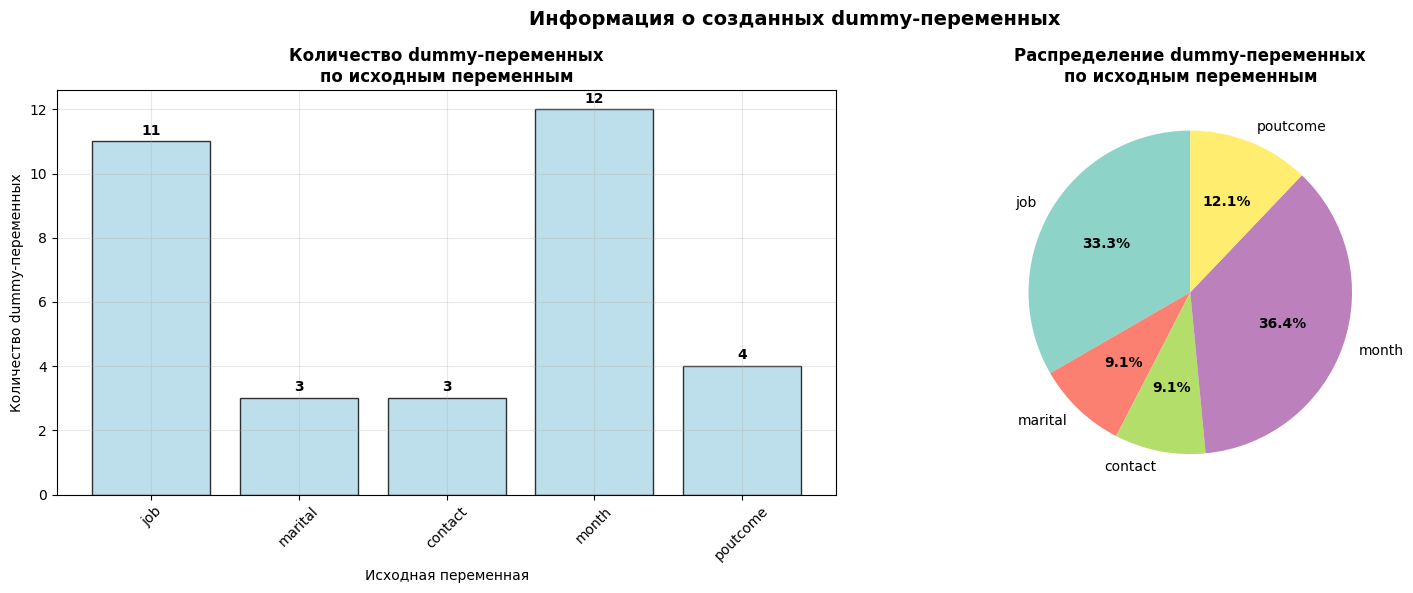

üìù –ù–û–í–´–ï –°–¢–û–õ–ë–¶–´ –í DATASET:
------------------------------
–û–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–æ–≤—ã—Ö dummy-—Å—Ç–æ–ª–±—Ü–æ–≤: 33

–ü–æ–ª–Ω—ã–π —Å–ø–∏—Å–æ–∫ dummy-–ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö:
    1. job_admin.
    2. job_blue-collar
    3. job_entrepreneur
    4. job_housemaid
    5. job_management
    6. job_retired
    7. job_self-employed
    8. job_services
    9. job_student
   10. job_technician
   11. job_unemployed
   12. marital_divorced
   13. marital_married
   14. marital_single
   15. contact_cellular
   16. contact_telephone
   17. contact_unknown
   18. month_apr
   19. month_aug
   20. month_dec
       ...
       (–∏ –µ—â—ë 13 –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö)

‚úÖ –ò–¢–û–ì–û–í–´–ô –†–ï–ó–£–õ–¨–¢–ê–¢:
-------------------------
‚úÖ Dummy-–ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ —É—Å–ø–µ—à–Ω–æ —Å–æ–∑–¥–∞–Ω—ã –¥–ª—è –≤—Å–µ—Ö –Ω–æ–º–∏–Ω–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
‚úÖ –í—Å–µ dummy-–ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –¥–æ–±–∞–≤–ª–µ–Ω—ã –≤ –æ—Å–Ω–æ–≤–Ω–æ–π DataFrame
‚úÖ –ò—Å—Ö–æ–¥–Ω—ã–µ –Ω–æ–º–∏–Ω–∞–ª—å–Ω—ã–µ –ø

In [51]:
# —Å–æ–∑–¥–∞–π—Ç–µ –¥–∞–º–º–∏-–ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ

print("–°–û–ó–î–ê–ù–ò–ï DUMMY-–ü–ï–†–ï–ú–ï–ù–ù–´–• –î–õ–Ø –ù–û–ú–ò–ù–ê–õ–¨–ù–´–• –ü–†–ò–ó–ù–ê–ö–û–í")
print("=" * 60)

# –°–ø–∏—Å–æ–∫ –Ω–æ–º–∏–Ω–∞–ª—å–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –¥–ª—è –æ–±—Ä–∞–±–æ—Ç–∫–∏
nominal_variables = ['job', 'marital', 'contact', 'month', 'poutcome']

print("üìä –ù–æ–º–∏–Ω–∞–ª—å–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –¥–ª—è –æ–±—Ä–∞–±–æ—Ç–∫–∏:")
for var in nominal_variables:
    print(f"   ‚Ä¢ {var}")
print()

# –ü—Ä–æ–≤–µ—Ä—è–µ–º –Ω–∞–ª–∏—á–∏–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –≤ –¥–∞–Ω–Ω—ã—Ö
existing_variables = []
missing_variables = []

for var in nominal_variables:
    if var in df.columns:
        existing_variables.append(var)
    else:
        missing_variables.append(var)

print("üîç –ü–†–û–í–ï–†–ö–ê –ù–ê–õ–ò–ß–ò–Ø –ü–ï–†–ï–ú–ï–ù–ù–´–•:")
print("-" * 40)
print(f"‚úÖ –ù–∞–π–¥–µ–Ω–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ: {existing_variables}")
if missing_variables:
    print(f"‚ùå –û—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ: {missing_variables}")
print()

# –ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º –∫–∞–∂–¥—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é –ø–µ—Ä–µ–¥ —Å–æ–∑–¥–∞–Ω–∏–µ–º dummy-–ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
print("üìà –ê–ù–ê–õ–ò–ó –ü–ï–†–ï–ú–ï–ù–ù–´–• –ü–ï–†–ï–î –û–ë–†–ê–ë–û–¢–ö–û–ô:")
print("-" * 45)

variable_info = {}

for var in existing_variables:
    unique_count = df[var].nunique()
    unique_values = df[var].unique()
    value_counts = df[var].value_counts()
    
    variable_info[var] = {
        'unique_count': unique_count,
        'unique_values': unique_values,
        'value_counts': value_counts
    }
    
    print(f"\nüìã –ü–µ—Ä–µ–º–µ–Ω–Ω–∞—è '{var}':")
    print(f"   ‚Ä¢ –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π: {unique_count}")
    print(f"   ‚Ä¢ –£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è: {list(unique_values)}")
    print(f"   ‚Ä¢ –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ (—Ç–æ–ø-5):")
    
    for value, count in value_counts.head().items():
        percentage = (count / len(df)) * 100
        print(f"     - '{value}': {count} ({percentage:.2f}%)")
    
    if len(value_counts) > 5:
        remaining = len(value_counts) - 5
        print(f"     ... –∏ –µ—â—ë {remaining} –∑–Ω–∞—á–µ–Ω–∏–π")

print()

# –°–æ—Ö—Ä–∞–Ω—è–µ–º —Ä–∞–∑–º–µ—Ä DataFrame –¥–æ —Å–æ–∑–¥–∞–Ω–∏—è dummy-–ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
original_shape = df.shape
print(f"üìè –†–∞–∑–º–µ—Ä DataFrame –¥–æ —Å–æ–∑–¥–∞–Ω–∏—è dummy-–ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö: {original_shape}")
print()

# –°–æ–∑–¥–∞–µ–º dummy-–ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ
print("üîÑ –°–û–ó–î–ê–ù–ò–ï DUMMY-–ü–ï–†–ï–ú–ï–ù–ù–´–•:")
print("-" * 35)

# –°–æ–∑–¥–∞–µ–º dummy-–ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –¥–ª—è –∫–∞–∂–¥–æ–π –Ω–æ–º–∏–Ω–∞–ª—å–Ω–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
dummy_dataframes = []
dummy_info = {}

for var in existing_variables:
    print(f"\nüî® –û–±—Ä–∞–±–æ—Ç–∫–∞ –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π '{var}':")
    
    # –°–æ–∑–¥–∞–µ–º dummy-–ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ
    dummies = pd.get_dummies(df[var], prefix=var, drop_first=False)
    
    print(f"   ‚Ä¢ –°–æ–∑–¥–∞–Ω–æ dummy-–ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö: {dummies.shape[1]}")
    print(f"   ‚Ä¢ –ù–∞–∑–≤–∞–Ω–∏—è dummy-–ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö:")
    
    for col in dummies.columns:
        print(f"     - {col}")
    
    # –°–æ—Ö—Ä–∞–Ω—è–µ–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é
    dummy_info[var] = {
        'columns': list(dummies.columns),
        'count': dummies.shape[1]
    }
    
    dummy_dataframes.append(dummies)

# –û–±—ä–µ–¥–∏–Ω—è–µ–º –≤—Å–µ dummy-–ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ —Å –æ—Å–Ω–æ–≤–Ω—ã–º DataFrame
print(f"\nüîó –û–ë–™–ï–î–ò–ù–ï–ù–ò–ï DUMMY-–ü–ï–†–ï–ú–ï–ù–ù–´–• –° –û–°–ù–û–í–ù–´–ú DATASET:")
print("-" * 55)

# –ö–æ–Ω–∫–∞—Ç–µ–Ω–∏—Ä—É–µ–º –≤—Å–µ dummy-–ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ
if dummy_dataframes:
    all_dummies = pd.concat(dummy_dataframes, axis=1)
    
    # –î–æ–±–∞–≤–ª—è–µ–º dummy-–ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –∫ –æ—Å–Ω–æ–≤–Ω–æ–º—É DataFrame
    df_with_dummies = pd.concat([df, all_dummies], axis=1)
    
    # –û–±–Ω–æ–≤–ª—è–µ–º –æ—Å–Ω–æ–≤–Ω–æ–π DataFrame
    df = df_with_dummies.copy()
    
    new_shape = df.shape
    added_columns = new_shape[1] - original_shape[1]
    
    print(f"‚úÖ Dummy-–ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ —É—Å–ø–µ—à–Ω–æ –¥–æ–±–∞–≤–ª–µ–Ω—ã")
    print(f"üìè –ù–æ–≤—ã–π —Ä–∞–∑–º–µ—Ä DataFrame: {new_shape}")
    print(f"üìà –î–æ–±–∞–≤–ª–µ–Ω–æ —Å—Ç–æ–ª–±—Ü–æ–≤: {added_columns}")
    print()
    
    # –°–≤–æ–¥–Ω–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ —Å–æ–∑–¥–∞–Ω–Ω—ã—Ö dummy-–ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
    print("üìä –°–í–û–î–ù–ê–Ø –ò–ù–§–û–†–ú–ê–¶–ò–Ø –û DUMMY-–ü–ï–†–ï–ú–ï–ù–ù–´–•:")
    print("-" * 45)
    
    total_dummies = 0
    for var, info in dummy_info.items():
        print(f"\n'{var}' ‚Üí {info['count']} dummy-–ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö:")
        for col in info['columns']:
            print(f"   ‚Ä¢ {col}")
        total_dummies += info['count']
    
    print(f"\n–í—Å–µ–≥–æ —Å–æ–∑–¥–∞–Ω–æ dummy-–ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö: {total_dummies}")
    print()
    
    # –ü—Ä–æ–≤–µ—Ä—è–µ–º –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ—Å—Ç—å —Å–æ–∑–¥–∞–Ω–∏—è
    print("üîç –ü–†–û–í–ï–†–ö–ê –ö–û–†–†–ï–ö–¢–ù–û–°–¢–ò:")
    print("-" * 30)
    
    # –ü—Ä–æ–≤–µ—Ä—è–µ–º, —á—Ç–æ —Å—É–º–º–∞ dummy-–ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –¥–ª—è –∫–∞–∂–¥–æ–π –∏—Å—Ö–æ–¥–Ω–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π —Ä–∞–≤–Ω–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É —Å—Ç—Ä–æ–∫
    for var in existing_variables:
        dummy_cols = [col for col in df.columns if col.startswith(f'{var}_')]
        dummy_sum = df[dummy_cols].sum(axis=1)
        
        if all(dummy_sum == 1):
            print(f"‚úÖ '{var}': dummy-–ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã (—Å—É–º–º–∞ = 1 –¥–ª—è –≤—Å–µ—Ö —Å—Ç—Ä–æ–∫)")
        else:
            print(f"‚ùå '{var}': –æ–±–Ω–∞—Ä—É–∂–µ–Ω—ã –ø—Ä–æ–±–ª–µ–º—ã —Å dummy-–ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏")
    
    print()
    
    # –ü–æ–∫–∞–∑—ã–≤–∞–µ–º –ø—Ä–∏–º–µ—Ä dummy-–ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
    print("üìã –ü–†–ò–ú–ï–† DUMMY-–ü–ï–†–ï–ú–ï–ù–ù–´–• (–ø–µ—Ä–≤—ã–µ 5 —Å—Ç—Ä–æ–∫):")
    print("-" * 50)
    
    # –í—ã–±–∏—Ä–∞–µ–º –Ω–µ—Å–∫–æ–ª—å–∫–æ dummy-–ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –¥–ª—è –ø—Ä–∏–º–µ—Ä–∞
    example_columns = []
    for var in existing_variables[:2]:  # –ü–æ–∫–∞–∑—ã–≤–∞–µ–º –¥–ª—è –ø–µ—Ä–≤—ã—Ö –¥–≤—É—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
        dummy_cols = [col for col in df.columns if col.startswith(f'{var}_')]
        example_columns.extend(dummy_cols[:3])  # –ü–æ 3 dummy-–ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ
    
    if example_columns:
        example_df = df[example_columns].head()
        print(example_df.to_string())
    
    print()
    
    # –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –æ dummy-–ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
    if len(existing_variables) > 0:
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        fig.suptitle('–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ —Å–æ–∑–¥–∞–Ω–Ω—ã—Ö dummy-–ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö', 
                     fontsize=14, fontweight='bold')
        
        # –ì—Ä–∞—Ñ–∏–∫ 1: –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ dummy-–ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –ø–æ –∏—Å—Ö–æ–¥–Ω—ã–º –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º
        var_names = list(dummy_info.keys())
        dummy_counts = [dummy_info[var]['count'] for var in var_names]
        
        bars1 = axes[0].bar(var_names, dummy_counts, color='lightblue', alpha=0.8, edgecolor='black')
        axes[0].set_title('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ dummy-–ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö\n–ø–æ –∏—Å—Ö–æ–¥–Ω—ã–º –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º', fontweight='bold')
        axes[0].set_xlabel('–ò—Å—Ö–æ–¥–Ω–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è')
        axes[0].set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ dummy-–ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö')
        axes[0].tick_params(axis='x', rotation=45)
        axes[0].grid(True, alpha=0.3)
        
        # –î–æ–±–∞–≤–ª—è–µ–º –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ —Å—Ç–æ–ª–±—Ü—ã
        for bar, count in zip(bars1, dummy_counts):
            height = bar.get_height()
            axes[0].text(bar.get_x() + bar.get_width()/2., height + max(dummy_counts)*0.01,
                        str(count), ha='center', va='bottom', fontweight='bold')
        
        # –ì—Ä–∞—Ñ–∏–∫ 2: –ö—Ä—É–≥–æ–≤–∞—è –¥–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è dummy-–ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
        colors = plt.cm.Set3(np.linspace(0, 1, len(var_names)))
        
        wedges, texts, autotexts = axes[1].pie(dummy_counts, labels=var_names, autopct='%1.1f%%',
                                              colors=colors, startangle=90)
        axes[1].set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ dummy-–ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö\n–ø–æ –∏—Å—Ö–æ–¥–Ω—ã–º –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º', fontweight='bold')
        
        for autotext in autotexts:
            autotext.set_color('black')
            autotext.set_fontweight('bold')
        
        plt.tight_layout()
        plt.show()
    
    # –ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –Ω–æ–≤—ã—Ö —Å—Ç–æ–ª–±—Ü–∞—Ö
    print("üìù –ù–û–í–´–ï –°–¢–û–õ–ë–¶–´ –í DATASET:")
    print("-" * 30)
    
    all_dummy_columns = []
    for var in existing_variables:
        dummy_cols = [col for col in df.columns if col.startswith(f'{var}_')]
        all_dummy_columns.extend(dummy_cols)
    
    print(f"–û–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–æ–≤—ã—Ö dummy-—Å—Ç–æ–ª–±—Ü–æ–≤: {len(all_dummy_columns)}")
    print("\n–ü–æ–ª–Ω—ã–π —Å–ø–∏—Å–æ–∫ dummy-–ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö:")
    
    for i, col in enumerate(all_dummy_columns, 1):
        print(f"   {i:2d}. {col}")
        if i % 20 == 0:  # –†–∞–∑–±–∏–≤–∞–µ–º –Ω–∞ –±–ª–æ–∫–∏ –ø–æ 20 –¥–ª—è —á–∏—Ç–∞–µ–º–æ—Å—Ç–∏
            print("       ...")
            remaining = len(all_dummy_columns) - i
            if remaining > 0:
                print(f"       (–∏ –µ—â—ë {remaining} –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö)")
            break
    
    print()

else:
    print("‚ùå –ù–µ –Ω–∞–π–¥–µ–Ω–æ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è dummy-–ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö")

print("‚úÖ –ò–¢–û–ì–û–í–´–ô –†–ï–ó–£–õ–¨–¢–ê–¢:")
print("-" * 25)
print("‚úÖ Dummy-–ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ —É—Å–ø–µ—à–Ω–æ —Å–æ–∑–¥–∞–Ω—ã –¥–ª—è –≤—Å–µ—Ö –Ω–æ–º–∏–Ω–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤")
print("‚úÖ –í—Å–µ dummy-–ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –¥–æ–±–∞–≤–ª–µ–Ω—ã –≤ –æ—Å–Ω–æ–≤–Ω–æ–π DataFrame")
print("‚úÖ –ò—Å—Ö–æ–¥–Ω—ã–µ –Ω–æ–º–∏–Ω–∞–ª—å–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã")
print("‚úÖ Dataset –≥–æ—Ç–æ–≤ –¥–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ –∏ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è")
print("‚úÖ –ò–∑–±–µ–∂–∞–Ω–∞ –ª–æ–≤—É—à–∫–∞ dummy-–ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö (drop_first=False)")

print("\n" + "=" * 60)


In [54]:
df


age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no   2343.0     yes   no   
1       56       admin.  married  secondary      no     45.0      no   no   
2       41   technician  married  secondary      no   1270.0     yes   no   
3       55     services  married  secondary      no   2476.0     yes   no   
4       54       admin.  married   tertiary      no    184.0      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no      1.0     yes   no   
11158   39     services  married  secondary      no    733.0      no   no   
11159   32   technician   single  secondary      no     29.0      no   no   
11160   43   technician  married  secondary      no      0.0      no  yes   
11161   34   technician  married  secondary      no      0.0      no   no   

        contact  day  ... month_jun  month_mar  month_may  month_nov  \
0       unknown    5  ...     False      False       True      False   
1       unknown    5  ...     False      False       True      False   
2       unknown    5  ...     False      False       True      False   
3       unknown    5  ...     False      False       True      False   
4       unknown    5  ...     False      False       True      False   
...         ...  ...  ...       ...        ...        ...        ...   
11157  cellular   20  ...     False      False      False      False   
11158   unknown   16  ...      True      False      False      False   
11159  cellular   19  ...     False      False      False      False   
11160  cellular    8  ...     False      False       True      False   
11161  cellular    9  ...     False      False      False      False   

       month_oct month_sep poutcome_failure poutcome_other  poutcome_success  \
0          False     False            False          False             False   
1          False     False            False          False             False   
2          False     False            False          False             False   
3          False     False            False          False             False   
4          False     False            False          False             False   
...          ...       ...              ...            ...               ...   
11157      False     False            False          False             False   
11158      False     False            False          False             False   
11159      False     False            False          False             False   
11160      False     False             True          False             False   
11161      False     False            False          False             False   

       poutcome_unknown  
0                  True  
1                  True  
2                  True  
3                  True  
4                  True  
...                 ...  
11157              True  
11158              True  
11159              True  
11160             False  
11161              True  

[10105 rows x 57 columns]

### –ó–∞–¥–∞–Ω–∏—è 5 –∏ 6

In [ ]:
# –ø–æ—Å—Ç—Ä–æ–π—Ç–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É –∏ –æ—Ü–µ–Ω–∏—Ç–µ –¥–∞–Ω–Ω—ã–µ –Ω–∞ –ø—Ä–µ–¥–º–µ—Ç –Ω–∞–ª–∏—á–∏—è –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç–∏

### –ó–∞–¥–∞–Ω–∏—è 7 –∏ 8

In [ ]:
X = df.drop(['deposit'], axis=1)
y = df['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [ ]:
# —Ä–∞—Å—Å—á–∏—Ç–∞–π—Ç–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏

### –ó–∞–¥–∞–Ω–∏–µ 9

In [ ]:
# —Å –ø–æ–º–æ—â—å—é SelectKBest –æ—Ç–±–µ—Ä–∏—Ç–µ 15 –Ω–∞–∏–±–æ–ª–µ–µ –ø–æ–¥—Ö–æ–¥—è—â–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

### –ó–∞–¥–∞–Ω–∏–µ 10

In [ ]:
# –Ω–æ—Ä–º–∞–ª–∏–∑—É–π—Ç–µ –¥–∞–Ω–Ω—ã–µ —Å –ø–æ–º–æ—â—å—é minmaxsxaler

# –ß–∞—Å—Ç—å 4: –†–µ—à–µ–Ω–∏–µ –∑–∞–¥–∞—á–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏: –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è –∏ —Ä–µ—à–∞—é—â–∏–µ –¥–µ—Ä–µ–≤—å—è

### –ó–∞–¥–∞–Ω–∏–µ 1

In [ ]:
# –æ–±—É—á–∏—Ç–µ –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é –∏ —Ä–∞—Å—Å—á–∏—Ç–∞–π—Ç–µ –º–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞

### –ó–∞–¥–∞–Ω–∏—è 2,3,4

In [ ]:
# –æ–±—É—á–∏—Ç–µ —Ä–µ—à–∞—é—â–∏–µ –¥–µ—Ä–µ–≤—å—è, –Ω–∞—Å—Ç—Ä–æ–π—Ç–µ –º–∞–∫—Å–∏–º–∞–ª—å–Ω—É—é –≥–ª—É–±–∏–Ω—É

### –ó–∞–¥–∞–Ω–∏–µ 5

In [ ]:
# –ø–æ–¥–±–µ—Ä–∏—Ç–µ –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Å –ø–æ–º–æ—â—å—é gridsearch

# –ß–∞—Å—Ç—å 5: –†–µ—à–µ–Ω–∏–µ –∑–∞–¥–∞—á–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏: –∞–Ω—Å–∞–º–±–ª–∏ –º–æ–¥–µ–ª–µ–π –∏ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –ø—Ä–æ–≥–Ω–æ–∑–∞

### –ó–∞–¥–∞–Ω–∏–µ 1

In [ ]:
# –æ–±—É—á–∏—Ç–µ –Ω–∞ –≤–∞—à–∏—Ö –¥–∞–Ω–Ω—ã—Ö —Å–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å

### –ó–∞–¥–∞–Ω–∏—è 2 –∏ 3

In [ ]:
# –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π –±—É—Å—Ç–∏–Ω–≥ –∏ —Å—Ä–∞–≤–Ω–∏—Ç–µ –∫–∞—á–µ—Å—Ç–≤–æ —Å–æ —Å–ª—É—á–∞–π–Ω—ã–º –ª–µ—Å–æ–º

### –ó–∞–¥–∞–Ω–∏–µ 4

In [ ]:
# –æ–±—ä–µ–¥–∏–Ω–∏—Ç–µ —É–∂–µ –∏–∑–≤–µ—Å—Ç–Ω—ã–µ –≤–∞–º –∞–ª–≥–æ—Ä–∏—Ç–º—ã —Å –ø–æ–º–æ—â—å—é —Å—Ç–µ–∫–∏–Ω–≥–∞ 

### –ó–∞–¥–∞–Ω–∏–µ 5

In [ ]:
# –æ—Ü–µ–Ω–∏—Ç–µ, –∫–∞–∫–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É—é—Ç –Ω–∞–∏–±–æ–ª—å—à—É—é  –≤–∞–∂–Ω–æ—Å—Ç—å –≤ –º–æ–¥–µ–ª–∏ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ –±—É—Å—Ç–∏–Ω–≥–∞

### –ó–∞–¥–∞–Ω–∏—è 6,7,8

In [ ]:
# —Ä–µ–∞–ª–∏–∑—É–π—Ç–µ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏—é –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ —Å –ø–æ–º–æ—â—å—é Optuna